# Brief conclusions and notes (EN)

### Results and conclusions:
1. The following models/frameworks were tested (the selection of hyperparameters at this stage was not carried out, the goal is the initial assessment):
    - fast.ai - tabular_learner
    - fast.ai - tabular_learner only continous + assigner
    - fast.ai - text_classifier_learner
    - fast.ai - text_classifier_learner + tabular_learner
    -xgboost
    -catboost
    - transformers (distillbert) - description only (weighted/not weighted loss)
    - **(2nd place)** transformers (distillbert) - with added in description feautures (weighted/not weighted loss)
    - **(1st place)** - auto.gluon.ai
2. Favorites are transformers and autogluon; autogluon shows slightly higher quality; but taking into account the fact that the minimum size and simple distillbert model was chosen for transformers, parameters, features, etc. were not selected, it makes sense to consider **transformers** for the baseline first of all; further conduct more detailed experiments and try to beat the quality of autogluon.
3. The analysis showed a very poor correlation of the target variable (i.e. exploit released / not released) with CVSS scores (baseScore, exploitabilityScore, impactScore), i.e. focusing in patching only on scores or kicks, or simple rules for scores (for example, close CVE baseScore > 8 (high) first of all), is inefficient. As a result, the usefulness and practical applicability of the predictions of our model will increase significantly -> a benchmark for the priority closure of vulnerabilities for which predictions will be given about the release of the exploit in the next 3 months.
4. Target metrics:
    - **Basic**:
        - Decided to prioritize **ROC AUC** as the main metric as the most stable indicator. According to the description, the AP AUC metric would be suitable for us, but it showed significant instability of the results when the distribution of positive / negative classes changes (for example, if you simply increase / decrease the number of real negative or positive examples, then AP AUC changes very significantly, and ROC AUC remains unchanged, or changes slightly), in fact, nothing has changed, the model is the same, the examples are the same, only the distribution of classes has changed, i.e. the metric should show stability in this case.
    - Additional (may require additional analysis):
        - it makes sense to consider the precision metric for a given recall threshold (seeing 70% or 75%), but perhaps it will be as unstable as AP AUC
        - ROC AUC in the recall interval > 70 would probably be a better indicator than the full ROC AUC (because a high Recall is very important for us)
        - TODO: it makes sense in the future to research the MCC (Matthews correlation coefficient) metric, it is recommended for class imbalance - https://towardsdatascience.com/the-best-classification-metric-youve-never-heard-of-the-matthews- correlation-coefficient-3bf50a2f3e9a
5. The following set of target artifacts / predictions of the model is seen (based on real practicality):
    - **binary prediction 1/0** - will the exploit be released in the next 3 months or not; it is necessary to carry out this prediction for the threshold corresponding to the indicator recall = 70% or 75% (this is important, because in our case, the emphasis is on preventive measures to close vulnerabilities with a margin)
    - **confidence rate of the model (confidence), scaled to the range from 0.0 to 10.0** (it is necessary that it should not be confused with probability); it's ok if the model is overconfidence (gently aim for this, within reason)
    - perhaps, an additional artifact will be a ** close to the real probability distribution **, i.e. initial scores calibrated to probabilities given by the model; Initially, I intended to use the probability prediction as the main artifact, but for the quality achievable in reality, it turns out that in order to achieve a recall of 70%? it will be necessary to take into account vulnerabilities with a probability of more than 10-20%, which psychologically looks like a very low indicator (as a result, the real threat of many vulnerabilities will be underestimated); result - most likely it will be necessary to add additional. artifact, but without emphasis.
6. Decided to use a range of 90 days from the date of publication of the CVE, instead of 60, as was the case before.

### Important Notes:
1. Experiments have shown that the model can only make good predictions based on the CVE text description, which is published the very first, even before the calculation/publication of CVSS vectors (maybe it would make sense in the future to perform several stages of prediction, the first stage - only on the basis of the description, then revised as additional data becomes available)
2. There is a strange difference in quality between the Random Validation Set and the Validation Set for the last 10 months (which is more true for our case), with the second case being a few points better
3. High recall (with acceptable precision) is more important for us. it is better to close a little more vulnerabilities, skipping the minimum number of those for which exploits will be released
4. The results of the recheck, by what criterion do we count 90 days; if from the date of publication, is this date of publication not the date of publication of the naked candidate (i.e., simply the reservation of the CVE number); be sure to check this for the current dataset (which is used in this laptop), the data is obtained from NVD, and check in the future with the data that I am going to receive from vulners.com; if I really count from the candidate's publication, then this is a big mistake, requiring a revision of the entire current study:
    - I figured out that for the current laptop everything is considered correct for me, on nvd / mitre there is a clear division into Date Record Created (Disclaimer: The record creation date may reflect when the CVE ID was allocated or reserved, and does not necessarily indicate when this vulnerability was discovered, shared with the affected vendor, publicly disclosed, or updated in CVE) and NVD Published Date; I use exactly Published Date;
    - with vulners.com, you need to be careful, because CVE candidates are published there (the distinguished field is reporter:"candidate"), and for that candidate there is a "published" field, which for the candidate corresponds to Date Record Create; subsequently, when the CVE is actually published, the value of this same field is changed to the corresponding NVD Published Date;
    - it will be necessary to double-check this information in the future, to make sure that there is no delay in changing this field, in addition, it is very important not to enter data on candidates into the database until the CVE is published, or to change the value of the published field accordingly when the CVE is on actually published.

### Challenges for the future:
1. TODO: It is necessary to analyze the feasibility / necessity of adding to the positive class:
    - Vulnerabilities from the catalog https://www.cisa.gov/known-exploited-vulnerabilities-catalog (2023.02.09 contains 875 entries)
    - proof-of-concept (PoC) for CVE; on vulners.com met this category in some selections (TODO: find where it was) ; other than this TODO: explore https://github.com/trickest/cve
    - json from vulners.com has enchantments.exploitation.wildExploited:true field (TODO: find out what it means and consider adding it)

# Краткие выводы и примечания (RU)

### Итоги и выводы:
1. Были проестированы следующие модели/фреймворки (подбор гиперпараметров  на данном этампе не проводился, цель - первичная оценка):
	- fast.ai - tabular_learner
	- fast.ai - tabular_learner only continous + assigner
	- fast.ai - text_classifier_learner
	- fast.ai - text_classifier_learner + tabular_learner
	- xgboost
	- catboost
	- transformers (distillbert) - description only (weighted/not weighted loss)
	- **(2 место)** transformers (distillbert) - with added in description feautures (weighted/not weighted loss)
	- **(1 место)** - auto.gluon.ai
2. Фаворитами являются transformers и autogluon; autogluon показывает чуть более высокое качество; но с учетом того, что для transformers была выбрана минимальная по размеру и простая модель distillbert, не подбирались параметры, фичи и т.д., имеет смысл в первую очередь для бейзлайна рассмотреть **transformers**; далее провести более детальные эксперименты и постараться побить качество autogluon.
3. Анализ показал очень плохую корреляцию целевой переменной (т.е. выйден/не выйдет эксплоит) со скорами CVSS (baseScore, exploitabilityScore, impactScore), т.е. ориентироваться в патчинге только на скоры или кикие либо простые правила по скорам (например в первую очередь закрывать CVE baseScore > 8 (high)), является неэффективным. Как следствие, существенно возростает польза и практическая применимость предсказаний нашей модели -> ориентир на первоочередное закрытие уязвимостей, для которых будут даны предсказания о выходе эксплойта в ближайшие 3 месяца.
4. Целевые метрики:
	- **Основные**:
		- Решено в качестве основной метрики в первую очередь оринтироваться на **ROC AUC**, как наиболее стабильный показатель. По описанию, нам подходила бы метрика AP AUC, но она показала существенную нестабильность результатов при изменении распределения положительных/отрицательных классов (например, если для просто увеличить/уменишить количество реальних отрицательных или положительны примеров, то AP AUC изменяется очень существенно, а ROC AUC остается неизменным, либо меняется незначительно), по факту у нас ничего не изменилось, модель та же, примеры те же, изменилось только распределение классов, т.е. метрика должна показывать стабильность в данном случае.
	- Дополнительные (возможно, требуется дополнительный анализ):
		- имеет смысл рассмотреть метрику precision для заданного порога recall (видится 70% или 75%), но возможно она будет так же нестабильна, как AP AUC
		- ROC AUC на промежутке recall > 70 возможно было бы лучшим показателем, чем поный ROC AUC (т.к. для нас высокий Recall очень важен)
		- TODO: имеет смысл в будущем исследовать метрику MCC (Matthews correlation coefficient), ее рекомендуют для дисбаланса классов - https://towardsdatascience.com/the-best-classification-metric-youve-never-heard-of-the-matthews-correlation-coefficient-3bf50a2f3e9a
5. Видится следующий набор целевых артефактов/предсказаний модели (исходя из реальной практичности):
	- **бинарное предсказание 1/0** - выйдет эксплоит в ближайшие 3 месяца или нет; необходимо проводить данное предсказание для threshold, соответсвующей показателю recall = 70% или 75% (это важно, т.к. в нашем случае акцент на превентивные меры по закрытию уязвимостей с запасом)
	- **скор уверенности модели (confidence), масштабированный до диапазона от 0.0 до 10.0** (необходимо, что бы его не путали с вероятностью); это нормально, если модель будет overconfidence (нежно стремиться к этому, в разумных пределах)
	- возможно, дополнительным артефактом будет **близкое к реальному распределение вероятностей**, т.е. откалиброванные до вероятностей изначальные скоры, выдаваемые моделью; первоначально, я предполагал использовать в качестве основного артефакта именно предсказание вореятностей, но для достижимого в реальности качества,  оказывается, что для достижения recall 70%? необходимо будет брать в работу уязвимости с вероятностью более 10-20%, что психологически выглядит как очень низкий показатель (как следствие реальная угроза многих уязвимостей, будет принижаться); итог - скорей всего нужно будет добавть доп. артефактом, но без акцентирования внимания.
6. Решено использовать диапазон 90 дней с момента публикации CVE, вместо 60, как было ранее.

### Важные примечания:
1. Эксперименты показали, что модель может выдавать хорошие предсказания только по текстовому описанию CVE, которое публикуется самым первым, еще до расчета/публикации векторов CVSS (возможно имеело бы смысл в будущем производить несколько этапов прогнозирования, первый этап - только на основе описания, далее пересмотр по мере получения доп. данных)
2. Наблюдается странная разница в качестве на рандомной валидационной выборке и валидационной выборке за последние 10 месяцев (что является более верным для нашего случая), причем во втором случае качество предсказаний выше на несколько пунктов
3. Для нас более важен высокий recall (при приемлемом precision), т.к. лучше закрыть чуть больше уязвимостей, пропустив минимальное количество тех, для которых выпустят эксплойты
4. Результаты перепроверки, по какому критерию мы отсчитываем 90 дней; если от даты публикации, то не является ли эта дата публикации, датой публикации голого кандидата (т.е. просто резервирования номера CVE); обязательно это проверить для текущего датасета (котрый применяется в этом ноутбуке), данные получены из NVD, и сверить в будущем с данными, которые я собираюсь получать с vulners.com; если я действительно считаю с публикации кандидата, то это большая ошибка, требующая пересмотра всего текущего исследования:
	- разобрался, для текущего ноутбука у меня считается все верно, на nvd/mitre есть четкое разделение на Date Record Created (Disclaimer: The record creation date may reflect when the CVE ID was allocated or reserved, and does not necessarily indicate when this vulnerability was discovered, shared with the affected vendor, publicly disclosed, or updated in CVE) и NVD Published Date; я использую именно Published Date;
	- с vulners.com, необходимо быть осторожней, т.к. там публикуются кандидаты CVE (отличительное поле - reporter:"candidate"), и для этого кандидата присутсвует поле "published", которое для кандидата соответсвует Date Record Create; в последствии, когда CVE на самом деле публикуется, значение этого же самого поля меняется на соответсвующее NVD Published Date;
	- необходимо будет в будущем перепроверить эту информацию, убедиться, что нет задержки в изменении данного поля, кроме того, очень важно, не заносить данные по кандидатам себе в базу до момента публикации CVE, либо же менять соответсвующим образом значение поля published, когда CVE на самом деле публикуется.

### Задачи на будущее:
1. TODO: Необходимо проанализировать целесообразность/необходимость добавления в положительный класс:
	1. уязвимостей из каталога https://www.cisa.gov/known-exploited-vulnerabilities-catalog (на 2023.02.09 содержит 875 entries)
	2. proof-of-concept (PoC) для CVE; на vulners.com встречал данную категорию в каких то выборках (TODO: найти где это было) ; кроме этого TODO: изучить https://github.com/trickest/cve
	3. в json от vulners.com присутсвует поле enchantments.exploitation.wildExploited:true (TODO: выяснить что оно значит и рассмотреть добавление)

# The choice of architecture / api model for the baseline.

In [1]:
# UNIT_TEST = True
UNIT_TEST = False

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import (RocCurveDisplay, confusion_matrix,
                            ConfusionMatrixDisplay, precision_score,
                            recall_score, f1_score, accuracy_score,
                            PrecisionRecallDisplay)

def plot_roc_curve(y, y_prob):
    plt.rcParams["figure.figsize"] = (12,8)

    RocCurveDisplay.from_predictions(
        y,
        y_prob,
        color="darkorange",
    )
    plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

def plot_confusion_matrix_by_threshhold(y, y_prob):

    time.sleep(1)
    plt.rcParams["figure.figsize"] = (5,5)
    plt.rc('font', size=14)          # controls default text sizes
    for t in range(1,10):
        thresh = t/10

        y_pred = (y_prob >= thresh) * 1
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred)
        recall = recall_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        cm = confusion_matrix(y, y_pred)
        print("Tsh: {:.2f}; Acc: {:.3f}; Prec: {:.3f}; Recall: {:.3f}; F1: {:.3f}".format(thresh, accuracy, precision, recall, f1))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap=plt.cm.Blues)
        plt.show()
        
def get_metrics_by_threshhold(y, y_prob, n_bins=100):
    plt.rcParams["figure.figsize"] = (12,8)
    
    d_metrics = {
        "thresh": [],
        "accuracy":[],
        "precision":[],
        "recall":[],
        "f1":[],
    }
    for t in range(1,n_bins):

        thresh = t/n_bins
        y_pred = (y_prob >= thresh) * 1

        d_metrics["thresh"].append(thresh)
        d_metrics["accuracy"].append(accuracy_score(y, y_pred))
        d_metrics["precision"].append(precision_score(y, y_pred))
        d_metrics["recall"].append(recall_score(y, y_pred))
        d_metrics["f1"].append(f1_score(y, y_pred))

    return pd.DataFrame(d_metrics)

def plot_metrics_by_threshhold(df_metrics_by_threshhold):
    view_columns = ["thresh", "accuracy", "precision", "recall", "f1"]
    sns.lineplot(x="thresh", y="vals", hue='metric', 
                   data=df_metrics_by_threshhold[view_columns].melt('thresh', var_name='metric', value_name='vals'))
    plt.axis("square")
    plt.grid()
    plt.show()
    
def plot_precision_recall_curve(y, y_prob):
    PrecisionRecallDisplay.from_predictions(
       y, y_prob)
    plt.grid()
    plt.show()
    
def plot_score_hist(y_prob, bins=100):
    pd.Series(y_prob).hist(bins=bins)
    plt.show()
    
import numpy as np
import torch
import matplotlib.pyplot as plt
from torchmetrics.classification import BinaryCalibrationError


def plot_calibration_error_barplot(y, y_plot):

    n_bins_barplot = 10
    plt_size=10
    
    bins = np.linspace(0, 1, n_bins_barplot + 1)
    digitized = np.digitize(y_prob, bins)
    bin_score_means = [y_prob[digitized == i].mean() for i in range(1, len(bins))]
    bin_true_means = [y[digitized == i].mean() for i in range(1, len(bins))]
    bin_counts_percent = [len(y[digitized == i])/len(y) for i in range(1, len(bins))]

    fig = plt.subplots(figsize = (plt_size, plt_size))

    # set width of bar
    bar_width = plt_size/n_bins_barplot/10 - 0.01

    # Set position of bar on X axis
    br1 = bins[:-1] + 1/len(bins[:-1])/2

    plt.plot([0, 1], '--', color ='k', alpha=0.5)

    # Make the plot
    plt.bar(br1, bin_score_means, color ='C1', width = bar_width,
            edgecolor ='grey', label ='Mean of model scores ', alpha=0.6)
    plt.bar(br1, bin_true_means, color ='C0', width = bar_width,
            edgecolor ='grey', label ='Mean of true labels', alpha=0.5)
    plt.bar(br1, bin_counts_percent, color ='k', width = bar_width/4,
            edgecolor ='grey', label ='% of samples')
    # plt.bar(br3, CSE, color ='b', width = barWidth,
    #         edgecolor ='grey', label ='CSE')

    # Adding Xticks
    plt.xlabel('Confidence', fontweight ='bold', fontsize = 15)
    plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)

    plt.xlim(0., 1.)
    plt.xlim(0., 1.)
    plt.legend()
    plt.grid()
    plt.show()


def get_ce_metrics(y, y_prob, n_samples_per_bin=100):
    # https://torchmetrics.readthedocs.io/en/stable/classification/calibration_error.html
    n_ece_bins = len(y)//n_samples_per_bin

    # Binary Expected Calibration Error (ECE)
    get_binary_ece = BinaryCalibrationError(n_bins=n_ece_bins, norm='l1')
    # Binary Maximim Calibration Error (MCE)
    get_binary_mce = BinaryCalibrationError(n_bins=n_ece_bins, norm='max')

    ece = float(get_binary_ece(torch.tensor(y_prob), torch.tensor(y)))
    mce = float(get_binary_mce(torch.tensor(y_prob), torch.tensor(y)))

    print('ECE: {:.3f}%, MCE: {:.3f}%'.format(ece * 100, mce * 100))
    
    return ece, mce


def plot_calibration_error_scatter(y, y_prob, n_samples_per_bin=100):
    
    n_bins = len(y)//n_samples_per_bin
    plt_size=10
    
    sorted_idx = np.argsort(y_prob)
    y_prob_means = y_prob[sorted_idx][:len(y_prob)//n_bins*n_bins].reshape((n_bins,-1)).mean(-1)
    y_means = y[sorted_idx][:len(y)//n_bins*n_bins].reshape((n_bins,-1)).mean(-1)
    if len(y) % n_bins:
        y_prob_means = np.append(y_prob_means, y_prob[sorted_idx][-(len(y_prob) % n_bins):].mean())
        y_means = np.append(y_means, y[sorted_idx][-(len(y) % n_bins):].mean())

    fig = plt.subplots(figsize = (plt_size, plt_size))
    plt.scatter(y_prob_means, y_means, alpha=0.4)
    plt.axis("square")
    plt.grid()
    
    ece, mce = get_ce_metrics(y, y_prob, n_samples_per_bin=n_samples_per_bin)
    plt.xlabel('Mean of model scores \nECE: {:.3f}%, MCE: {:.3f}%'.format(ece * 100, mce * 100), fontweight ='bold', fontsize = 15)
    plt.ylabel('Mean of true lables', fontweight ='bold', fontsize = 15)
    plt.show()

    
def show_calibration_error_stats(y, y_prob, n_samples_per_bin=100):
    plot_calibration_error_barplot(y, y_prob)
    plot_calibration_error_scatter(y, y_prob, n_samples_per_bin=n_samples_per_bin)
    
def display_results(y, y_prob):
    df_metrics_by_threshhold = get_metrics_by_threshhold(y, y_prob)
    plot_roc_curve(y, y_prob)
    plot_precision_recall_curve(y, y_prob)
    plot_metrics_by_threshhold(df_metrics_by_threshhold)
    plot_score_hist(y_prob)
    show_calibration_error_stats(y, y_prob)
    plot_confusion_matrix_by_threshhold(y, y_prob)
    return df_metrics_by_threshhold.iloc[[0]+list(range(4,99,5))+[-1]].head(50)

## Data preparation

In [3]:
# Отбираем колонки наиболее подходящие для наглядного EDA
visual_columns = ["ID", "publishedDate", "description",
                  "expl_title", "expl_published", "expl_delta_time",
                  "V3__impactScore", "V3__exploitabilityScore", "V3__cvssV3__vectorString"]

In [4]:
# load interim df_vulns_expl_after_2016
import pandas as pd
import numpy as np

# if notebook run local
# filename = "../data/interim/df_vulns_expl_after_2016.zip" 
# if notebook run on kaggle
filename = "/kaggle/input/my-private-datasets/exploits-predict/data/interim/df_vulns_expl_after_2016/df_vulns_expl_after_2016.csv"

df_raw_dataset = pd.read_csv(filename, 
                           parse_dates=["publishedDate", "lastModifiedDate", "expl_published"])
df_raw_dataset["expl_delta_time"] = pd.to_timedelta(df_raw_dataset.expl_delta_time)

In [5]:
df_raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108319 entries, 0 to 108318
Data columns (total 51 columns):
 #   Column                             Non-Null Count   Dtype              
---  ------                             --------------   -----              
 0   configurations                     108319 non-null  object             
 1   publishedDate                      108319 non-null  datetime64[ns, UTC]
 2   lastModifiedDate                   108319 non-null  datetime64[ns, UTC]
 3   data_type                          108319 non-null  object             
 4   data_format                        108319 non-null  object             
 5   data_version                       108319 non-null  float64            
 6   problemtype                        108319 non-null  object             
 7   ID                                 108319 non-null  object             
 8   ASSIGNER                           108319 non-null  object             
 9   reference_data                     10

In [6]:
# Target for 2 month
df_raw_dataset["target_90_days"] = df_raw_dataset.expl_delta_time.astype('timedelta64[D]') <= 90

In [7]:
# Сортируем по дате выхода CVE
df_raw_dataset = df_raw_dataset.sort_values(["publishedDate", "ID"]).reset_index()

In [8]:
df_raw_dataset.drop(columns=["index", "data_version", 
                             "V2__cvssV2__version", "V3__cvssV3__version", 
                             "REJECT"]).corr()

V3__exploitabilityScore  V3__impactScore  \
V3__exploitabilityScore                 1.000000        -0.078022   
V3__impactScore                        -0.078022         1.000000   
V3__cvssV3__baseScore                   0.478822         0.831287   
V2__exploitabilityScore                 0.777499        -0.077815   
V2__impactScore                        -0.130525         0.764883   
V2__cvssV2__baseScore                   0.285599         0.678046   
target_90_days                          0.030452         0.028879   

                         V3__cvssV3__baseScore  V2__exploitabilityScore  \
V3__exploitabilityScore               0.478822                 0.777499   
V3__impactScore                       0.831287                -0.077815   
V3__cvssV3__baseScore                 1.000000                 0.357258   
V2__exploitabilityScore               0.357258                 1.000000   
V2__impactScore                       0.597556                -0.151197   
V2__cvssV2__baseScore                 0.749213                 0.378182   
target_90_days                        0.050652                 0.033307   

                         V2__impactScore  V2__cvssV2__baseScore  \
V3__exploitabilityScore        -0.130525               0.285599   
V3__impactScore                 0.764883               0.678046   
V3__cvssV3__baseScore           0.597556               0.749213   
V2__exploitabilityScore        -0.151197               0.378182   
V2__impactScore                 1.000000               0.857763   
V2__cvssV2__baseScore           0.857763               1.000000   
target_90_days                  0.032638               0.047883   

                         target_90_days  
V3__exploitabilityScore        0.030452  
V3__impactScore                0.028879  
V3__cvssV3__baseScore          0.050652  
V2__exploitabilityScore        0.033307  
V2__impactScore                0.032638  
V2__cvssV2__baseScore          0.047883  
target_90_days                 1.000000

In [9]:
df_raw_dataset.iloc[0]

index                                                                             5447
configurations                       {'CVE_data_version': '4.0', 'nodes': [{'operat...
publishedDate                                                2016-03-01 04:59:00+00:00
lastModifiedDate                                             2016-12-03 03:20:00+00:00
data_type                                                                          CVE
data_format                                                                      MITRE
data_version                                                                       4.0
problemtype                          {'problemtype_data': [{'description': [{'lang'...
ID                                                                       CVE-2016-1353
ASSIGNER                                                               psirt@cisco.com
reference_data                       [{'url': 'http://tools.cisco.com/security/cent...
V3__exploitabilityScore                    

In [10]:
feature_columns_continous = [ 
       'V3__exploitabilityScore',
       'V3__impactScore',
       'V3__cvssV3__baseScore'
                  ]
feature_columns_categorial = [ 
       'ASSIGNER', 
       'V3__cvssV3__attackComplexity',
       'V3__cvssV3__attackVector',
       'V3__cvssV3__availabilityImpact',
       'V3__cvssV3__baseSeverity',
       'V3__cvssV3__confidentialityImpact',
       'V3__cvssV3__integrityImpact',
       'V3__cvssV3__privilegesRequired',
       'V3__cvssV3__scope',
       'V3__cvssV3__userInteraction'
                  ]
feature_columns = feature_columns_continous + feature_columns_categorial
feature_columns

['V3__exploitabilityScore',
 'V3__impactScore',
 'V3__cvssV3__baseScore',
 'ASSIGNER',
 'V3__cvssV3__attackComplexity',
 'V3__cvssV3__attackVector',
 'V3__cvssV3__availabilityImpact',
 'V3__cvssV3__baseSeverity',
 'V3__cvssV3__confidentialityImpact',
 'V3__cvssV3__integrityImpact',
 'V3__cvssV3__privilegesRequired',
 'V3__cvssV3__scope',
 'V3__cvssV3__userInteraction']

In [11]:
df_raw_dataset[feature_columns].isnull().sum()

V3__exploitabilityScore              252
V3__impactScore                      252
V3__cvssV3__baseScore                252
ASSIGNER                               0
V3__cvssV3__attackComplexity         252
V3__cvssV3__attackVector             252
V3__cvssV3__availabilityImpact       252
V3__cvssV3__baseSeverity             252
V3__cvssV3__confidentialityImpact    252
V3__cvssV3__integrityImpact          252
V3__cvssV3__privilegesRequired       252
V3__cvssV3__scope                    252
V3__cvssV3__userInteraction          252
dtype: int64

In [12]:
df_raw_dataset[df_raw_dataset.V3__impactScore.isnull()][visual_columns]

ID             publishedDate  \
46669   CVE-2017-18538 2019-08-21 12:15:00+00:00   
107845   CVE-2021-3914 2022-08-25 20:15:00+00:00   
107858  CVE-2022-31269 2022-08-25 22:15:00+00:00   
107870  CVE-2022-31499 2022-08-25 23:15:00+00:00   
107871  CVE-2022-31798 2022-08-25 23:15:00+00:00   
...                ...                       ...   
108314  CVE-2022-37679 2022-09-02 05:15:00+00:00   
108315  CVE-2022-39188 2022-09-02 05:15:00+00:00   
108316  CVE-2022-39189 2022-09-02 05:15:00+00:00   
108317  CVE-2022-39190 2022-09-02 05:15:00+00:00   
108318  CVE-2022-39194 2022-09-02 05:15:00+00:00   

                                              description  \
46669   The weblibrarian plugin before 3.4.8.5 for Wor...   
107845  It was found that the smallrye health metrics ...   
107858  Nortek Linear eMerge E3-Series devices through...   
107870  Nortek Linear eMerge E3-Series devices before ...   
107871  Nortek Linear eMerge E3-Series 0.32-07p device...   
...                                                   ...   
108314  Miniblog.Core v1.0 was discovered to contain a...   
108315  An issue was discovered in include/asm-generic...   
108316  An issue was discovered the x86 KVM subsystem ...   
108317  An issue was discovered in net/netfilter/nf_ta...   
108318  An issue was discovered in the MediaWiki throu...   

                                               expl_title expl_published  \
46669                                                 NaN            NaT   
107845                                                NaN            NaT   
107858  Nortek Linear eMerge E3-Series Credential Disc...     2022-08-08   
107870   Nortek Linear eMerge E3-Series Command Injection     2022-08-08   
107871    Nortek Linear eMerge E3-Series Account Takeover     2022-08-08   
...                                                   ...            ...   
108314                                                NaN            NaT   
108315                                                NaN            NaT   
108316                                                NaN            NaT   
108317                                                NaN            NaT   
108318                                                NaN            NaT   

          expl_delta_time  V3__impactScore  V3__exploitabilityScore  \
46669                 NaT              NaN                      NaN   
107845                NaT              NaN                      NaN   
107858 -18 days +01:45:00              NaN                      NaN   
107870 -18 days +00:45:00              NaN                      NaN   
107871 -18 days +00:45:00              NaN                      NaN   
...                   ...              ...                      ...   
108314                NaT              NaN                      NaN   
108315                NaT              NaN                      NaN   
108316                NaT              NaN                      NaN   
108317                NaT              NaN                      NaN   
108318                NaT              NaN                      NaN   

       V3__cvssV3__vectorString  
46669                       NaN  
107845                      NaN  
107858                      NaN  
107870                      NaN  
107871                      NaN  
...                         ...  
108314                      NaN  
108315                      NaN  
108316                      NaN  
108317                      NaN  
108318                      NaN  

[252 rows x 9 columns]

In [13]:
# В рамках бейзлайна, мы не рассматриваем CVE, для которых еще не опубликованы вектора cvssV3
df_raw_dataset = df_raw_dataset[~df_raw_dataset.V3__impactScore.isnull()].reset_index(drop=True)
df_raw_dataset[feature_columns].isnull().sum()

V3__exploitabilityScore              0
V3__impactScore                      0
V3__cvssV3__baseScore                0
ASSIGNER                             0
V3__cvssV3__attackComplexity         0
V3__cvssV3__attackVector             0
V3__cvssV3__availabilityImpact       0
V3__cvssV3__baseSeverity             0
V3__cvssV3__confidentialityImpact    0
V3__cvssV3__integrityImpact          0
V3__cvssV3__privilegesRequired       0
V3__cvssV3__scope                    0
V3__cvssV3__userInteraction          0
dtype: int64

In [14]:
## ВАЖНО! Каждый повторный запуск ячеек, будет уменьшать диапазон. Т.е. запускаем единожды!

# Отсекаем последние CVE, для которых еще не истек наш целевой диапазон (90 дней),
# т.к. по ним мы не можем сделать корректного заключения, что эксплоит не вышел
date_threshold = df_raw_dataset.publishedDate.max() - pd.to_timedelta(90, unit='d')
df_raw_dataset = df_raw_dataset[df_raw_dataset.publishedDate < date_threshold]

# Так же выставляем дату для валидационных данных (~10 последних месяцев)
date_validation = df_raw_dataset.publishedDate.max() - pd.to_timedelta(300, unit='d')

In [15]:
# unit-test
if UNIT_TEST:
    df_raw_dataset = df_raw_dataset.sample(2000).reset_index(drop=True)

In [16]:
# valid_idx = list(df_raw_dataset[df_raw_dataset.publishedDate > date_validation].index)
valid_idx = list(df_raw_dataset.sample(int(len(df_raw_dataset)*0.2) - 1).index)
                 
print(f"Val percent: {len(valid_idx)/len(df_raw_dataset) * 100}")
print(date_threshold, date_validation)

Val percent: 19.998229461756374
2022-06-01 22:15:00+00:00 2021-08-05 20:15:00+00:00


In [17]:
df_raw_dataset.target_90_days.value_counts()/len(df_raw_dataset)*100

False    90.674182
True      9.325818
Name: target_90_days, dtype: float64

## Model from fast.ai - tabular_learner (for target_90_days)

In [18]:
# !pip install --upgrade -q fastai

In [19]:
from fastai.tabular.all import *

In [20]:
precision = Precision(axis=-1, labels=None, pos_label=1, average='binary', sample_weight=None)
recall = Recall(axis=-1, labels=None, pos_label=1, average='binary', sample_weight=None)
f1 = F1Score(axis=-1, labels=None, pos_label=1, average='binary', sample_weight=None)
rocauc = RocAucBinary(axis=-1, average='macro', sample_weight=None, max_fpr=None, multi_class='raise')

fast_metrics = [accuracy, f1, precision, recall, rocauc]

In [21]:
procs = [Categorify, FillMissing, Normalize]

In [22]:
target_name = ["target_90_days"]
df_dataset = df_raw_dataset[feature_columns + target_name].copy()

In [23]:
dls = TabularDataLoaders.from_df(df_dataset, procs=procs, 
                                 cat_names=feature_columns_categorial, 
                                 cont_names=feature_columns_continous, 
                                 y_names=target_name, 
                                 valid_idx=valid_idx, bs=128)

In [24]:
df_dataset[df_dataset.index.isin(valid_idx)]

V3__exploitabilityScore  V3__impactScore  V3__cvssV3__baseScore  \
12                          2.8              2.7                    6.1   
15                          3.9              3.6                    7.5   
26                          3.9              1.4                    5.3   
42                          2.8              5.9                    8.8   
49                          3.9              5.9                    9.8   
...                         ...              ...                    ...   
101634                      2.8              3.6                    6.5   
101636                      2.8              1.4                    4.3   
101639                      3.9              3.6                    7.5   
101643                      1.2              5.9                    7.2   
101659                      2.8              1.4                    4.3   

                              ASSIGNER V3__cvssV3__attackComplexity  \
12                     psirt@cisco.com                          LOW   
15                 secalert@redhat.com                          LOW   
26                     psirt@cisco.com                          LOW   
42                     psirt@adobe.com                          LOW   
49                 security@google.com                          LOW   
...                                ...                          ...   
101634                psirt@us.ibm.com                          LOW   
101636  security-advisories@github.com                          LOW   
101639  security-advisories@github.com                          LOW   
101643  security-advisories@github.com                          LOW   
101659            secure@microsoft.com                          LOW   

       V3__cvssV3__attackVector V3__cvssV3__availabilityImpact  \
12                      NETWORK                           NONE   
15                      NETWORK                           HIGH   
26                      NETWORK                           NONE   
42                      NETWORK                           HIGH   
49                      NETWORK                           HIGH   
...                         ...                            ...   
101634                  NETWORK                           NONE   
101636                  NETWORK                            LOW   
101639                  NETWORK                           HIGH   
101643                  NETWORK                           HIGH   
101659                  NETWORK                           NONE   

       V3__cvssV3__baseSeverity V3__cvssV3__confidentialityImpact  \
12                       MEDIUM                               LOW   
15                         HIGH                              NONE   
26                       MEDIUM                               LOW   
42                         HIGH                              HIGH   
49                     CRITICAL                              HIGH   
...                         ...                               ...   
101634                   MEDIUM                              NONE   
101636                   MEDIUM                              NONE   
101639                     HIGH                              NONE   
101643                     HIGH                              HIGH   
101659                   MEDIUM                              NONE   

       V3__cvssV3__integrityImpact V3__cvssV3__privilegesRequired  \
12                             LOW                           NONE   
15                            NONE                           NONE   
26                            NONE                           NONE   
42                            HIGH                           NONE   
49                            HIGH                           NONE   
...                            ...                            ...   
101634                        HIGH                           NONE   
101636                        NONE                            LOW   
101639     

In [25]:
dls.show_batch()

In [26]:
learn = tabular_learner(dls, metrics=fast_metrics)

In [27]:
learn.fit_one_cycle(5)

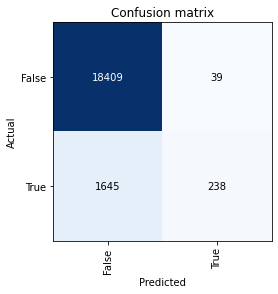

In [28]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

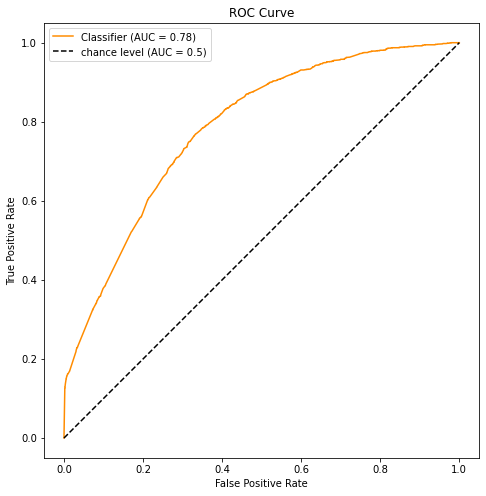

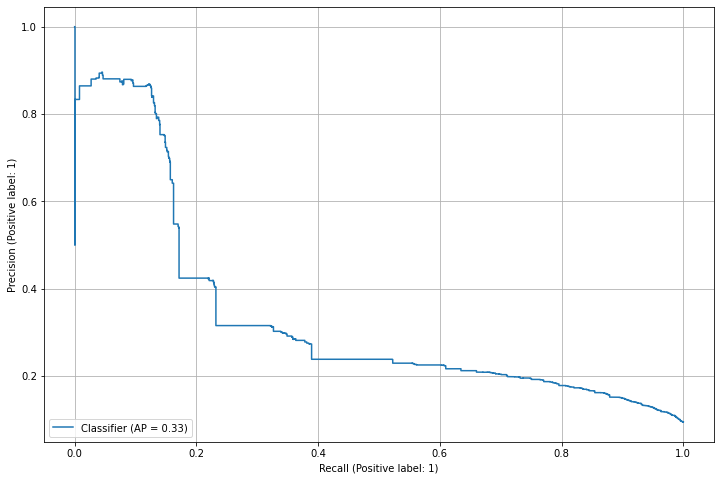

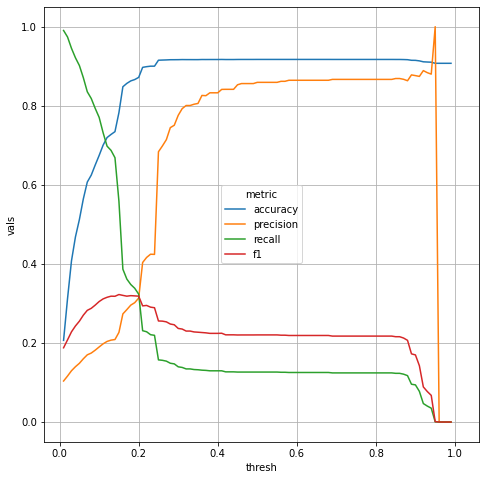

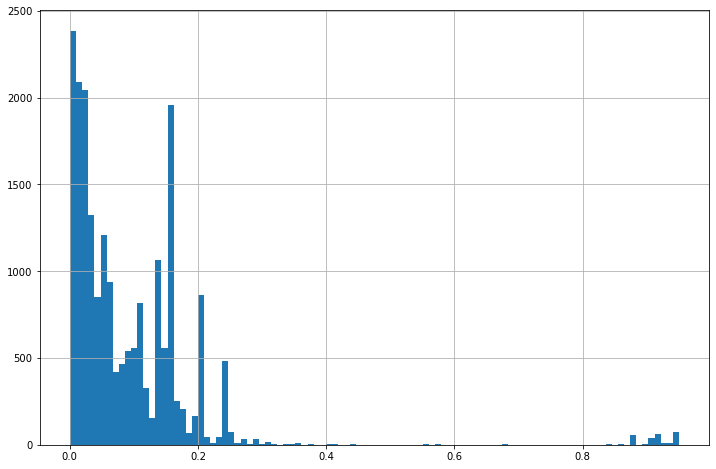

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:98: RuntimeWarning: Mean of empty slice.
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:99: RuntimeWarning: Mean of empty slice.
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


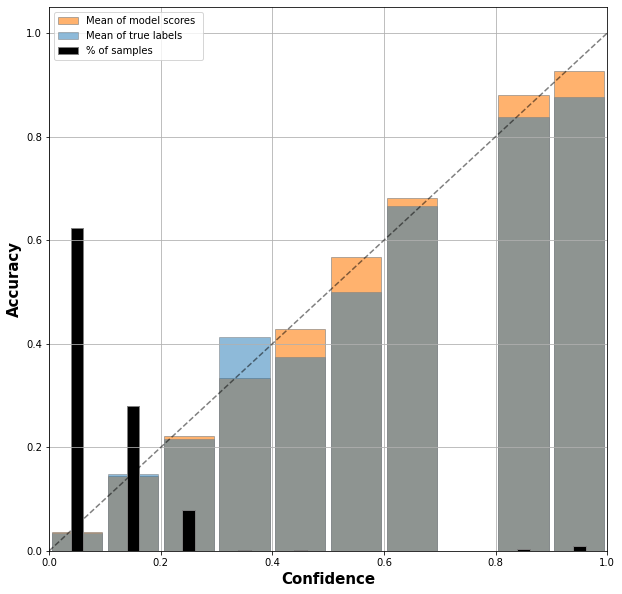

ECE: 1.228%, MCE: 70.388%


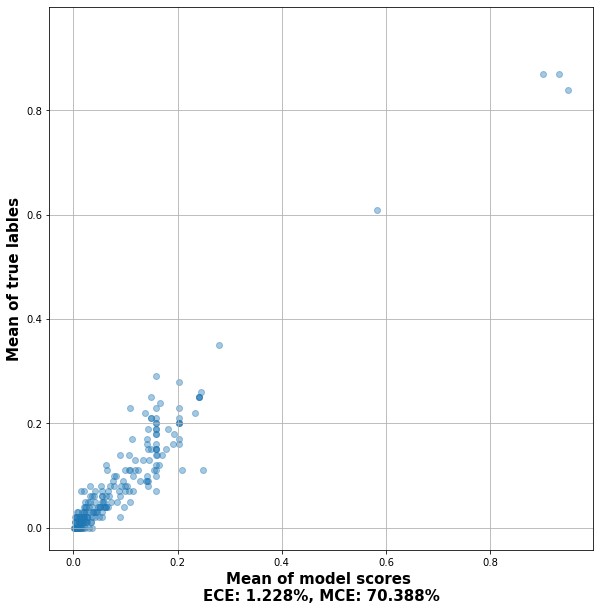

Tsh: 0.10; Acc: 0.674; Prec: 0.190; Recall: 0.771; F1: 0.305


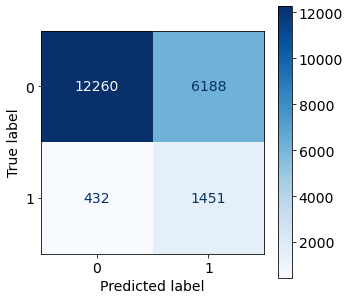

Tsh: 0.20; Acc: 0.872; Prec: 0.314; Recall: 0.323; F1: 0.318


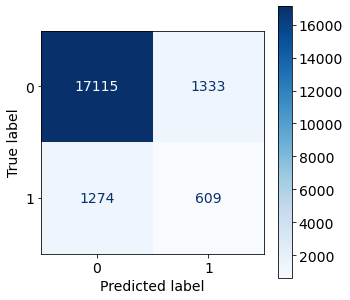

Tsh: 0.30; Acc: 0.917; Prec: 0.776; Recall: 0.140; F1: 0.237


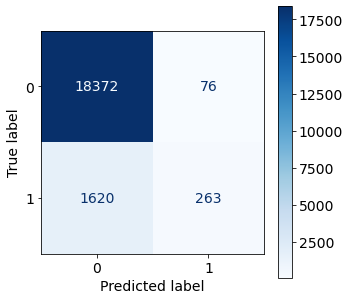

Tsh: 0.40; Acc: 0.917; Prec: 0.833; Recall: 0.130; F1: 0.224


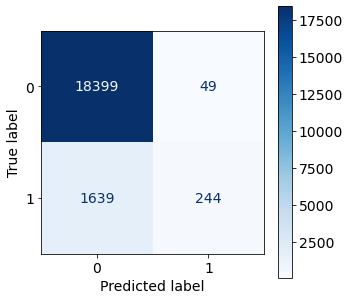

Tsh: 0.50; Acc: 0.917; Prec: 0.859; Recall: 0.126; F1: 0.220


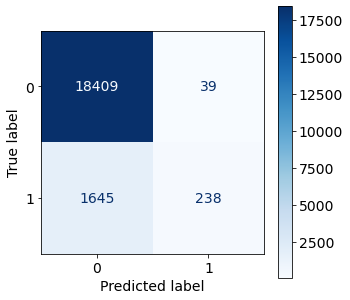

Tsh: 0.60; Acc: 0.917; Prec: 0.864; Recall: 0.125; F1: 0.219


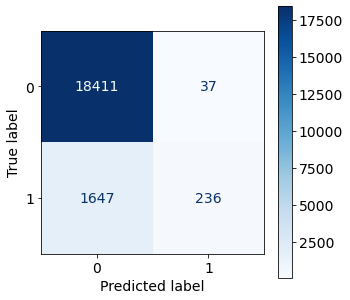

Tsh: 0.70; Acc: 0.917; Prec: 0.867; Recall: 0.124; F1: 0.217


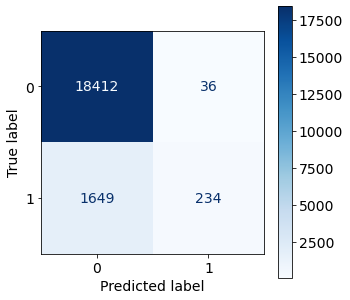

Tsh: 0.80; Acc: 0.917; Prec: 0.867; Recall: 0.124; F1: 0.217


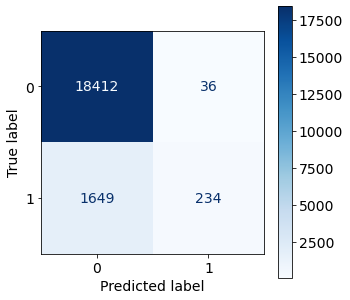

Tsh: 0.90; Acc: 0.915; Prec: 0.876; Recall: 0.094; F1: 0.170


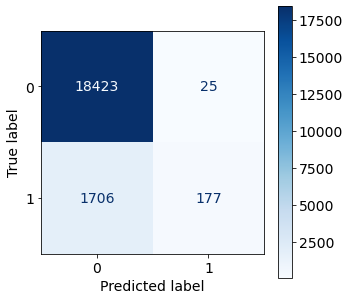

In [29]:
eval_dl = learn.dls.test_dl(df_dataset[df_dataset.index.isin(valid_idx)])
preds = learn.get_preds(dl=eval_dl)

y_prob = np.array(preds[0])[:,1]
y = np.array(preds[1])[:,0]

display_results(y, y_prob)

del preds, learn, df_dataset, dls

## Model from fast.ai - tabular_learner only continous + assigner (for target_90_days)

In [30]:
target_name = ["target_90_days"]
df_dataset = df_raw_dataset[feature_columns_continous + ['ASSIGNER'] + target_name].copy()

In [31]:
dls = TabularDataLoaders.from_df(df_dataset, procs=procs,
                                 cat_names=['ASSIGNER'],
                                 cont_names=feature_columns_continous, 
                                 y_names=target_name, 
                                 valid_idx=valid_idx, bs=128)

In [32]:
dls.show_batch()

In [33]:
learn = tabular_learner(dls, metrics=fast_metrics)

In [34]:
learn.fit_one_cycle(6)

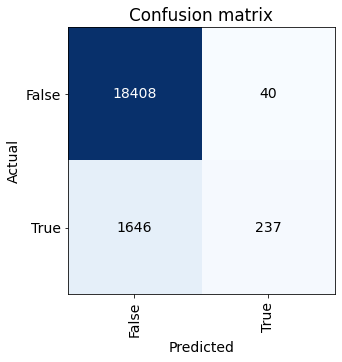

In [35]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

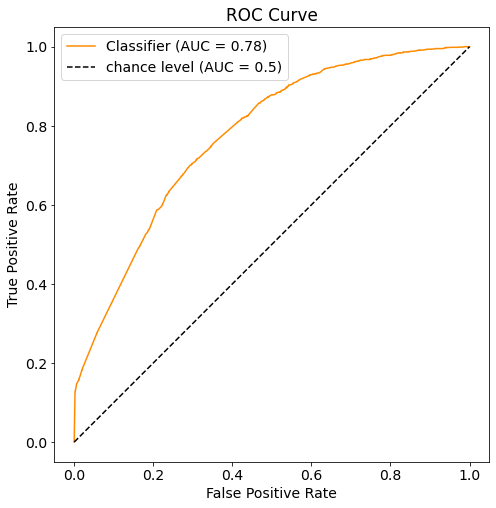

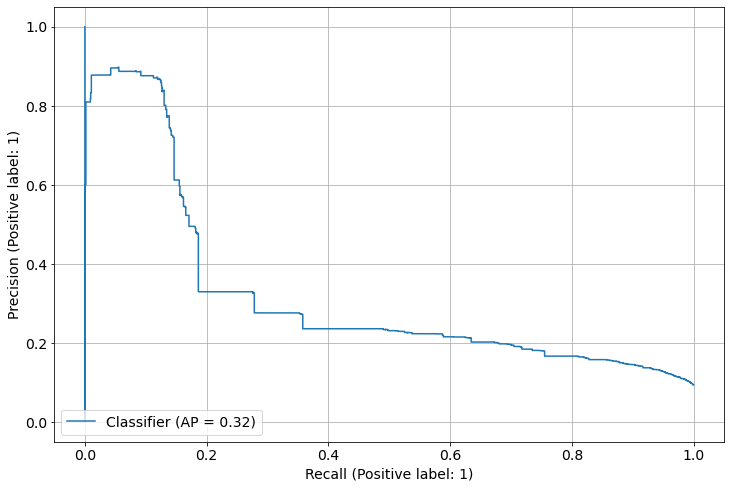

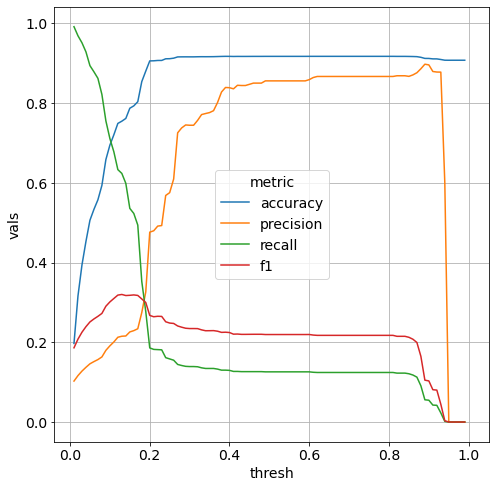

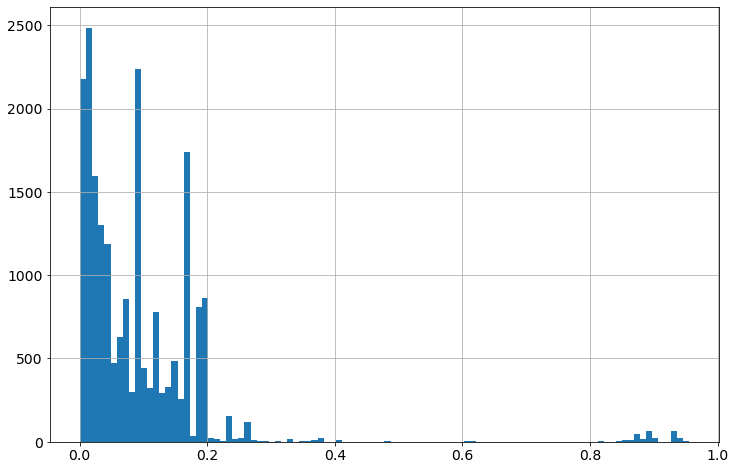

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:98: RuntimeWarning: Mean of empty slice.
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:99: RuntimeWarning: Mean of empty slice.
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


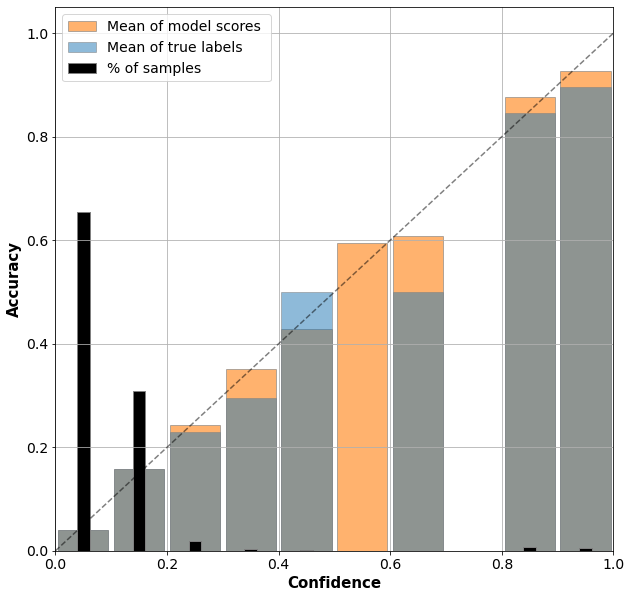

ECE: 1.182%, MCE: 95.482%


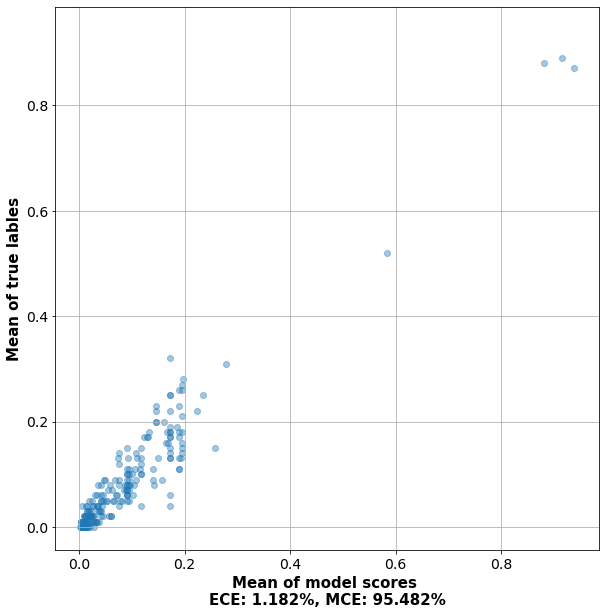

Tsh: 0.10; Acc: 0.694; Prec: 0.191; Recall: 0.711; F1: 0.301


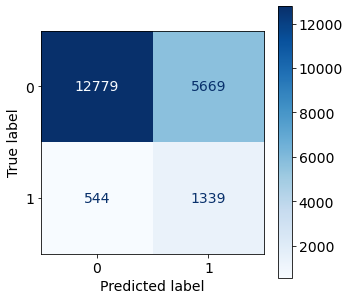

Tsh: 0.20; Acc: 0.906; Prec: 0.476; Recall: 0.186; F1: 0.267


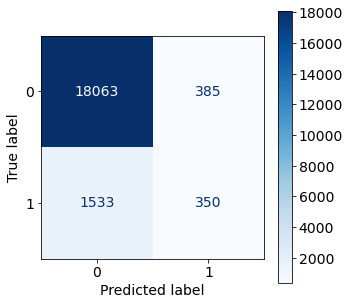

Tsh: 0.30; Acc: 0.916; Prec: 0.744; Recall: 0.139; F1: 0.234


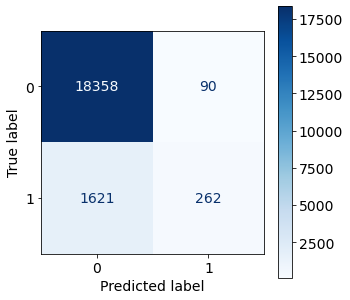

Tsh: 0.40; Acc: 0.917; Prec: 0.838; Recall: 0.130; F1: 0.224


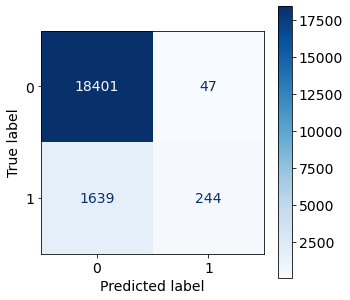

Tsh: 0.50; Acc: 0.917; Prec: 0.856; Recall: 0.126; F1: 0.219


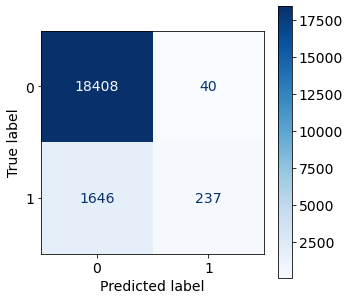

Tsh: 0.60; Acc: 0.917; Prec: 0.859; Recall: 0.126; F1: 0.220


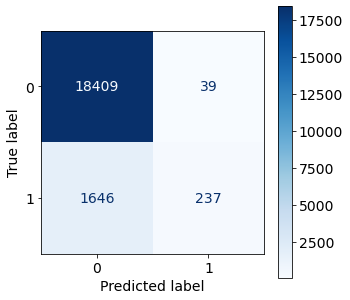

Tsh: 0.70; Acc: 0.917; Prec: 0.867; Recall: 0.124; F1: 0.217


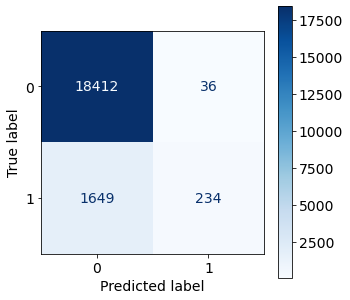

Tsh: 0.80; Acc: 0.917; Prec: 0.867; Recall: 0.124; F1: 0.217


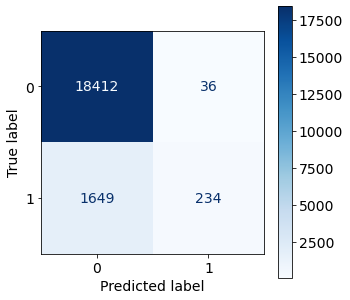

Tsh: 0.90; Acc: 0.912; Prec: 0.896; Recall: 0.055; F1: 0.103


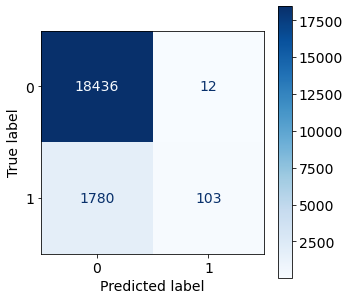

In [36]:
eval_dl = learn.dls.test_dl(df_dataset[df_dataset.index.isin(valid_idx)])
preds = learn.get_preds(dl=eval_dl)

y_prob = np.array(preds[0])[:,1]
y = np.array(preds[1])[:,0]

display_results(y, y_prob)

del preds, learn, df_dataset, dls

## Model from fast.ai - text_classifier_learner (for target_90_days)

In [37]:
from fastai.text.all import *

In [38]:
text_col = "description"
label_col = "target_90_days"
is_val_col = "is_val"
df_raw_dataset.loc[valid_idx, is_val_col] = True
df_raw_dataset[is_val_col].fillna(False, inplace=True)
assert len(valid_idx) == sum(df_raw_dataset[is_val_col])

df_dataset = df_raw_dataset[feature_columns + [text_col, label_col, is_val_col]].copy()
df_dataset

V3__exploitabilityScore  V3__impactScore  V3__cvssV3__baseScore  \
0                           3.9              1.4                    5.3   
1                           2.3              2.7                    5.4   
2                           2.8              2.7                    6.1   
3                           2.3              2.7                    5.4   
4                           2.2              4.0                    6.8   
...                         ...              ...                    ...   
101659                      2.8              1.4                    4.3   
101660                      1.6              6.0                    8.3   
101661                      1.6              6.0                    8.3   
101662                      1.8              5.9                    7.8   
101663                      1.8              3.6                    5.5   

                              ASSIGNER V3__cvssV3__attackComplexity  \
0                      psirt@cisco.com                          LOW   
1                        cve@mitre.org                          LOW   
2                        cve@mitre.org                          LOW   
3                        cve@mitre.org                          LOW   
4                        cve@mitre.org                         HIGH   
...                                ...                          ...   
101659            secure@microsoft.com                          LOW   
101660            secure@microsoft.com                         HIGH   
101661            secure@microsoft.com                         HIGH   
101662            secure@microsoft.com                          LOW   
101663  security-advisories@github.com                          LOW   

       V3__cvssV3__attackVector V3__cvssV3__availabilityImpact  \
0                       NETWORK                            LOW   
1                       NETWORK                           NONE   
2                       NETWORK                           NONE   
3                       NETWORK                           NONE   
4                       NETWORK                           NONE   
...                         ...                            ...   
101659                  NETWORK                           NONE   
101660                  NETWORK                           HIGH   
101661                  NETWORK                           HIGH   
101662                    LOCAL                           HIGH   
101663                    LOCAL                           NONE   

       V3__cvssV3__baseSeverity V3__cvssV3__confidentialityImpact  \
0                        MEDIUM                              NONE   
1                        MEDIUM                               LOW   
2                        MEDIUM                               LOW   
3                        MEDIUM                               LOW   
4                        MEDIUM                              NONE   
...                         ...                               ...   
101659                   MEDIUM                              NONE   
101660                     HIGH                              HIGH   
101661                     HIGH                              HIGH   
101662                     HIGH                              HIGH   
101663                   MEDIUM                              NONE   

       V3__cvssV3__integrityImpact V3__cvssV3__privilegesRequired  \
0                             NONE                           NONE   
1                              LOW                            LOW   
2                              LOW                           NONE   
3                              LOW                            LOW   
4                             HIGH                           NONE   
...                            ...                            ...   
101659                         LOW                           NONE   
101660                        HIGH                           NONE   
101661     

In [39]:
df_dataset.description = "ASGN: " + df_raw_dataset.ASSIGNER + \
                            "; CVSS: " + df_raw_dataset.V3__cvssV3__vectorString.str[9:] + \
                            "; EXPSCR: " + (df_raw_dataset.V3__exploitabilityScore).astype(int).astype(str) + \
                            "; BASESCR: " + (df_raw_dataset.V3__cvssV3__baseScore / 2).astype(int).astype(str) + \
                            "; IMPSCR: " + (df_raw_dataset.V3__impactScore / 2).astype(int).astype(str) + \
                            "; " + df_raw_dataset.description
df_dataset.description

0                                                                                                                                                              ASGN: psirt@cisco.com; CVSS: AV:N/AC:L/PR:N/UI:N/S:U/C:N/I:N/A:L; EXPSCR: 3; BASESCR: 2; IMPSCR: 0; The TCP implementation in Cisco Videoscape Distribution Suite for Internet Streaming (VDS-IS) 3.3(0), 3.3(1), 4.0(0), and 4.1(0) does not properly initiate new TCP sessions when a previous session is in a FIN wait state, which allows remote attackers to cause a denial of service (TCP outage) via vectors involving FIN packets, aka Bug ID CSCuy45136.
1                                                                                                                                                                                                                                                                ASGN: cve@mitre.org; CVSS: AV:N/AC:L/PR:L/UI:R/S:C/C:L/I:L/A:N; EXPSCR: 2; BASESCR: 2; IMPSCR: 1; Cross-site scripting (XSS) vulnerab

In [40]:
dls = TextDataLoaders.from_df(df_dataset, text_col=text_col, label_col=label_col, valid_col=is_val_col)
# dls.show_batch()

In [41]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=fast_metrics)
# learn.fit_one_cycle(3, 1e-2) # проверил, работает существенно хуже на этой задаче
epoch = 3 if not UNIT_TEST else 1
learn.fine_tune(epoch, 1e-2)

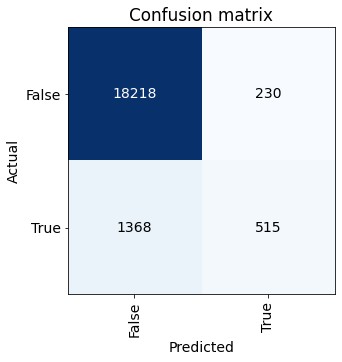

In [42]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

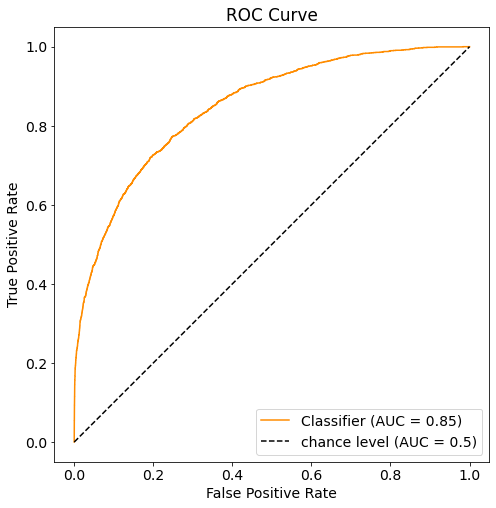

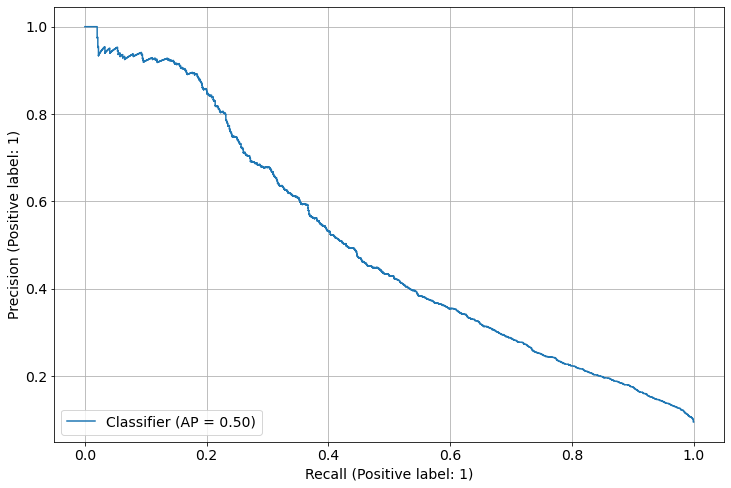

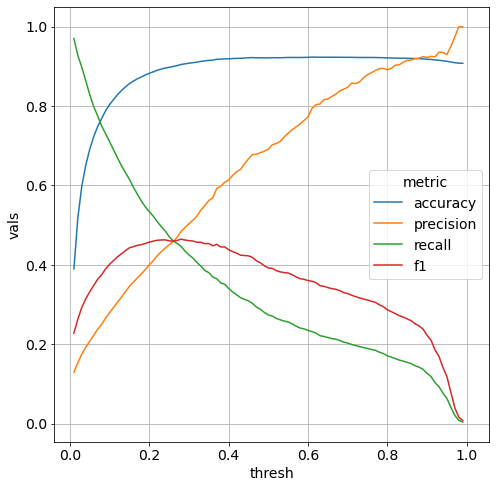

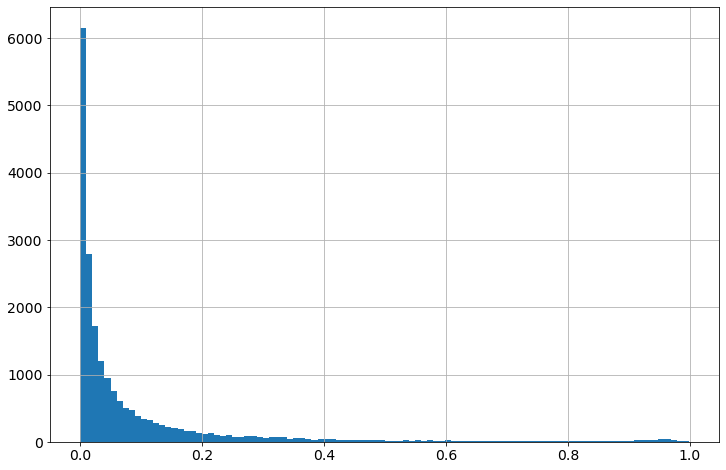

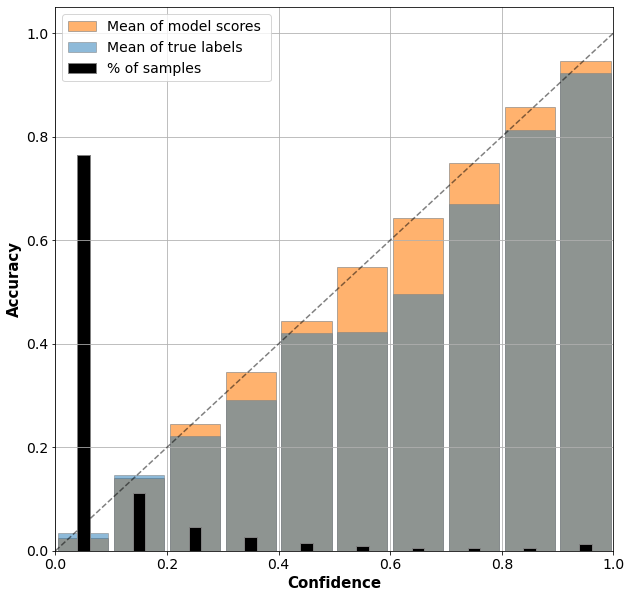

ECE: 2.344%, MCE: 74.452%


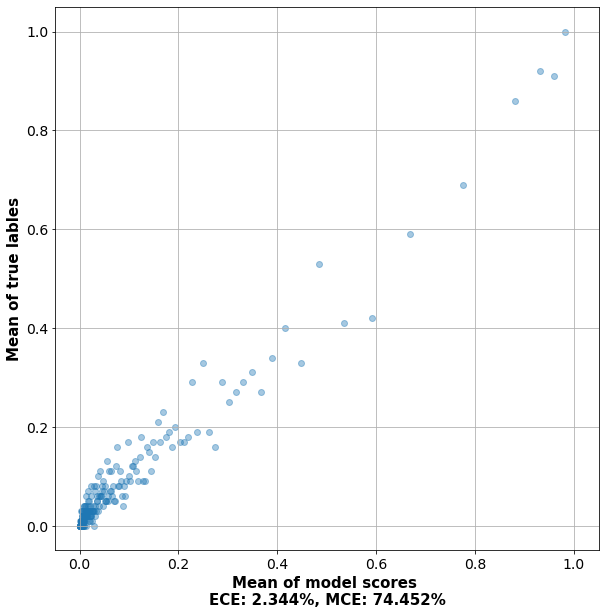

Tsh: 0.10; Acc: 0.804; Prec: 0.280; Recall: 0.710; F1: 0.401


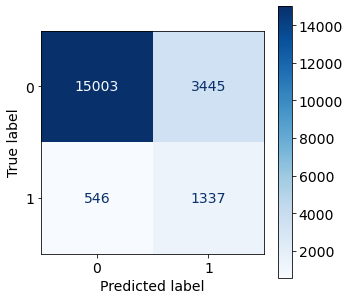

Tsh: 0.20; Acc: 0.883; Prec: 0.400; Recall: 0.534; F1: 0.457


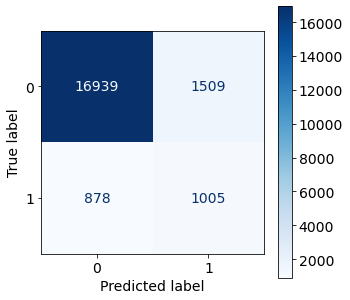

Tsh: 0.30; Acc: 0.908; Prec: 0.503; Recall: 0.425; F1: 0.461


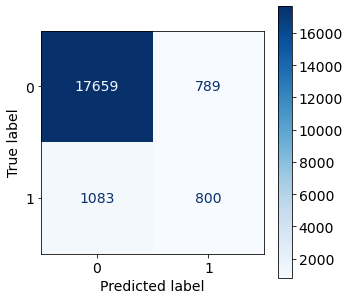

Tsh: 0.40; Acc: 0.919; Prec: 0.614; Recall: 0.340; F1: 0.438


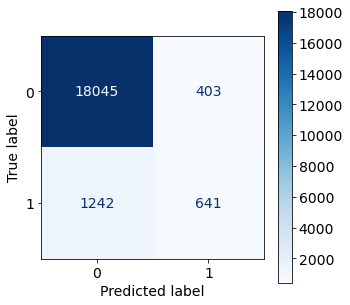

Tsh: 0.50; Acc: 0.921; Prec: 0.691; Recall: 0.273; F1: 0.392


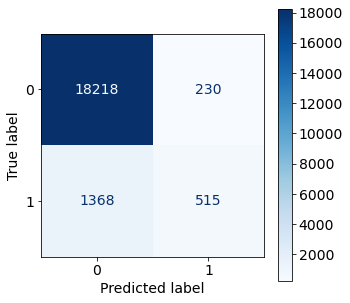

Tsh: 0.60; Acc: 0.923; Prec: 0.773; Recall: 0.235; F1: 0.360


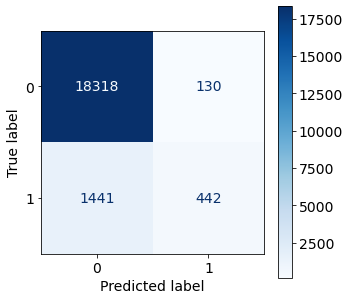

Tsh: 0.70; Acc: 0.923; Prec: 0.847; Recall: 0.203; F1: 0.327


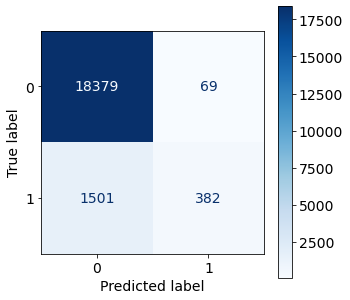

Tsh: 0.80; Acc: 0.921; Prec: 0.892; Recall: 0.170; F1: 0.286


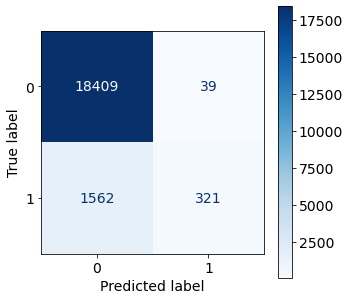

Tsh: 0.90; Acc: 0.918; Prec: 0.922; Recall: 0.126; F1: 0.222


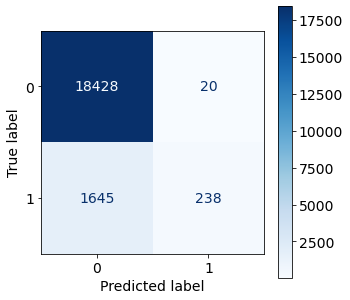

In [43]:
eval_dl = learn.dls.test_dl(df_dataset[df_dataset.index.isin(valid_idx)][text_col])
preds = learn.get_preds(dl=eval_dl)

y_prob = np.array(preds[0])[:,1]
y = np.array(df_dataset[df_dataset.index.isin(valid_idx)][label_col].astype(int))

display_results(y, y_prob)

del preds, learn, df_dataset, dls

## Model from fast.ai - text_classifier_learner + tabular_learner (for target_90_days)

In [44]:
from fastai.text.all import *

In [45]:
text_col = "description"
label_col = "target_90_days"
is_val_col = "is_val"
df_raw_dataset.loc[valid_idx, is_val_col] = True
df_raw_dataset[is_val_col].fillna(False, inplace=True)
assert len(valid_idx) == sum(df_raw_dataset[is_val_col])

df_dataset = df_raw_dataset[feature_columns + [text_col, label_col, is_val_col]]
df_dataset

V3__exploitabilityScore  V3__impactScore  V3__cvssV3__baseScore  \
0                           3.9              1.4                    5.3   
1                           2.3              2.7                    5.4   
2                           2.8              2.7                    6.1   
3                           2.3              2.7                    5.4   
4                           2.2              4.0                    6.8   
...                         ...              ...                    ...   
101659                      2.8              1.4                    4.3   
101660                      1.6              6.0                    8.3   
101661                      1.6              6.0                    8.3   
101662                      1.8              5.9                    7.8   
101663                      1.8              3.6                    5.5   

                              ASSIGNER V3__cvssV3__attackComplexity  \
0                      psirt@cisco.com                          LOW   
1                        cve@mitre.org                          LOW   
2                        cve@mitre.org                          LOW   
3                        cve@mitre.org                          LOW   
4                        cve@mitre.org                         HIGH   
...                                ...                          ...   
101659            secure@microsoft.com                          LOW   
101660            secure@microsoft.com                         HIGH   
101661            secure@microsoft.com                         HIGH   
101662            secure@microsoft.com                          LOW   
101663  security-advisories@github.com                          LOW   

       V3__cvssV3__attackVector V3__cvssV3__availabilityImpact  \
0                       NETWORK                            LOW   
1                       NETWORK                           NONE   
2                       NETWORK                           NONE   
3                       NETWORK                           NONE   
4                       NETWORK                           NONE   
...                         ...                            ...   
101659                  NETWORK                           NONE   
101660                  NETWORK                           HIGH   
101661                  NETWORK                           HIGH   
101662                    LOCAL                           HIGH   
101663                    LOCAL                           NONE   

       V3__cvssV3__baseSeverity V3__cvssV3__confidentialityImpact  \
0                        MEDIUM                              NONE   
1                        MEDIUM                               LOW   
2                        MEDIUM                               LOW   
3                        MEDIUM                               LOW   
4                        MEDIUM                              NONE   
...                         ...                               ...   
101659                   MEDIUM                              NONE   
101660                     HIGH                              HIGH   
101661                     HIGH                              HIGH   
101662                     HIGH                              HIGH   
101663                   MEDIUM                              NONE   

       V3__cvssV3__integrityImpact V3__cvssV3__privilegesRequired  \
0                             NONE                           NONE   
1                              LOW                            LOW   
2                              LOW                           NONE   
3                              LOW                            LOW   
4                             HIGH                           NONE   
...                            ...                            ...   
101659                         LOW                           NONE   
101660                        HIGH                           NONE   
101661     

In [46]:
dls = TextDataLoaders.from_df(df_dataset, text_col=text_col, label_col=label_col, valid_col=is_val_col)
# dls.show_batch()

In [47]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=fast_metrics)
# learn.fit_one_cycle(3, 1e-2) # проверил, работает существенно хуже на этой задаче
epoch = 3 if not UNIT_TEST else 1
learn.fine_tune(epoch, 1e-2)

In [48]:
infer_dl = learn.dls.test_dl(df_dataset[text_col])
preds = learn.get_preds(dl=infer_dl)

In [49]:
df_dataset = df_dataset.merge(pd.DataFrame({f"prob_{k}":list(v) 
                                            for k, v in zip(range(preds[0].shape[1]), preds[0].numpy().T)}, 
                                             index=df_dataset.index), 
                              how="left", left_index=True, right_index=True)
df_dataset

V3__exploitabilityScore  V3__impactScore  V3__cvssV3__baseScore  \
0                           3.9              1.4                    5.3   
1                           2.3              2.7                    5.4   
2                           2.8              2.7                    6.1   
3                           2.3              2.7                    5.4   
4                           2.2              4.0                    6.8   
...                         ...              ...                    ...   
101659                      2.8              1.4                    4.3   
101660                      1.6              6.0                    8.3   
101661                      1.6              6.0                    8.3   
101662                      1.8              5.9                    7.8   
101663                      1.8              3.6                    5.5   

                              ASSIGNER V3__cvssV3__attackComplexity  \
0                      psirt@cisco.com                          LOW   
1                        cve@mitre.org                          LOW   
2                        cve@mitre.org                          LOW   
3                        cve@mitre.org                          LOW   
4                        cve@mitre.org                         HIGH   
...                                ...                          ...   
101659            secure@microsoft.com                          LOW   
101660            secure@microsoft.com                         HIGH   
101661            secure@microsoft.com                         HIGH   
101662            secure@microsoft.com                          LOW   
101663  security-advisories@github.com                          LOW   

       V3__cvssV3__attackVector V3__cvssV3__availabilityImpact  \
0                       NETWORK                            LOW   
1                       NETWORK                           NONE   
2                       NETWORK                           NONE   
3                       NETWORK                           NONE   
4                       NETWORK                           NONE   
...                         ...                            ...   
101659                  NETWORK                           NONE   
101660                  NETWORK                           HIGH   
101661                  NETWORK                           HIGH   
101662                    LOCAL                           HIGH   
101663                    LOCAL                           NONE   

       V3__cvssV3__baseSeverity V3__cvssV3__confidentialityImpact  \
0                        MEDIUM                              NONE   
1                        MEDIUM                               LOW   
2                        MEDIUM                               LOW   
3                        MEDIUM                               LOW   
4                        MEDIUM                              NONE   
...                         ...                               ...   
101659                   MEDIUM                              NONE   
101660                     HIGH                              HIGH   
101661                     HIGH                              HIGH   
101662                     HIGH                              HIGH   
101663                   MEDIUM                              NONE   

       V3__cvssV3__integrityImpact V3__cvssV3__privilegesRequired  \
0                             NONE                           NONE   
1                              LOW                            LOW   
2                              LOW                           NONE   
3                              LOW                            LOW   
4                             HIGH                           NONE   
...                            ...                            ...   
101659                         LOW                           NONE   
101660                        HIGH                           NONE   
101661     

In [50]:
dls = TabularDataLoaders.from_df(df_dataset, procs=procs, 
                                 cat_names=feature_columns_categorial, 
                                 cont_names=feature_columns_continous + ["prob_1"], 
                                 y_names=[label_col], 
                                 valid_idx=valid_idx, bs=128)

In [51]:
dls.show_batch()

In [52]:
learn = tabular_learner(dls, metrics=fast_metrics)

In [53]:
epoch = 3 if not UNIT_TEST else 1

learn.fit_one_cycle(epoch)

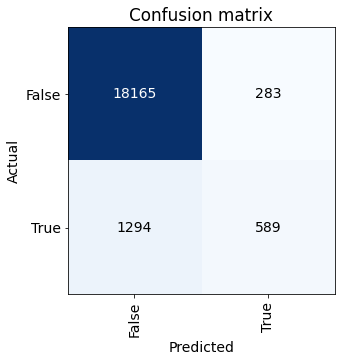

In [54]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


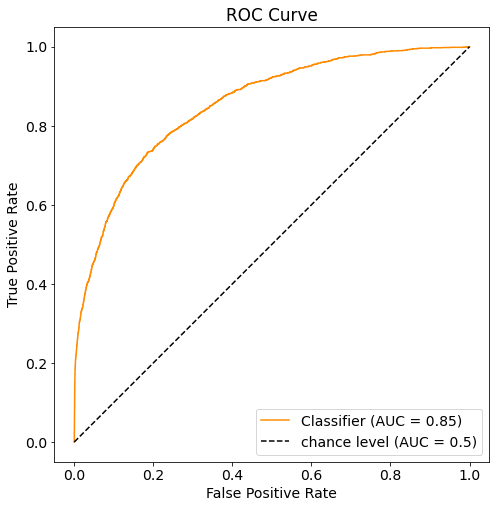

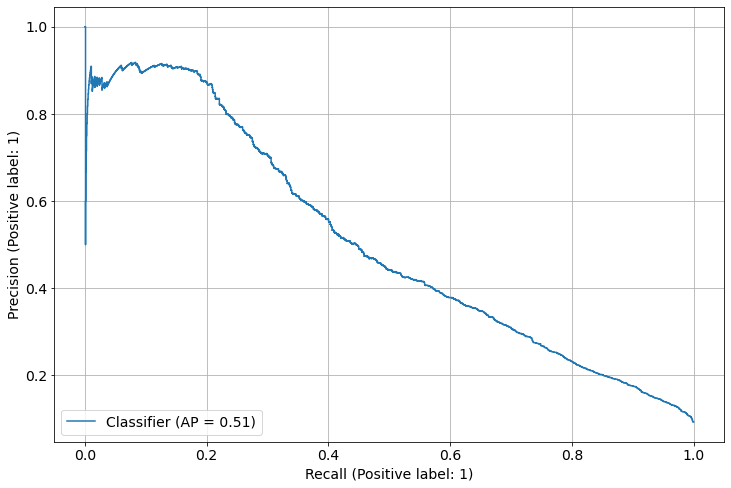

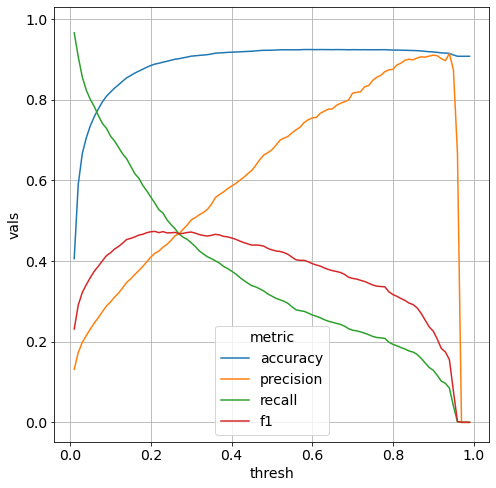

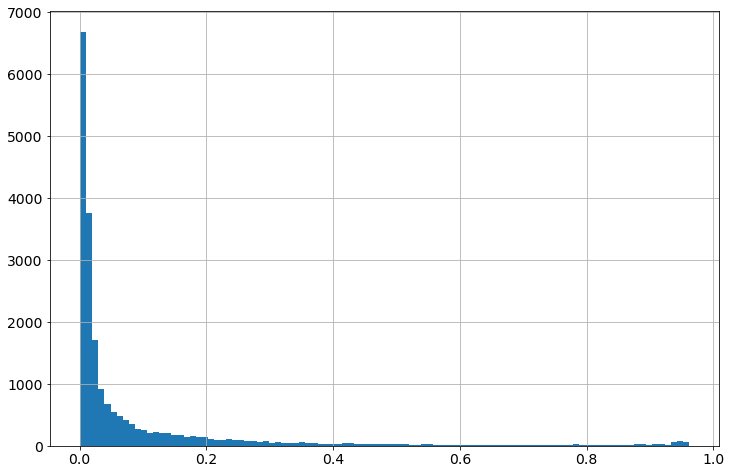

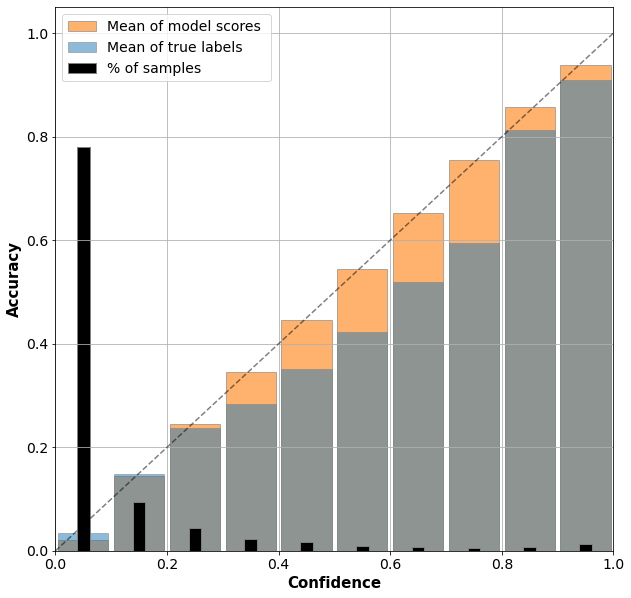

ECE: 2.640%, MCE: 77.177%


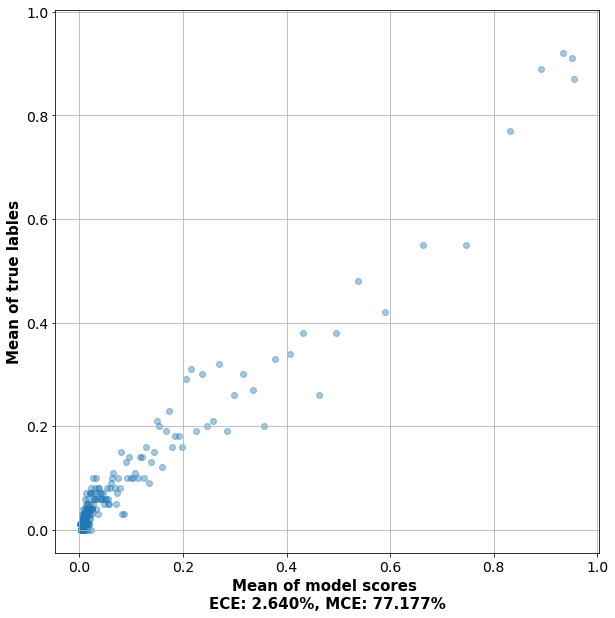

Tsh: 0.10; Acc: 0.819; Prec: 0.298; Recall: 0.710; F1: 0.420


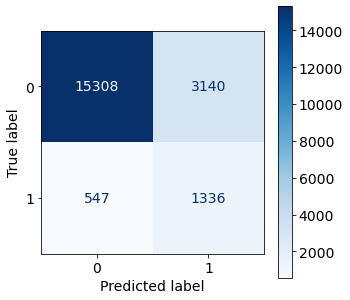

Tsh: 0.20; Acc: 0.885; Prec: 0.410; Recall: 0.558; F1: 0.472


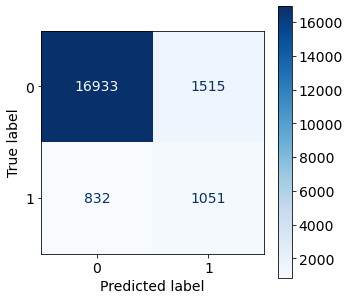

Tsh: 0.30; Acc: 0.908; Prec: 0.502; Recall: 0.445; F1: 0.472


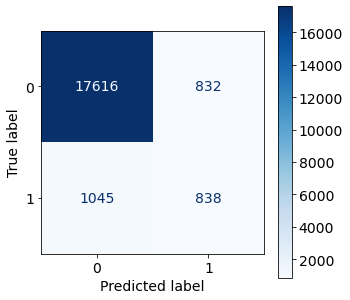

Tsh: 0.40; Acc: 0.918; Prec: 0.585; Recall: 0.375; F1: 0.457


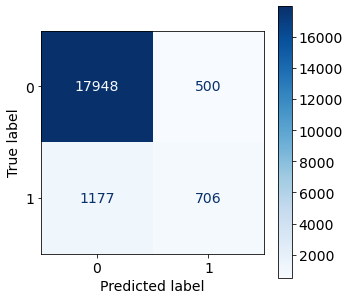

Tsh: 0.50; Acc: 0.922; Prec: 0.675; Recall: 0.313; F1: 0.428


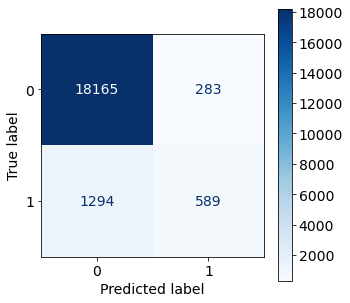

Tsh: 0.60; Acc: 0.924; Prec: 0.755; Recall: 0.266; F1: 0.393


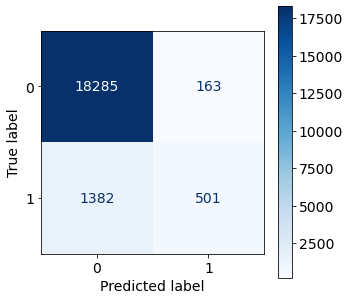

Tsh: 0.70; Acc: 0.924; Prec: 0.816; Recall: 0.228; F1: 0.357


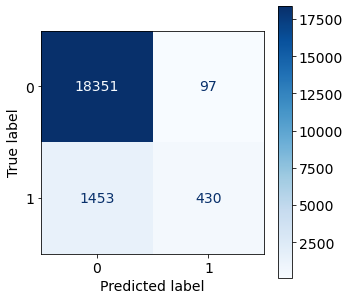

Tsh: 0.80; Acc: 0.923; Prec: 0.875; Recall: 0.193; F1: 0.317


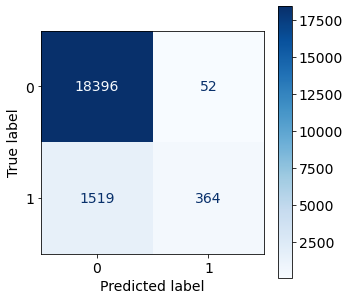

Tsh: 0.90; Acc: 0.918; Prec: 0.910; Recall: 0.129; F1: 0.226


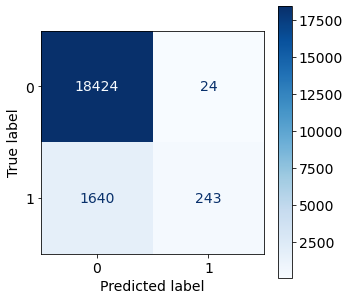

In [55]:
eval_dl = learn.dls.test_dl(df_dataset[df_dataset.index.isin(valid_idx)])
preds = learn.get_preds(dl=eval_dl)

y_prob = np.array(preds[0])[:,1]
y = np.array(preds[1])[:,0]

display_results(y, y_prob)

del preds, learn, df_dataset, infer_dl, dls

## Model xgboost (for target_90_days)

## Model catboost (for target_90_days)

In [56]:
from catboost import CatBoostClassifier, Pool

In [57]:
text_col = "description"
label_col = "target_90_days"
is_val_col = "is_val"
df_raw_dataset.loc[valid_idx, is_val_col] = True
df_raw_dataset[is_val_col].fillna(False, inplace=True)
assert len(valid_idx) == sum(df_raw_dataset[is_val_col])

df_dataset = df_raw_dataset[feature_columns + [text_col, label_col, is_val_col]].copy()

In [58]:
cat_features = list(range(3,13))

train_data = Pool(
    df_dataset[~df_dataset.is_val][feature_columns].to_numpy().tolist(),
    label = df_dataset[~df_dataset.is_val][label_col].astype(int).tolist(),
    cat_features=cat_features,
)

eval_data = Pool(
    df_dataset[df_dataset.is_val][feature_columns].to_numpy().tolist(),
    label = df_dataset[df_dataset.is_val][label_col].astype(int).tolist(),
    cat_features=cat_features,
)

In [59]:
# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=10,
                           learning_rate=1)

In [60]:
# Fit model
model.fit(train_data, eval_set=eval_data)

0:	learn: 0.3277445	test: 0.3261312	best: 0.3261312 (0)	total: 119ms	remaining: 1.07s
1:	learn: 0.2714135	test: 0.2699054	best: 0.2699054 (1)	total: 185ms	remaining: 740ms
2:	learn: 0.2621402	test: 0.2602415	best: 0.2602415 (2)	total: 240ms	remaining: 561ms
3:	learn: 0.2607970	test: 0.2589626	best: 0.2589626 (3)	total: 297ms	remaining: 445ms
4:	learn: 0.2589241	test: 0.2577483	best: 0.2577483 (4)	total: 351ms	remaining: 351ms
5:	learn: 0.2584282	test: 0.2574373	best: 0.2574373 (5)	total: 401ms	remaining: 267ms
6:	learn: 0.2582846	test: 0.2572319	best: 0.2572319 (6)	total: 423ms	remaining: 181ms
7:	learn: 0.2578775	test: 0.2573624	best: 0.2572319 (6)	total: 473ms	remaining: 118ms
8:	learn: 0.2574936	test: 0.2568837	best: 0.2568837 (8)	total: 522ms	remaining: 58ms
9:	learn: 0.2574932	test: 0.2568805	best: 0.2568805 (9)	total: 537ms	remaining: 0us

bestTest = 0.2568804512
bestIteration = 9



In [61]:
model.get_feature_importance()

array([ 1.76656554,  3.46363449,  3.30295148, 49.55410466,  0.7366594 ,
        8.15434987,  2.48862089,  3.03384588, 11.36362821,  5.10615395,
        4.3514352 ,  0.55654845,  6.12150199])

In [62]:
pd.DataFrame({'feature_importance': model.get_feature_importance(train_data), 
              'feature_names': df_dataset[feature_columns].columns}).sort_values(by=['feature_importance'], 
                                                           ascending=False)

feature_importance                      feature_names
3            47.914956                           ASSIGNER
8            11.749560  V3__cvssV3__confidentialityImpact
5             8.381992           V3__cvssV3__attackVector
12            6.490230        V3__cvssV3__userInteraction
9             5.275788        V3__cvssV3__integrityImpact
10            4.433860     V3__cvssV3__privilegesRequired
1             3.594604                    V3__impactScore
2             3.512506              V3__cvssV3__baseScore
7             2.942658           V3__cvssV3__baseSeverity
6             2.603119     V3__cvssV3__availabilityImpact
0             1.835038            V3__exploitabilityScore
4             0.762086       V3__cvssV3__attackComplexity
11            0.503603                  V3__cvssV3__scope

In [63]:
pd.DataFrame({'feature_importance': model.get_feature_importance(eval_data), 
              'feature_names': df_dataset[feature_columns].columns}).sort_values(by=['feature_importance'], 
                                                           ascending=False)

feature_importance                      feature_names
3            48.043249                           ASSIGNER
8            11.816435  V3__cvssV3__confidentialityImpact
5             8.204645           V3__cvssV3__attackVector
12            6.426616        V3__cvssV3__userInteraction
9             5.311400        V3__cvssV3__integrityImpact
10            4.501032     V3__cvssV3__privilegesRequired
1             3.562198                    V3__impactScore
2             3.451016              V3__cvssV3__baseScore
7             2.966547           V3__cvssV3__baseSeverity
6             2.583215     V3__cvssV3__availabilityImpact
0             1.772782            V3__exploitabilityScore
4             0.830033       V3__cvssV3__attackComplexity
11            0.530832                  V3__cvssV3__scope

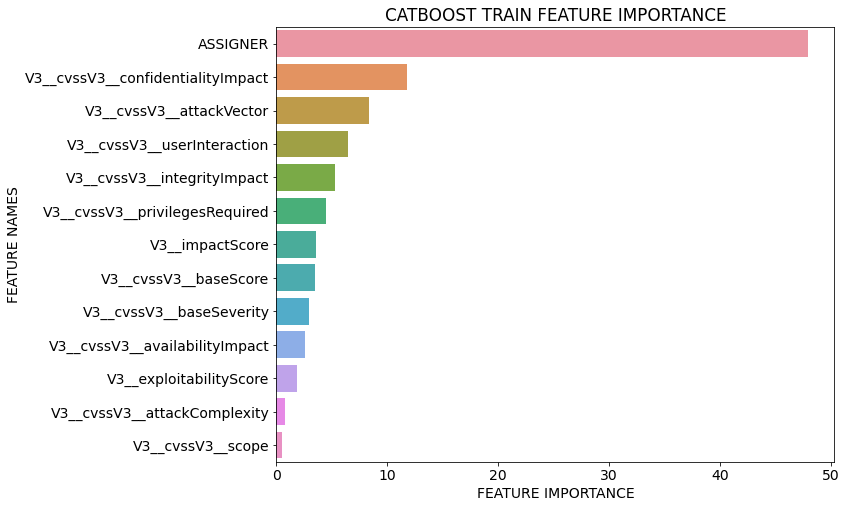

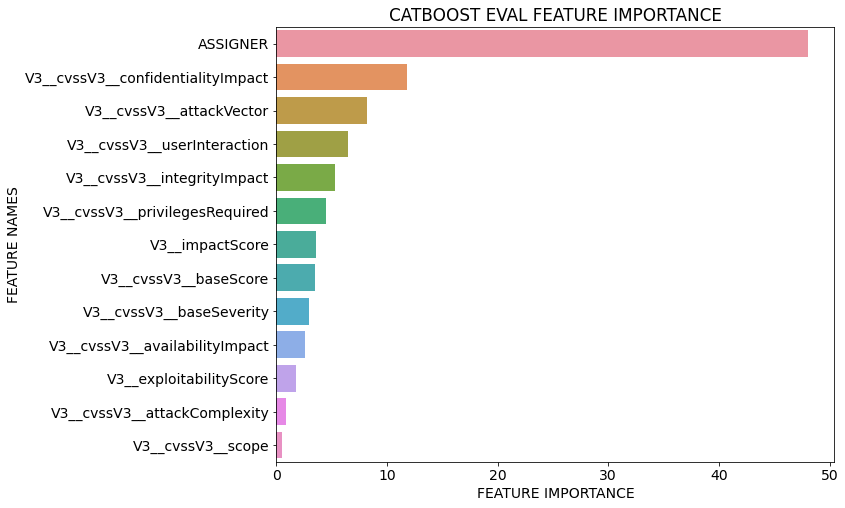

In [64]:
import seaborn as sns
def plot_feature_importance(importance,names,model_type):
    # From https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    

# #plot the xgboost result
# plot_feature_importance(xgb_model.feature_importances_,train.columns,'XG BOOST')

#plot the catboost result
plot_feature_importance(model.get_feature_importance(train_data), df_dataset[feature_columns].columns,'CATBOOST TRAIN ')
#plot the catboost result
plot_feature_importance(model.get_feature_importance(eval_data), df_dataset[feature_columns].columns,'CATBOOST EVAL ')

In [65]:
preds_class = model.predict(eval_data)
df_dataset.loc[df_dataset.is_val,"prediction"] = preds_class
df_dataset.prediction.value_counts(dropna=False)

NaN    81333
0.0    20051
1.0      280
Name: prediction, dtype: int64

In [66]:
preds_class = model.predict(train_data)
df_dataset.loc[~df_dataset.is_val,"prediction"] = preds_class
df_dataset["prediction"] = df_dataset["prediction"].astype(int)
df_dataset.prediction.value_counts(dropna=False)

0    100289
1      1375
Name: prediction, dtype: int64

In [67]:
sum(df_dataset[df_dataset.is_val]["prediction"] == df_dataset[df_dataset.is_val]["target_90_days"].astype("int")) / len(df_dataset[df_dataset.is_val])

0.9176134966307609

In [68]:
sum(df_dataset[~df_dataset.is_val]["prediction"] == df_dataset[~df_dataset.is_val]["target_90_days"].astype("int")) / len(df_dataset[~df_dataset.is_val])

0.9169463809277907

In [69]:
sum(df_dataset["prediction"] == df_dataset["target_90_days"].astype("int")) / len(df_dataset)

0.9170797922568461

In [70]:
# Get predicted classes
df_dataset["prediction"] = model.predict(df_dataset[feature_columns]).astype(bool)
# df_dataset

In [71]:
df_dataset["prediction"].value_counts()

False    100289
True       1375
Name: prediction, dtype: int64

In [72]:
df_dataset["target_90_days"].value_counts()

False    92183
True      9481
Name: target_90_days, dtype: int64

In [73]:
sum(df_dataset["prediction"] == df_dataset["target_90_days"])

93234

In [74]:
df_dataset["prediction"].astype(bool)

0         False
1         False
2         False
3         False
4         False
          ...  
101659    False
101660    False
101661    False
101662    False
101663    False
Name: prediction, Length: 101664, dtype: bool

In [75]:
sum(df_dataset["prediction"] == df_dataset["target_90_days"]) / len(df_dataset)

0.9170797922568461

In [76]:
# # Get predicted probabilities for each class
# preds_proba = model.predict_proba(eval_data)
# # Get predicted RawFormulaVal
# preds_raw = model.predict(eval_data, prediction_type='RawFormulaVal')

In [77]:
y_prob = model.predict_proba(eval_data)[:,1]
y = np.array(df_dataset[df_dataset.is_val]["target_90_days"].astype("int"))

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


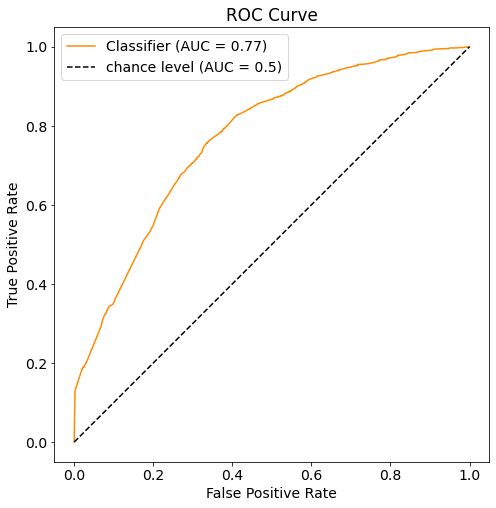

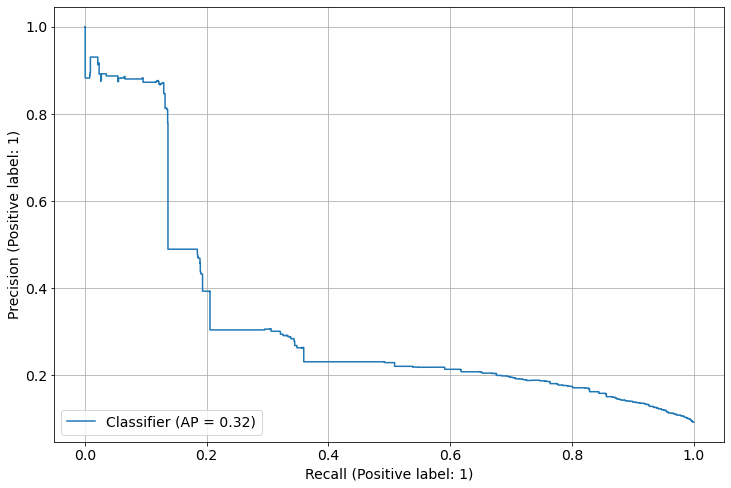

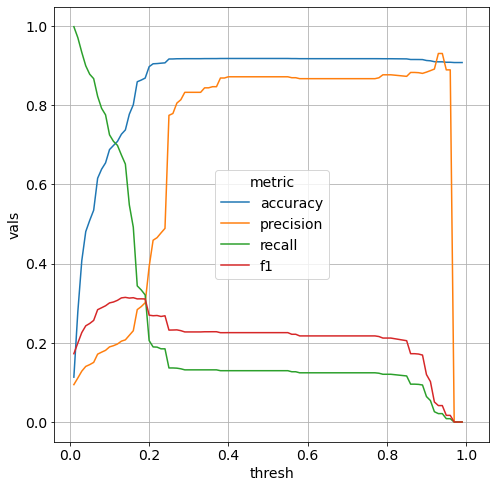

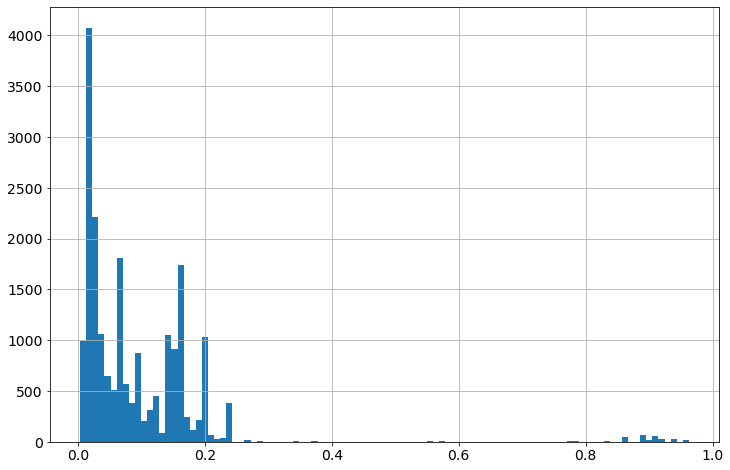

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:98: RuntimeWarning: Mean of empty slice.
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:99: RuntimeWarning: Mean of empty slice.


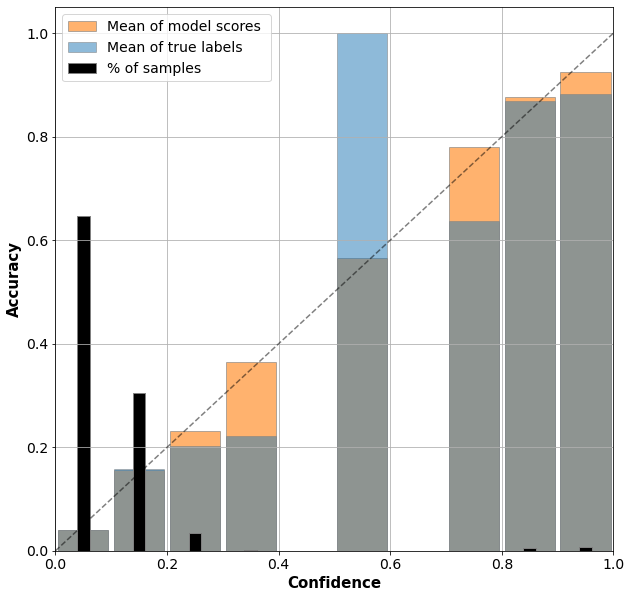

ECE: 1.479%, MCE: 91.723%


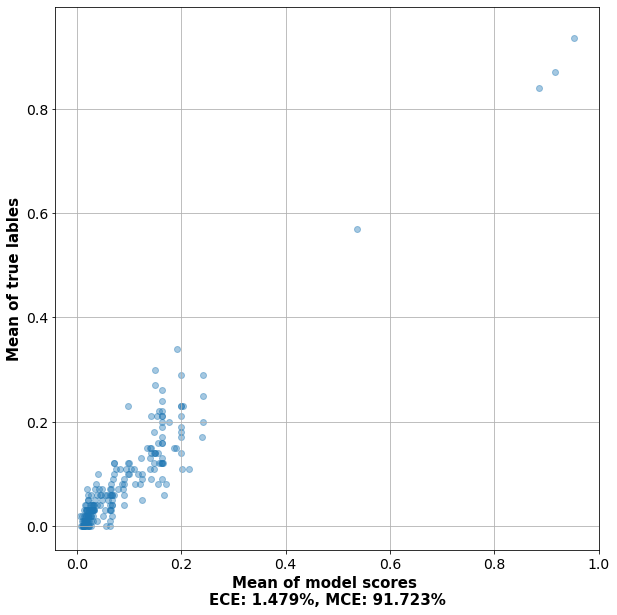

Tsh: 0.10; Acc: 0.688; Prec: 0.190; Recall: 0.725; F1: 0.301


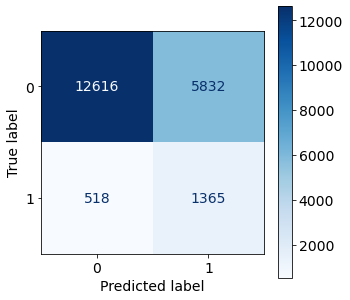

Tsh: 0.20; Acc: 0.897; Prec: 0.392; Recall: 0.206; F1: 0.270


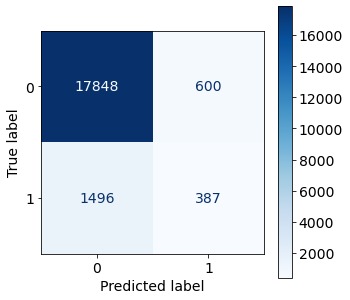

Tsh: 0.30; Acc: 0.917; Prec: 0.832; Recall: 0.132; F1: 0.227


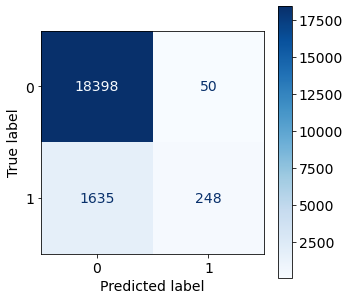

Tsh: 0.40; Acc: 0.918; Prec: 0.871; Recall: 0.130; F1: 0.226


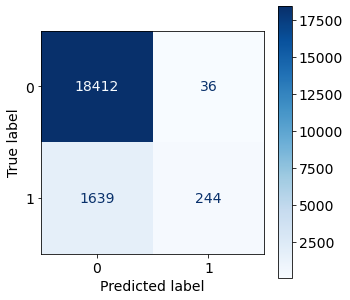

Tsh: 0.50; Acc: 0.918; Prec: 0.871; Recall: 0.130; F1: 0.226


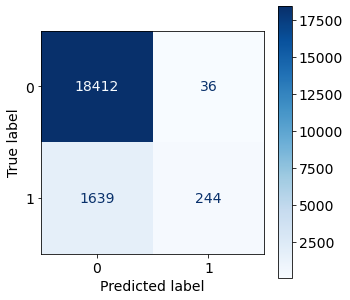

Tsh: 0.60; Acc: 0.917; Prec: 0.867; Recall: 0.124; F1: 0.217


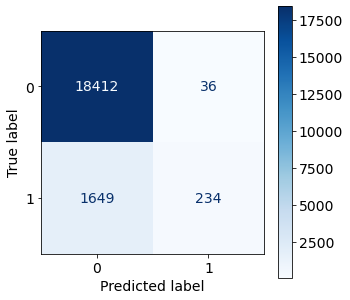

Tsh: 0.70; Acc: 0.917; Prec: 0.867; Recall: 0.124; F1: 0.217


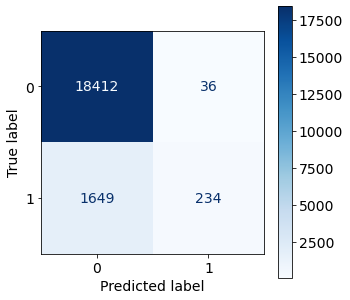

Tsh: 0.80; Acc: 0.917; Prec: 0.876; Recall: 0.121; F1: 0.212


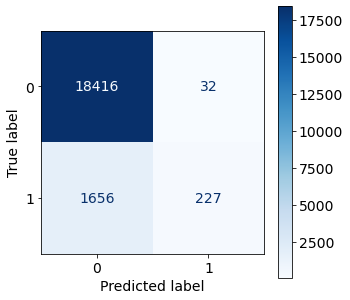

Tsh: 0.90; Acc: 0.913; Prec: 0.883; Recall: 0.064; F1: 0.120


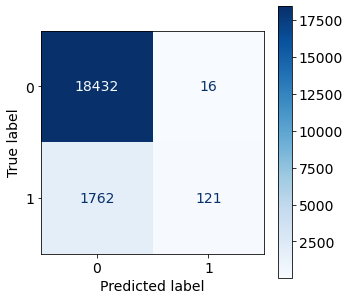

thresh  accuracy  precision    recall        f1
0     0.01  0.113275   0.094408  0.997876  0.172496
4     0.05  0.508927   0.144911  0.877854  0.248758
9     0.10  0.687669   0.189662  0.724907  0.300661
14    0.15  0.777040   0.218922  0.548062  0.312869
19    0.20  0.896906   0.392097  0.205523  0.269686
24    0.25  0.916335   0.774096  0.136484  0.232054
29    0.30  0.917122   0.832215  0.131705  0.227419
34    0.35  0.917318   0.843537  0.131705  0.227836
39    0.40  0.917613   0.871429  0.129580  0.225613
44    0.45  0.917613   0.871429  0.129580  0.225613
49    0.50  0.917613   0.871429  0.129580  0.225613
54    0.55  0.917613   0.871429  0.129580  0.225613
59    0.60  0.917122   0.866667  0.124270  0.217371
64    0.65  0.917122   0.866667  0.124270  0.217371
69    0.70  0.917122   0.866667  0.124270  0.217371
74    0.75  0.917122   0.866667  0.124270  0.217371
79    0.80  0.916974   0.876448  0.120552  0.211951
84    0.85  0.916581   0.872510  0.116304  0.205248
89    0.90  0.912547   0.883212  0.064259  0.119802
94    0.95  0.908071   0.888889  0.008497  0.016833
98    0.99  0.907383   0.000000  0.000000  0.000000

In [78]:
display_results(y, y_prob)

## Model from fast.ai - distillbert (for target_90_days)

In [79]:
text_col = "description"
label_col = "target_90_days"
is_val_col = "is_val"
df_raw_dataset.loc[valid_idx, is_val_col] = True
df_raw_dataset[is_val_col].fillna(False, inplace=True)
assert len(valid_idx) == sum(df_raw_dataset[is_val_col])

In [80]:
df_train = df_raw_dataset.loc[~df_raw_dataset.is_val,[text_col, label_col]].copy()
df_train["target_90_days"] = df_train["target_90_days"].astype(int)
df_train

description  \
0                                                                                                                                                                                                                                                                The TCP implementation in Cisco Videoscape Distribution Suite for Internet Streaming (VDS-IS) 3.3(0), 3.3(1), 4.0(0), and 4.1(0) does not properly initiate new TCP sessions when a previous session is in a FIN wait state, which allows remote attackers to cause a denial of service (TCP outage) via vectors involving FIN packets, aka Bug ID CSCuy45136.   
1                                                                                                                                                                                                                                                                                                                                                                Cross-site scripting (XSS) vulnerability in the format function in libraries/sql-parser/src/Utils/Error.php in the SQL parser in phpMyAdmin 4.5.x before 4.5.5.1 allows remote authenticated users to inject arbitrary web script or HTML via a crafted query.   
2                                Multiple cross-site scripting (XSS) vulnerabilities in phpMyAdmin 4.0.x before 4.0.10.15, 4.4.x before 4.4.15.5, and 4.5.x before 4.5.5.1 allow remote attackers to inject arbitrary web script or HTML via (1) a crafted Host HTTP header, related to libraries/Config.class.php; (2) crafted JSON data, related to file_echo.php; (3) a crafted SQL query, related to js/functions.js; (4) the initial parameter to libraries/server_privileges.lib.php in the user accounts page; or (5) the it parameter to libraries/controllers/TableSearchController.class.php in the zoom search page.   
3                                                                                                                                                                      Multiple cross-site scripting (XSS) vulnerabilities in phpMyAdmin 4.4.x before 4.4.15.5 and 4.5.x before 4.5.5.1 allow remote authenticated users to inject arbitrary web script or HTML via (1) normalization.php or (2) js/normalization.js in the database normalization page, (3) templates/database/structure/sortable_header.phtml in the database structure page, or (4) the pos parameter to db_central_columns.php in the central columns page.   
4                                                                                                                                                                                                                                                                                                                                       The checkHTTP function in libraries/Config.class.php in phpMyAdmin 4.5.x before 4.5.5.1 does not verify X.509 certificates from api.github.com SSL servers, which allows man-in-the-middle attackers to spoof these servers and obtain sensitive information via a crafted certificate.   
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         ...   
101658                                                                                                                                                                        solidus_backend is the admin interface for the Solidus e-commerce framework. Versions prior to 3.1.6, 3.0.6, and 2.11.16 contain a cross-site req

In [81]:
df_eval = df_raw_dataset.loc[df_raw_dataset.is_val,[text_col, label_col]].copy()
df_eval["target_90_days"] = df_eval["target_90_days"].astype(int)
df_eval

description  \
12                                                                                                                                                                                                                                                                                                                                                                         Cross-site scripting (XSS) vulnerability in the Device Management UI in the management interface in Cisco FireSIGHT System Software 6.1.0 allows remote attackers to inject arbitrary web script or HTML via a crafted value, aka Bug ID CSCuy41687.   
15                                                                                                                                                                                                                                          Multiple integer overflows in OpenSSL 1.0.1 before 1.0.1s and 1.0.2 before 1.0.2g allow remote attackers to cause a denial of service (heap memory corruption or NULL pointer dereference) or possibly have unspecified other impact via a long digit string that is mishandled by the (1) BN_dec2bn or (2) BN_hex2bn function, related to crypto/bn/bn.h and crypto/bn/bn_print.c.   
26                                                                                                                                                                                                                                                                                                                                                   The password-management administration component in Cisco Policy Suite (CPS) 7.0.1.3, 7.0.2, 7.0.2-att, 7.0.3-att, 7.0.4-att, and 7.5.0 allows remote attackers to bypass intended RBAC restrictions and read unspecified data via unknown vectors, aka Bug ID CSCut85211.   
42      Use-after-free vulnerability in Adobe Flash Player before 18.0.0.268 and 19.x and 20.x before 20.0.0.228 on Windows and OS X and before 11.2.202.554 on Linux, Adobe AIR before 20.0.0.204, Adobe AIR SDK before 20.0.0.204, and Adobe AIR SDK & Compiler before 20.0.0.204 allows attackers to execute arbitrary code via crafted MPEG-4 data, a different vulnerability than CVE-2015-8048, CVE-2015-8049, CVE-2015-8050, CVE-2015-8055, CVE-2015-8056, CVE-2015-8057, CVE-2015-8058, CVE-2015-8059, CVE-2015-8061, CVE-2015-8062, CVE-2015-8063, CVE-2015-8064, CVE-2015-8065, CVE-2015-8066, CVE-2015-8067, CVE-...   
49                                                                                                                                                                                                                                        The PendingScript::notifyFinished function in WebKit/Source/core/dom/PendingScript.cpp in Google Chrome before 49.0.2623.75 relies on memory-cache information about integrity-check occurrences instead of integrity-check successes, which allows remote attackers to bypass the Subresource Integrity (aka SRI) protection mechanism by triggering two loads of the same resource.   
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         ...   
101634                                                                                                       IBM Business Automation Workflow traditional 21.0.1 through 21.0.3, 20.0.0.1 through 20.0.0.2, 19.0.0.1 through 19.0.0.3, 18.0.0.0 through 18.0.0.1, IBM Business Automation Workflow containers V21.0.1 - V21.0.3

In [82]:
# # for unit-test
# if UNIT_TEST:
#     df_train = df_train.sample(1000)
#     df_eval = df_eval.sample(200)

In [83]:
!pip install -q datasets
!pip install -q evaluate

In [84]:
df_train["input"] = df_train.description
df_eval["input"] = df_eval.description

In [85]:
from datasets import Dataset,DatasetDict

In [86]:
ds_train = Dataset.from_pandas(df_train)
ds_train

Dataset({
    features: ['description', 'target_90_days', 'input', '__index_level_0__'],
    num_rows: 81333
})

In [87]:
ds_eval = Dataset.from_pandas(df_eval)
ds_eval

Dataset({
    features: ['description', 'target_90_days', 'input', '__index_level_0__'],
    num_rows: 20331
})

In [88]:
model_nm = 'distilbert-base-uncased'
# model_nm = 'distilbert-base-cased'

In [89]:
from transformers import AutoModelForSequenceClassification,AutoTokenizer

In [90]:
tokz = AutoTokenizer.from_pretrained(model_nm)

print(tokz.tokenize("G'day folks, I'm Jeremy from fast.ai!"))

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

['g', "'", 'day', 'folks', ',', 'i', "'", 'm', 'jeremy', 'from', 'fast', '.', 'ai', '!']


In [91]:
def tok_func(x): return tokz(x["input"], truncation=True)

tok_ds_train = ds_train.map(tok_func, batched=True)
tok_ds_eval = ds_eval.map(tok_func, batched=True)

tok_ds_train = tok_ds_train.rename_columns({'target_90_days':'labels'})
tok_ds_eval = tok_ds_eval.rename_columns({'target_90_days':'labels'})

  0%|          | 0/82 [00:00<?, ?ba/s]

  0%|          | 0/21 [00:00<?, ?ba/s]

In [92]:
from transformers import TrainingArguments,Trainer

bs = 32
epochs = 3 if not UNIT_TEST else 1
lr = 2e-5

args = TrainingArguments('outputs', learning_rate=lr, warmup_ratio=0.1, lr_scheduler_type='cosine', fp16=True,
    evaluation_strategy="epoch", per_device_train_batch_size=bs, per_device_eval_batch_size=bs*2,
    num_train_epochs=epochs, weight_decay=0.01, report_to='none')

In [93]:
# # For one metric
# import evaluate

# metric = evaluate.load("accuracy")

# def compute_metrics(eval_pred):
#     logits, labels = eval_pred
#     predictions = np.argmax(logits, axis=-1)
#     return metric.compute(predictions=predictions, references=labels)

In [94]:
# For multi metrics
import evaluate

def compute_metrics(eval_pred):
    metric_accuracy = evaluate.load("accuracy")
    metric_precision = evaluate.load("precision")
    metric_recall = evaluate.load("recall")
    metric_f1 = evaluate.load("f1")
    metric_roc_auc = evaluate.load("roc_auc")
    
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    exp = np.exp(logits)
    pred_scores = (exp/np.expand_dims(np.sum(exp, axis=-1),axis=0).T).T[1]
    
    accuracy = metric_accuracy.compute(predictions=predictions, references=labels)["accuracy"]
    precision = metric_precision.compute(predictions=predictions, references=labels)["precision"]
    recall = metric_recall.compute(predictions=predictions, references=labels)["recall"]
    f1 = metric_f1.compute(predictions=predictions, references=labels)["f1"]
    roc_auc = metric_roc_auc.compute(prediction_scores=pred_scores, references=labels)["roc_auc"]
    
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1, "roc_auc": roc_auc}


In [95]:
from torch import nn
from transformers import Trainer


class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # compute custom loss (suppose one has 3 labels with different weights)
        loss_fct = nn.CrossEntropyLoss(weight=torch.tensor([1.0, 9.0]).cuda())
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

In [96]:
model = AutoModelForSequenceClassification.from_pretrained(model_nm, num_labels=2)

trainer = Trainer(model, args, train_dataset=tok_ds_train, eval_dataset=tok_ds_eval,
                  tokenizer=tokz, compute_metrics=compute_metrics)
# trainer = CustomTrainer(model, args, train_dataset=tok_ds_train, eval_dataset=tok_ds_eval,
#                         tokenizer=tokz, compute_metrics=compute_metrics)

trainer.train();

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.bias', 'classifier.w

Saving model checkpoint to outputs/checkpoint-500
Configuration saved in outputs/checkpoint-500/config.json
Model weights saved in outputs/checkpoint-500/pytorch_model.bin
tokenizer config file saved in outputs/checkpoint-500/tokenizer_config.json
Special tokens file saved in outputs/checkpoint-500/special_tokens_map.json
/opt/conda/lib/python3.7/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Saving model checkpoint to outputs/checkpoint-1000
Configuration saved in outputs/checkpoint-1000/config.json
Model weights saved in outputs/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in outputs/checkpoint-1000/tokenizer_config.json
Special tokens file saved in outputs/checkpoint-1000/special_tokens_map.json
/opt/conda/lib/python3.7/site-packages/torch/nn/parallel/_functions.py:68:

/opt/conda/lib/python3.7/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Saving model checkpoint to outputs/checkpoint-1500
Configuration saved in outputs/checkpoint-1500/config.json
Model weights saved in outputs/checkpoint-1500/pytorch_model.bin
tokenizer config file saved in outputs/checkpoint-1500/tokenizer_config.json
Special tokens file saved in outputs/checkpoint-1500/special_tokens_map.json
/opt/conda/lib/python3.7/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Saving model checkpoint to outputs/checkpoint-2000
Configuration saved in outputs/checkpoint-2000/config.json
Model weights s

In [97]:
preds = trainer.predict(tok_ds_eval)

logits = preds.predictions
exp = np.exp(logits)
y_prob = (exp/np.expand_dims(np.sum(exp, axis=-1),axis=0).T).T[1]

y = preds.label_ids

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: description, input, __index_level_0__. If description, input, __index_level_0__ are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 20331
  Batch size = 128
/opt/conda/lib/python3.7/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


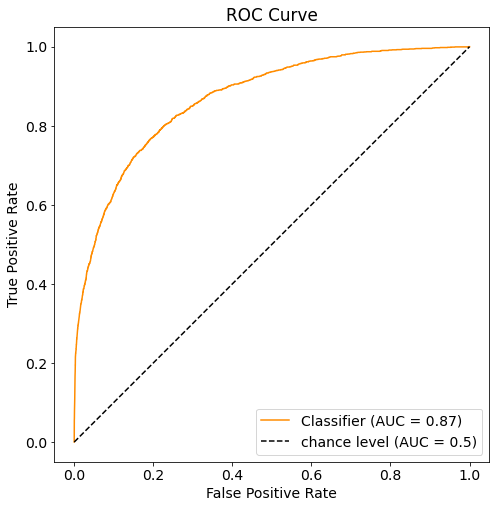

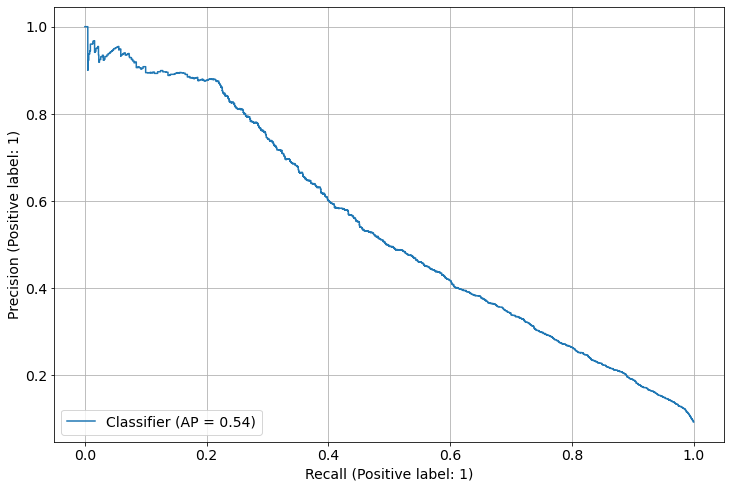

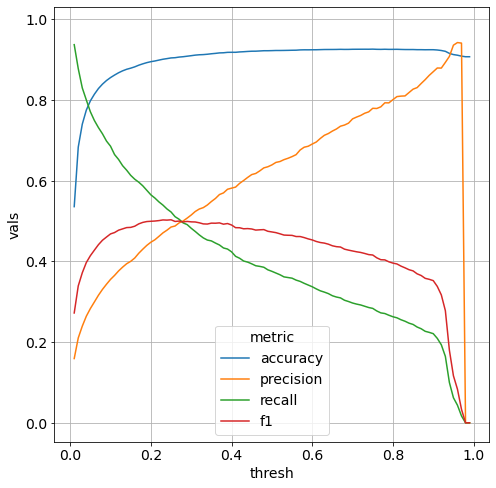

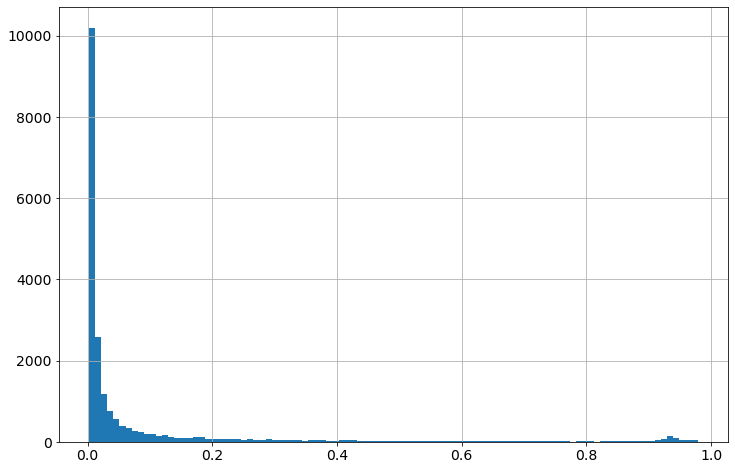

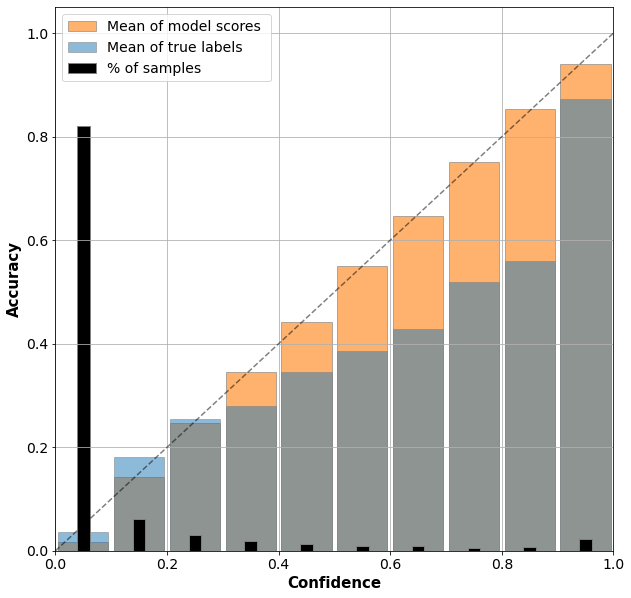

ECE: 4.443%, MCE: 68.359%


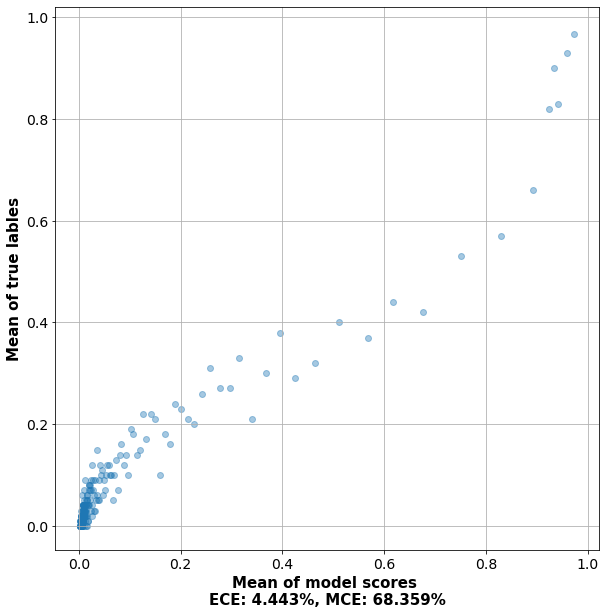

Tsh: 0.10; Acc: 0.856; Prec: 0.355; Recall: 0.686; F1: 0.468


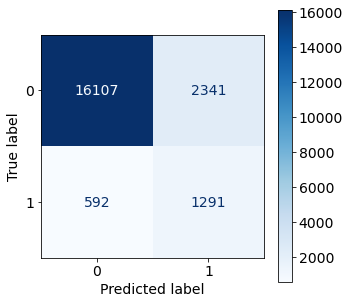

Tsh: 0.20; Acc: 0.895; Prec: 0.448; Recall: 0.565; F1: 0.500


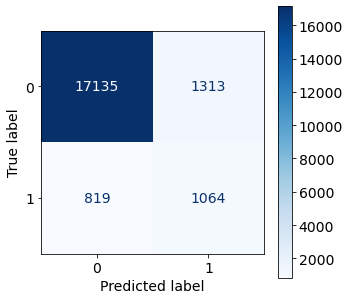

Tsh: 0.30; Acc: 0.910; Prec: 0.515; Recall: 0.482; F1: 0.498


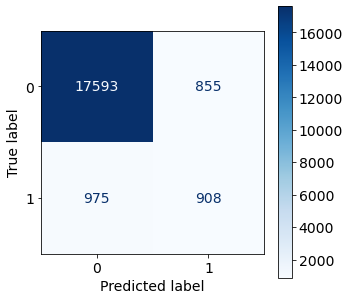

Tsh: 0.40; Acc: 0.918; Prec: 0.582; Recall: 0.424; F1: 0.490


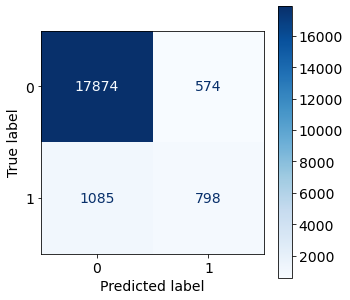

Tsh: 0.50; Acc: 0.923; Prec: 0.639; Recall: 0.375; F1: 0.473


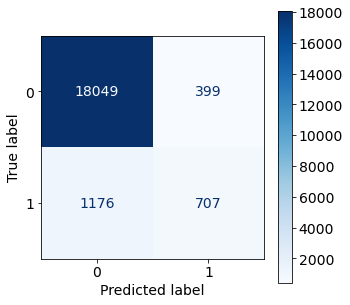

Tsh: 0.60; Acc: 0.925; Prec: 0.691; Recall: 0.337; F1: 0.453


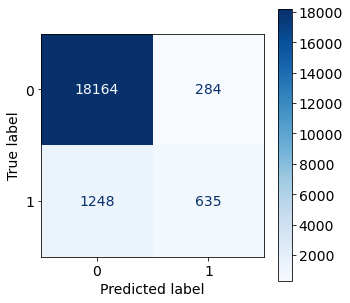

Tsh: 0.70; Acc: 0.926; Prec: 0.753; Recall: 0.297; F1: 0.426


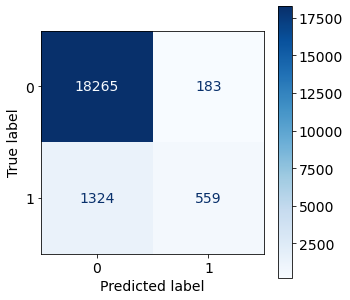

Tsh: 0.80; Acc: 0.926; Prec: 0.801; Recall: 0.263; F1: 0.396


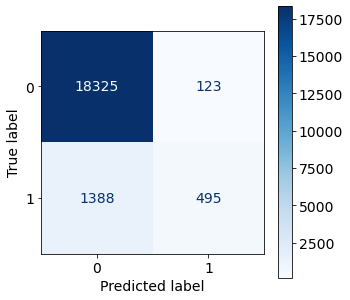

Tsh: 0.90; Acc: 0.925; Prec: 0.870; Recall: 0.221; F1: 0.352


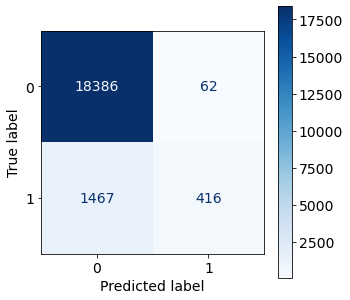

thresh  accuracy  precision    recall        f1
0     0.01  0.535783   0.159224  0.937334  0.272209
4     0.05  0.797944   0.283096  0.771110  0.414147
9     0.10  0.855738   0.355452  0.685608  0.468178
14    0.15  0.879052   0.400208  0.613383  0.484378
19    0.20  0.895136   0.447623  0.565056  0.499531
24    0.25  0.904432   0.485207  0.522570  0.503196
29    0.30  0.909990   0.515031  0.482209  0.498080
34    0.35  0.914761   0.548450  0.450876  0.494899
39    0.40  0.918400   0.581633  0.423792  0.490323
44    0.45  0.921057   0.615257  0.394052  0.480414
49    0.50  0.922532   0.639241  0.375465  0.473068
54    0.55  0.923467   0.659824  0.358471  0.464556
59    0.60  0.924647   0.690968  0.337228  0.453248
64    0.65  0.925385   0.723171  0.314923  0.438772
69    0.70  0.925877   0.753369  0.296867  0.425905
74    0.75  0.926221   0.779562  0.283590  0.415888
79    0.80  0.925680   0.800971  0.262878  0.395842
84    0.85  0.925237   0.827027  0.243760  0.376538
89    0.90  0.924795   0.870293  0.220924  0.352393
94    0.95  0.912744   0.936000  0.062135  0.116534
98    0.99  0.907383   0.000000  0.000000  0.000000

In [98]:
display_results(y, y_prob)

In [99]:
del trainer, preds, model, tok_ds_train, tok_ds_eval, logits, exp, ds_train, ds_eval

## Model distillbert with added in text feautures (for target_90_days)

In [100]:
text_col = "description"
label_col = "target_90_days"
is_val_col = "is_val"
df_raw_dataset.loc[valid_idx, is_val_col] = True
df_raw_dataset[is_val_col].fillna(False, inplace=True)
assert len(valid_idx) == sum(df_raw_dataset[is_val_col])

In [101]:
df_raw_dataset.loc[0,feature_columns_categorial].T

ASSIGNER                             psirt@cisco.com
V3__cvssV3__attackComplexity                     LOW
V3__cvssV3__attackVector                     NETWORK
V3__cvssV3__availabilityImpact                   LOW
V3__cvssV3__baseSeverity                      MEDIUM
V3__cvssV3__confidentialityImpact               NONE
V3__cvssV3__integrityImpact                     NONE
V3__cvssV3__privilegesRequired                  NONE
V3__cvssV3__scope                          UNCHANGED
V3__cvssV3__userInteraction                     NONE
Name: 0, dtype: object

In [102]:
df_dataset = df_raw_dataset[[text_col, label_col, is_val_col]].copy()
df_dataset.description = "ASGN: " + df_raw_dataset.ASSIGNER + \
                            "; CVSS: " + df_raw_dataset.V3__cvssV3__vectorString.str[9:] + \
                            "; EXPSCR: " + (df_raw_dataset.V3__exploitabilityScore).astype(int).astype(str) + \
                            "; BASESCR: " + (df_raw_dataset.V3__cvssV3__baseScore / 2).astype(int).astype(str) + \
                            "; IMPSCR: " + (df_raw_dataset.V3__impactScore / 2).astype(int).astype(str) + \
                            "; " + df_raw_dataset.description
df_dataset.description

0                                                                                                                                                              ASGN: psirt@cisco.com; CVSS: AV:N/AC:L/PR:N/UI:N/S:U/C:N/I:N/A:L; EXPSCR: 3; BASESCR: 2; IMPSCR: 0; The TCP implementation in Cisco Videoscape Distribution Suite for Internet Streaming (VDS-IS) 3.3(0), 3.3(1), 4.0(0), and 4.1(0) does not properly initiate new TCP sessions when a previous session is in a FIN wait state, which allows remote attackers to cause a denial of service (TCP outage) via vectors involving FIN packets, aka Bug ID CSCuy45136.
1                                                                                                                                                                                                                                                                ASGN: cve@mitre.org; CVSS: AV:N/AC:L/PR:L/UI:R/S:C/C:L/I:L/A:N; EXPSCR: 2; BASESCR: 2; IMPSCR: 1; Cross-site scripting (XSS) vulnerab

In [103]:
# df_raw_dataset.description = "ASSIGNER: " + df_raw_dataset.ASSIGNER + \
#                              "; EXPSCR: " + (df_raw_dataset.V3__exploitabilityScore).astype(int).astype(str) + \
#                              "; BASESCR: " + (df_raw_dataset.V3__cvssV3__baseScore / 2).astype(int).astype(str) + \
#                              "; IMPSCR: " + (df_raw_dataset.V3__impactScore / 2).astype(int).astype(str) + \
#                              "; Complexity: " + df_raw_dataset.V3__cvssV3__attackComplexity + \
#                              "; Vector: " + df_raw_dataset.V3__cvssV3__attackVector + \
#                              "; Availability: " + df_raw_dataset.V3__cvssV3__availabilityImpact + \
#                              "; Severity: " + df_raw_dataset.V3__cvssV3__baseSeverity + \
#                              "; Confidentiality: " + df_raw_dataset.V3__cvssV3__confidentialityImpact + \
#                              "; Integrity: " + df_raw_dataset.V3__cvssV3__integrityImpact + \
#                              "; Privileges: " + df_raw_dataset.V3__cvssV3__privilegesRequired + \
#                              "; Scope: " + df_raw_dataset.V3__cvssV3__scope + \
#                              "; Interaction: " + df_raw_dataset.V3__cvssV3__userInteraction + \
#                              "; " + df_raw_dataset.description
# df_raw_dataset.description

In [104]:
df_train = df_dataset.loc[~df_dataset.is_val,[text_col, label_col]].copy()
df_train["target_90_days"] = df_train["target_90_days"].astype(int)
df_train

description  \
0                                                                                                                                                            ASGN: psirt@cisco.com; CVSS: AV:N/AC:L/PR:N/UI:N/S:U/C:N/I:N/A:L; EXPSCR: 3; BASESCR: 2; IMPSCR: 0; The TCP implementation in Cisco Videoscape Distribution Suite for Internet Streaming (VDS-IS) 3.3(0), 3.3(1), 4.0(0), and 4.1(0) does not properly initiate new TCP sessions when a previous session is in a FIN wait state, which allows remote attackers to cause a denial of service (TCP outage) via vectors involving FIN packets, aka Bug ID CSCuy45136.   
1                                                                                                                                                                                                                                                              ASGN: cve@mitre.org; CVSS: AV:N/AC:L/PR:L/UI:R/S:C/C:L/I:L/A:N; EXPSCR: 2; BASESCR: 2; IMPSCR: 1; Cross-site scripting (XSS) vulnerability in the format function in libraries/sql-parser/src/Utils/Error.php in the SQL parser in phpMyAdmin 4.5.x before 4.5.5.1 allows remote authenticated users to inject arbitrary web script or HTML via a crafted query.   
2       ASGN: cve@mitre.org; CVSS: AV:N/AC:L/PR:N/UI:R/S:C/C:L/I:L/A:N; EXPSCR: 2; BASESCR: 3; IMPSCR: 1; Multiple cross-site scripting (XSS) vulnerabilities in phpMyAdmin 4.0.x before 4.0.10.15, 4.4.x before 4.4.15.5, and 4.5.x before 4.5.5.1 allow remote attackers to inject arbitrary web script or HTML via (1) a crafted Host HTTP header, related to libraries/Config.class.php; (2) crafted JSON data, related to file_echo.php; (3) a crafted SQL query, related to js/functions.js; (4) the initial parameter to libraries/server_privileges.lib.php in the user accounts page; or (5) the it parameter to li...   
3                                                                    ASGN: cve@mitre.org; CVSS: AV:N/AC:L/PR:L/UI:R/S:C/C:L/I:L/A:N; EXPSCR: 2; BASESCR: 2; IMPSCR: 1; Multiple cross-site scripting (XSS) vulnerabilities in phpMyAdmin 4.4.x before 4.4.15.5 and 4.5.x before 4.5.5.1 allow remote authenticated users to inject arbitrary web script or HTML via (1) normalization.php or (2) js/normalization.js in the database normalization page, (3) templates/database/structure/sortable_header.phtml in the database structure page, or (4) the pos parameter to db_central_columns.php in the central columns page.   
4                                                                                                                                                                                                                                     ASGN: cve@mitre.org; CVSS: AV:N/AC:H/PR:N/UI:N/S:C/C:N/I:H/A:N; EXPSCR: 2; BASESCR: 3; IMPSCR: 2; The checkHTTP function in libraries/Config.class.php in phpMyAdmin 4.5.x before 4.5.5.1 does not verify X.509 certificates from api.github.com SSL servers, which allows man-in-the-middle attackers to spoof these servers and obtain sensitive information via a crafted certificate.   
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         ...   
101658                                                     ASGN: security-advisories@github.com; CVSS: AV:N/AC:L/PR:N/UI:R/S:U/C:N/I:L/A:N; EXPSCR: 2; BASESCR: 2; IMPSCR: 0; solidus_backend is the admin interface for the Solidus e-commerce framework. Versions prior to 3.1.6, 3.0.6, and 2.11.16 contain a cross-site req

In [105]:
df_eval = df_dataset.loc[df_dataset.is_val,[text_col, label_col]].copy()
df_eval["target_90_days"] = df_eval["target_90_days"].astype(int)
df_eval

description  \
12                                                                                                                                                                                                                                                                     ASGN: psirt@cisco.com; CVSS: AV:N/AC:L/PR:N/UI:R/S:C/C:L/I:L/A:N; EXPSCR: 2; BASESCR: 3; IMPSCR: 1; Cross-site scripting (XSS) vulnerability in the Device Management UI in the management interface in Cisco FireSIGHT System Software 6.1.0 allows remote attackers to inject arbitrary web script or HTML via a crafted value, aka Bug ID CSCuy41687.   
15                                                                                                                                  ASGN: secalert@redhat.com; CVSS: AV:N/AC:L/PR:N/UI:N/S:U/C:N/I:N/A:H; EXPSCR: 3; BASESCR: 3; IMPSCR: 1; Multiple integer overflows in OpenSSL 1.0.1 before 1.0.1s and 1.0.2 before 1.0.2g allow remote attackers to cause a denial of service (heap memory corruption or NULL pointer dereference) or possibly have unspecified other impact via a long digit string that is mishandled by the (1) BN_dec2bn or (2) BN_hex2bn function, related to crypto/bn/bn.h and crypto/bn/bn_print.c.   
26                                                                                                                                                                                                                                               ASGN: psirt@cisco.com; CVSS: AV:N/AC:L/PR:N/UI:N/S:U/C:L/I:N/A:N; EXPSCR: 3; BASESCR: 2; IMPSCR: 0; The password-management administration component in Cisco Policy Suite (CPS) 7.0.1.3, 7.0.2, 7.0.2-att, 7.0.3-att, 7.0.4-att, and 7.5.0 allows remote attackers to bypass intended RBAC restrictions and read unspecified data via unknown vectors, aka Bug ID CSCut85211.   
42      ASGN: psirt@adobe.com; CVSS: AV:N/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H; EXPSCR: 2; BASESCR: 4; IMPSCR: 2; Use-after-free vulnerability in Adobe Flash Player before 18.0.0.268 and 19.x and 20.x before 20.0.0.228 on Windows and OS X and before 11.2.202.554 on Linux, Adobe AIR before 20.0.0.204, Adobe AIR SDK before 20.0.0.204, and Adobe AIR SDK & Compiler before 20.0.0.204 allows attackers to execute arbitrary code via crafted MPEG-4 data, a different vulnerability than CVE-2015-8048, CVE-2015-8049, CVE-2015-8050, CVE-2015-8055, CVE-2015-8056, CVE-2015-8057, CVE-2015-8058, CVE-2015-8059, CVE-2015-...   
49                                                                                                                                ASGN: security@google.com; CVSS: AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H; EXPSCR: 3; BASESCR: 4; IMPSCR: 2; The PendingScript::notifyFinished function in WebKit/Source/core/dom/PendingScript.cpp in Google Chrome before 49.0.2623.75 relies on memory-cache information about integrity-check occurrences instead of integrity-check successes, which allows remote attackers to bypass the Subresource Integrity (aka SRI) protection mechanism by triggering two loads of the same resource.   
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         ...   
101634  ASGN: psirt@us.ibm.com; CVSS: AV:N/AC:L/PR:N/UI:R/S:U/C:N/I:H/A:N; EXPSCR: 2; BASESCR: 3; IMPSCR: 1; IBM Business Automation Workflow traditional 21.0.1 through 21.0.3, 20.0.0.1 through 20.0.0.2, 19.0.0.1 through 19.0.0.3, 18.0.0.0 through 18.0.0.1, IBM Business Automation Workflow containers V21.0.1 - V21.0.3

In [106]:
# # for unit-test
# if UNIT_TEST:
#     df_train = df_train.sample(1000).reset_index()
#     df_eval = df_eval.sample(200).reset_index()

In [107]:
!pip install -q datasets
!pip install -q evaluate

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [108]:
df_train["input"] = df_train.description
df_eval["input"] = df_eval.description

In [109]:
from datasets import Dataset,DatasetDict

In [110]:
ds_train = Dataset.from_pandas(df_train)
ds_train

Dataset({
    features: ['description', 'target_90_days', 'input', '__index_level_0__'],
    num_rows: 81333
})

In [111]:
ds_eval = Dataset.from_pandas(df_eval)
ds_eval

Dataset({
    features: ['description', 'target_90_days', 'input', '__index_level_0__'],
    num_rows: 20331
})

In [112]:
# model_nm = 'distilbert-base-uncased'
model_nm = 'distilbert-base-cased'

In [113]:
from transformers import AutoModelForSequenceClassification,AutoTokenizer

In [114]:
tokz = AutoTokenizer.from_pretrained(model_nm)

print(tokz.tokenize("ASGN: cve@mitre.org; CVSS: AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H; EXPSCR: 3; BASESCR: 4; IMPSCR: 2; SQL injection vulnerability in Sefrengo before 1.6.5 beta2."))

https://huggingface.co/distilbert-base-cased/resolve/main/tokenizer_config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmp7jdv2qiq


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

storing https://huggingface.co/distilbert-base-cased/resolve/main/tokenizer_config.json in cache at /root/.cache/huggingface/transformers/81e970e5e6ec68be12da0f8f3b2f2469c78d579282299a2ea65b4b7441719107.ec5c189f89475aac7d8cbd243960a0655cfadc3d0474da8ff2ed0bf1699c2a5f
creating metadata file for /root/.cache/huggingface/transformers/81e970e5e6ec68be12da0f8f3b2f2469c78d579282299a2ea65b4b7441719107.ec5c189f89475aac7d8cbd243960a0655cfadc3d0474da8ff2ed0bf1699c2a5f
https://huggingface.co/distilbert-base-cased/resolve/main/config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpo0ptn4t9


Downloading:   0%|          | 0.00/411 [00:00<?, ?B/s]

storing https://huggingface.co/distilbert-base-cased/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/ebe1ea24d11aa664488b8de5b21e33989008ca78f207d4e30ec6350b693f073f.302bfd1b5e031cc1b17796e0b6e5b242ba2045d31d00f97589e12b458ebff27a
creating metadata file for /root/.cache/huggingface/transformers/ebe1ea24d11aa664488b8de5b21e33989008ca78f207d4e30ec6350b693f073f.302bfd1b5e031cc1b17796e0b6e5b242ba2045d31d00f97589e12b458ebff27a
loading configuration file https://huggingface.co/distilbert-base-cased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/ebe1ea24d11aa664488b8de5b21e33989008ca78f207d4e30ec6350b693f073f.302bfd1b5e031cc1b17796e0b6e5b242ba2045d31d00f97589e12b458ebff27a
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-cased",
  "activation": "gelu",
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distil

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

storing https://huggingface.co/distilbert-base-cased/resolve/main/vocab.txt in cache at /root/.cache/huggingface/transformers/ba377304984dc63e3ede0e23a938bbbf04d5c3835b66d5bb48343aecca188429.437aa611e89f6fc6675a049d2b5545390adbc617e7d655286421c191d2be2791
creating metadata file for /root/.cache/huggingface/transformers/ba377304984dc63e3ede0e23a938bbbf04d5c3835b66d5bb48343aecca188429.437aa611e89f6fc6675a049d2b5545390adbc617e7d655286421c191d2be2791
https://huggingface.co/distilbert-base-cased/resolve/main/tokenizer.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpq7d8go25


Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

storing https://huggingface.co/distilbert-base-cased/resolve/main/tokenizer.json in cache at /root/.cache/huggingface/transformers/acb5c2138c1f8c84f074b86dafce3631667fccd6efcb1a7ea1320cf75c386a36.3dab63143af66769bbb35e3811f75f7e16b2320e12b7935e216bd6159ce6d9a6
creating metadata file for /root/.cache/huggingface/transformers/acb5c2138c1f8c84f074b86dafce3631667fccd6efcb1a7ea1320cf75c386a36.3dab63143af66769bbb35e3811f75f7e16b2320e12b7935e216bd6159ce6d9a6
loading file https://huggingface.co/distilbert-base-cased/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/ba377304984dc63e3ede0e23a938bbbf04d5c3835b66d5bb48343aecca188429.437aa611e89f6fc6675a049d2b5545390adbc617e7d655286421c191d2be2791
loading file https://huggingface.co/distilbert-base-cased/resolve/main/tokenizer.json from cache at /root/.cache/huggingface/transformers/acb5c2138c1f8c84f074b86dafce3631667fccd6efcb1a7ea1320cf75c386a36.3dab63143af66769bbb35e3811f75f7e16b2320e12b7935e216bd6159ce6d9a6
loading file 

['AS', '##G', '##N', ':', 'c', '##ve', '@', 'mit', '##re', '.', 'org', ';', 'C', '##VS', '##S', ':', 'A', '##V', ':', 'N', '/', 'AC', ':', 'L', '/', 'PR', ':', 'N', '/', 'U', '##I', ':', 'N', '/', 'S', ':', 'U', '/', 'C', ':', 'H', '/', 'I', ':', 'H', '/', 'A', ':', 'H', ';', 'E', '##X', '##PS', '##CR', ':', '3', ';', 'BA', '##SE', '##SC', '##R', ':', '4', ';', 'I', '##MP', '##SC', '##R', ':', '2', ';', 'S', '##QL', 'injection', 'vulnerability', 'in', 'Se', '##f', '##ren', '##go', 'before', '1', '.', '6', '.', '5', 'beta', '##2', '.']


In [115]:
def tok_func(x): return tokz(x["input"], truncation=True)

tok_ds_train = ds_train.map(tok_func, batched=True)
tok_ds_eval = ds_eval.map(tok_func, batched=True)

tok_ds_train = tok_ds_train.rename_columns({'target_90_days':'labels'})
tok_ds_eval = tok_ds_eval.rename_columns({'target_90_days':'labels'})

  0%|          | 0/82 [00:00<?, ?ba/s]

  0%|          | 0/21 [00:00<?, ?ba/s]

In [116]:
from transformers import TrainingArguments,Trainer

bs = 32
epochs = 3 if not UNIT_TEST else 1
lr = 2e-5

args = TrainingArguments('outputs', learning_rate=lr, warmup_ratio=0.1, lr_scheduler_type='cosine', fp16=True,
    evaluation_strategy="epoch", per_device_train_batch_size=bs, per_device_eval_batch_size=bs*2,
    num_train_epochs=epochs, weight_decay=0.01, report_to='none')

PyTorch: setting up devices


In [117]:
# # For one metric
# import evaluate

# metric = evaluate.load("accuracy")

# def compute_metrics(eval_pred):
#     logits, labels = eval_pred
#     predictions = np.argmax(logits, axis=-1)
#     return metric.compute(predictions=predictions, references=labels)

In [118]:
# For multi metrics
import evaluate

def compute_metrics(eval_pred):
    metric_accuracy = evaluate.load("accuracy")
    metric_precision = evaluate.load("precision")
    metric_recall = evaluate.load("recall")
    metric_f1 = evaluate.load("f1")
    metric_roc_auc = evaluate.load("roc_auc")
    
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    exp = np.exp(logits)
    pred_scores = (exp/np.expand_dims(np.sum(exp, axis=-1),axis=0).T).T[1]
    
    accuracy = metric_accuracy.compute(predictions=predictions, references=labels)["accuracy"]
    precision = metric_precision.compute(predictions=predictions, references=labels)["precision"]
    recall = metric_recall.compute(predictions=predictions, references=labels)["recall"]
    f1 = metric_f1.compute(predictions=predictions, references=labels)["f1"]
    roc_auc = metric_roc_auc.compute(prediction_scores=pred_scores, references=labels)["roc_auc"]
    
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1, "roc_auc": roc_auc}

In [119]:
from torch import nn
from transformers import Trainer


class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # compute custom loss (suppose one has 3 labels with different weights)
        loss_fct = nn.CrossEntropyLoss(weight=torch.tensor([1.0, 10.0]).cuda())
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

In [120]:
model = AutoModelForSequenceClassification.from_pretrained(model_nm, num_labels=2)

# trainer = Trainer(model, args, train_dataset=tok_ds_train, eval_dataset=tok_ds_eval,
#                   tokenizer=tokz, compute_metrics=compute_metrics)
trainer = CustomTrainer(model, args, train_dataset=tok_ds_train, eval_dataset=tok_ds_eval,
                        tokenizer=tokz, compute_metrics=compute_metrics)

trainer.train();

loading configuration file https://huggingface.co/distilbert-base-cased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/ebe1ea24d11aa664488b8de5b21e33989008ca78f207d4e30ec6350b693f073f.302bfd1b5e031cc1b17796e0b6e5b242ba2045d31d00f97589e12b458ebff27a
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-cased",
  "activation": "gelu",
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.20.1",
  "vocab_size": 28996
}

https://huggingface.co/distilbert-base-cased/resolve/main/pytorch_model.bin not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpxcewall7


Downloading:   0%|          | 0.00/251M [00:00<?, ?B/s]

storing https://huggingface.co/distilbert-base-cased/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/9c9f39769dba4c5fe379b4bc82973eb01297bd607954621434eb9f1bc85a23a0.06b428c87335c1bb22eae46fdab31c8286efa0aa09e898a7ac42ddf5c3f5dc19
creating metadata file for /root/.cache/huggingface/transformers/9c9f39769dba4c5fe379b4bc82973eb01297bd607954621434eb9f1bc85a23a0.06b428c87335c1bb22eae46fdab31c8286efa0aa09e898a7ac42ddf5c3f5dc19
loading weights file https://huggingface.co/distilbert-base-cased/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/9c9f39769dba4c5fe379b4bc82973eb01297bd607954621434eb9f1bc85a23a0.06b428c87335c1bb22eae46fdab31c8286efa0aa09e898a7ac42ddf5c3f5dc19
Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.bias', 'voc

Saving model checkpoint to outputs/checkpoint-500
Configuration saved in outputs/checkpoint-500/config.json
Model weights saved in outputs/checkpoint-500/pytorch_model.bin
tokenizer config file saved in outputs/checkpoint-500/tokenizer_config.json
Special tokens file saved in outputs/checkpoint-500/special_tokens_map.json
/opt/conda/lib/python3.7/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Saving model checkpoint to outputs/checkpoint-1000
Configuration saved in outputs/checkpoint-1000/config.json
Model weights saved in outputs/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in outputs/checkpoint-1000/tokenizer_config.json
Special tokens file saved in outputs/checkpoint-1000/special_tokens_map.json
/opt/conda/lib/python3.7/site-packages/torch/nn/parallel/_functions.py:68:

In [121]:
preds = trainer.predict(tok_ds_eval)

logits = preds.predictions
exp = np.exp(logits)
y_prob = (exp/np.expand_dims(np.sum(exp, axis=-1),axis=0).T).T[1]

y = preds.label_ids

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: description, input, __index_level_0__. If description, input, __index_level_0__ are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 20331
  Batch size = 128
/opt/conda/lib/python3.7/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


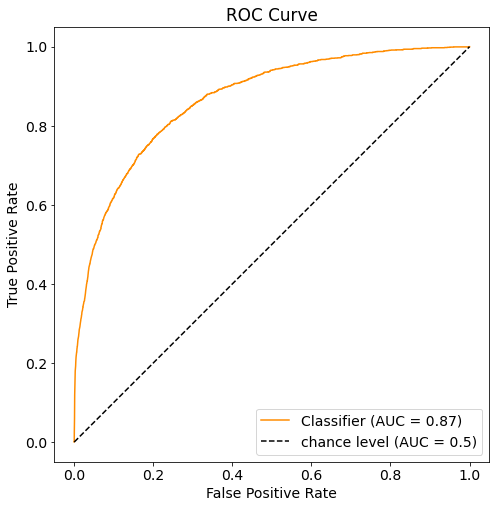

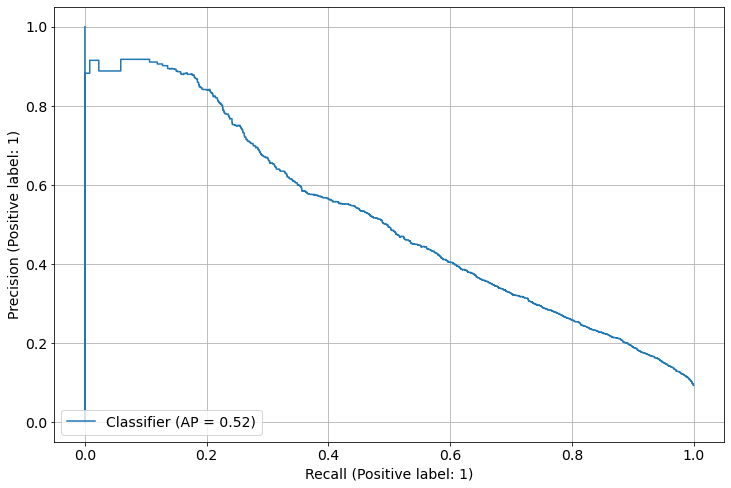

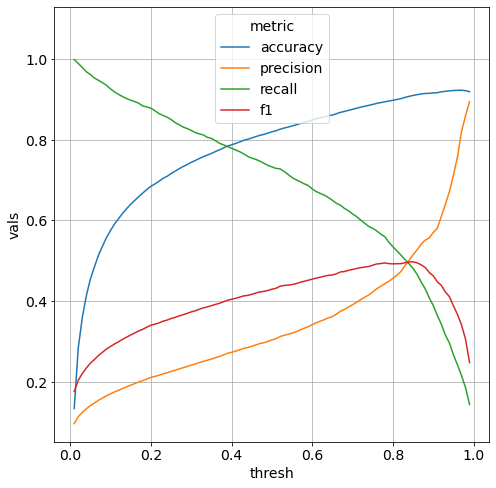

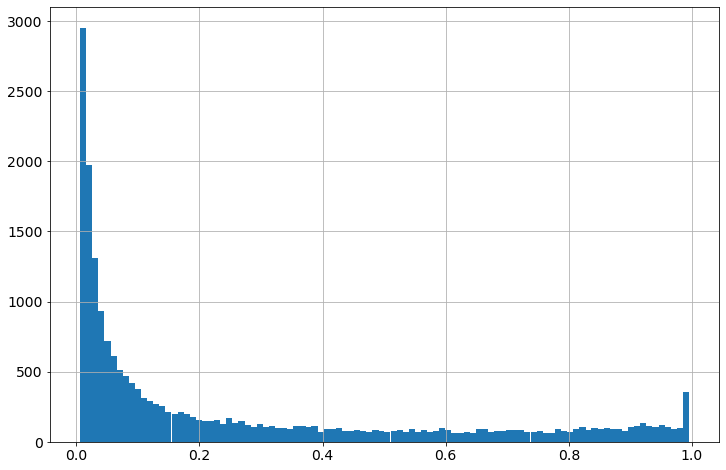

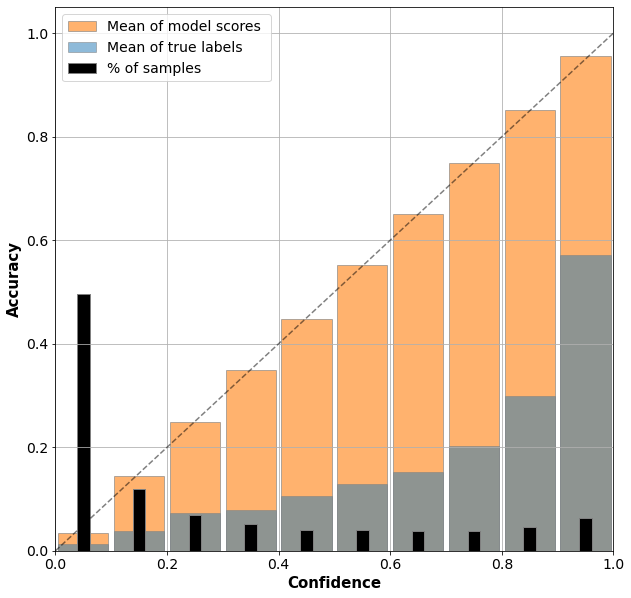

ECE: 16.895%, MCE: 99.512%


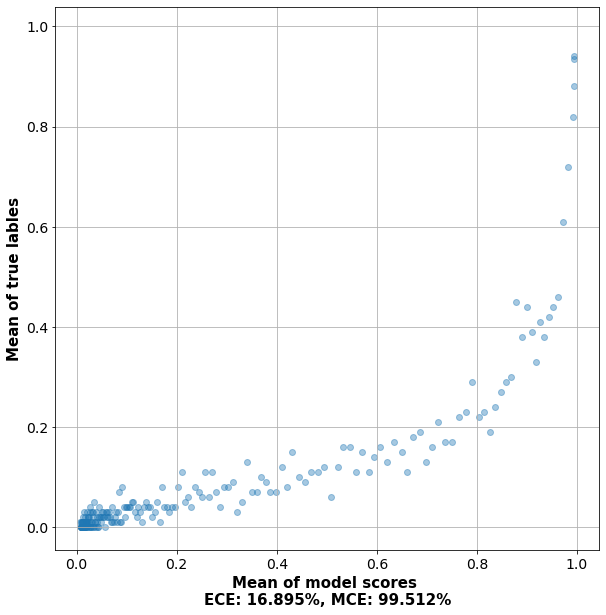

Tsh: 0.10; Acc: 0.575; Prec: 0.170; Recall: 0.926; F1: 0.288


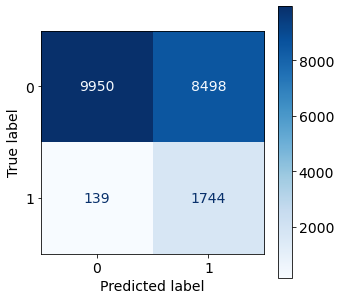

Tsh: 0.20; Acc: 0.685; Prec: 0.211; Recall: 0.878; F1: 0.340


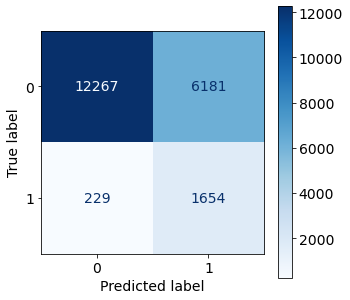

Tsh: 0.30; Acc: 0.744; Prec: 0.241; Recall: 0.823; F1: 0.373


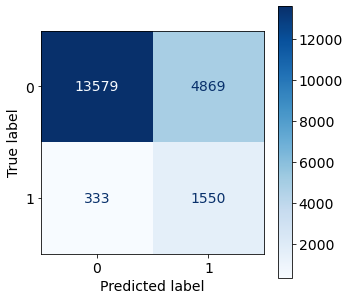

Tsh: 0.40; Acc: 0.788; Prec: 0.273; Recall: 0.779; F1: 0.405


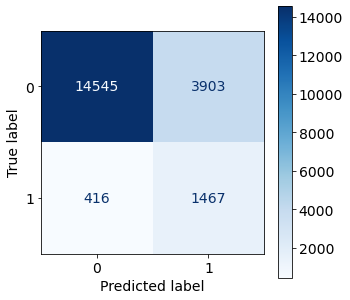

Tsh: 0.50; Acc: 0.820; Prec: 0.304; Recall: 0.733; F1: 0.430


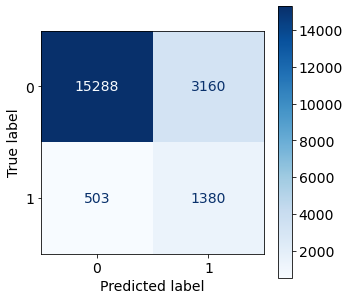

Tsh: 0.60; Acc: 0.849; Prec: 0.342; Recall: 0.678; F1: 0.455


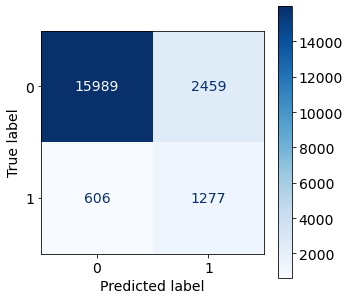

Tsh: 0.70; Acc: 0.876; Prec: 0.391; Recall: 0.616; F1: 0.479


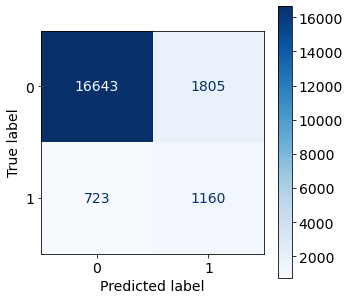

Tsh: 0.80; Acc: 0.898; Prec: 0.456; Recall: 0.535; F1: 0.492


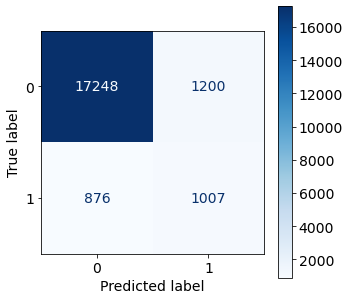

Tsh: 0.90; Acc: 0.916; Prec: 0.570; Recall: 0.389; F1: 0.463


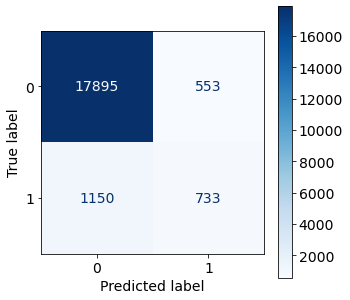

thresh  accuracy  precision    recall        f1
0     0.01  0.133737   0.096506  0.998938  0.176008
4     0.05  0.454478   0.141154  0.961763  0.246177
9     0.10  0.575181   0.170279  0.926182  0.287670
14    0.15  0.640155   0.191832  0.898035  0.316134
19    0.20  0.684718   0.211104  0.878386  0.340399
24    0.25  0.716099   0.225779  0.850239  0.356809
29    0.30  0.744135   0.241471  0.823155  0.373404
34    0.35  0.766022   0.256441  0.803505  0.388796
39    0.40  0.787566   0.273184  0.779076  0.404522
44    0.45  0.804437   0.287943  0.754647  0.416838
49    0.50  0.819832   0.303965  0.732873  0.429706
54    0.55  0.834292   0.320791  0.706320  0.441201
59    0.60  0.849245   0.341809  0.678173  0.454529
64    0.65  0.861394   0.361809  0.650027  0.464869
69    0.70  0.875658   0.391231  0.616038  0.478548
74    0.75  0.887708   0.422660  0.580457  0.489147
79    0.80  0.897890   0.456275  0.534785  0.492421
84    0.85  0.909990   0.515065  0.481147  0.497529
89    0.90  0.916236   0.569984  0.389272  0.462607
94    0.95  0.922139   0.712465  0.267127  0.388567
98    0.99  0.919138   0.894389  0.143919  0.247941

In [122]:
display_results(y, y_prob)

In [123]:
del trainer, preds, model, tok_ds_train, tok_ds_eval, logits, exp, ds_train, ds_eval

## (not implemented) Model catboost + SentenceTransformer embeddings (for target_90_days)

## Model auto.gluon.ai (for target_90_days)

In [18]:
# Multimodal Data Tables: Combining BERT/Transformers and Classical Tabular Models
# https://auto.gluon.ai/stable/tutorials/tabular_prediction/tabular-multimodal-text-others.html

In [19]:
text_col = "description"
label_col = "target_90_days"
is_val_col = "is_val"
df_raw_dataset.loc[valid_idx, is_val_col] = True
df_raw_dataset[is_val_col].fillna(False, inplace=True)
assert len(valid_idx) == sum(df_raw_dataset[is_val_col])

In [20]:
df_train = df_raw_dataset.loc[~df_raw_dataset.is_val,feature_columns + [text_col, label_col]].copy()
df_train["target_90_days"] = df_train["target_90_days"].astype(int)
# df_train

In [21]:
df_eval = df_raw_dataset.loc[df_raw_dataset.is_val,feature_columns + [text_col, label_col]].copy()
df_eval["target_90_days"] = df_eval["target_90_days"].astype(int)
# df_eval

In [22]:
# # for unit-test
# if UNIT_TEST:
#     df_train = df_train.sample(5000)
#     df_eval = df_eval.sample(1000)

In [23]:
!pip install -q autogluon

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
tfx-bsl 1.9.0 requires google-api-python-client<2,>=1.7.11, but you have google-api-python-client 2.52.0 which is incompatible.
tfx-bsl 1.9.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tfx-bsl 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<3,>=1.15.5, but you have tensorflow 2.6.4 which is incompatible.
tensorflow 2.6.4 requires h5py~=3.1.0, but you have h5py 3.7.0 which is incompatible.
tensorflow 2.6.4 requires numpy~=1.19.2, but you have numpy 1.21.6 which is incompatible.
tensorflow 2.6.4 requires tensorboard<2.7,>=2.6.0, but you have tensorboard 2.11.

In [24]:
from autogluon.tabular import TabularPredictor

In [25]:
predictor = TabularPredictor(label='target_90_days', eval_metric="roc_auc", path='ag_tabular_product_sentiment_multimodal')
predictor.fit(df_train, hyperparameters='multimodal')
# predictor.fit(df_train, hyperparameters='multimodal', presets='best_quality')

	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "ag_tabular_product_sentiment_multimodal/"
AutoGluon Version:  0.6.2
Python Version:     3.7.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Thu Feb 2 10:22:42 UTC 2023
Train Data Rows:    81333
Train Data Columns: 14
Label Column: target_90_days
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to pr

[1000]	valid_set's binary_logloss: 0.193715
[2000]	valid_set's binary_logloss: 0.193203


	0.8951	 = Validation score   (roc_auc)
	152.69s	 = Training   runtime
	0.6s	 = Validation runtime
Fitting model: LightGBMXT ...


[1000]	valid_set's binary_logloss: 0.19313
[2000]	valid_set's binary_logloss: 0.190175


	0.8987	 = Validation score   (roc_auc)
	173.06s	 = Training   runtime
	0.63s	 = Validation runtime
Fitting model: CatBoost ...
	0.9017	 = Validation score   (roc_auc)
	5347.86s	 = Training   runtime
	1.51s	 = Validation runtime
Fitting model: XGBoost ...
	0.8976	 = Validation score   (roc_auc)
	197.19s	 = Training   runtime
	0.74s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	0.8408	 = Validation score   (roc_auc)
	217.84s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: VowpalWabbit ...
		Currently, we only support VW version >=8.10.1 and <8.11.0. Found vowpalwabbit version: 9.6.0
Detailed Traceback:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/autogluon/core/trainer/abstract_trainer.py", line 1422, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, total_resources=total_resources, **model_fit_kwargs)
  File "/opt/conda/lib/python3.7/site-packages/autogluon/core/trainer/abstract_trainer.py", li

In [26]:
predictor.leaderboard(df_eval)

                 model  score_test  score_val  pred_time_test  pred_time_val     fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2    0.885676   0.908159       39.858049       3.533796  6109.301955                 0.016869                0.000998           0.408898            2       True          7
1        LightGBMLarge    0.884974   0.897873        9.057891       0.605312   172.937728                 9.057891                0.605312         172.937728            1       True          6
2             LightGBM    0.879371   0.895064        9.179886       0.601124   152.691995                 9.179886                0.601124         152.691995            1       True          1
3           LightGBMXT    0.878694   0.898742        9.740407       0.625238   173.063365                 9.740407                0.625238         173.063365            1       True          2
4             CatBoost    0.878005 

model  score_test  score_val  pred_time_test  pred_time_val  \
0  WeightedEnsemble_L2    0.885676   0.908159       39.858049       3.533796   
1        LightGBMLarge    0.884974   0.897873        9.057891       0.605312   
2             LightGBM    0.879371   0.895064        9.179886       0.601124   
3           LightGBMXT    0.878694   0.898742        9.740407       0.625238   
4             CatBoost    0.878005   0.901686        7.916895       1.510510   
5              XGBoost    0.875900   0.897606       12.563863       0.735749   
6       NeuralNetTorch    0.802773   0.840812        0.562124       0.055990   

      fit_time  pred_time_test_marginal  pred_time_val_marginal  \
0  6109.301955                 0.016869                0.000998   
1   172.937728                 9.057891                0.605312   
2   152.691995                 9.179886                0.601124   
3   173.063365                 9.740407                0.625238   
4  5347.859922                 7.916895                1.510510   
5   197.188109                12.563863                0.735749   
6   217.843932                 0.562124                0.055990   

   fit_time_marginal  stack_level  can_infer  fit_order  
0           0.408898            2       True          7  
1         172.937728            1       True          6  
2         152.691995            1       True          1  
3         173.063365            1       True          2  
4        5347.859922            1       True          3  
5         197.188109            1       True          4  
6         217.843932            1       True          5

In [27]:
y = np.array(df_eval.target_90_days)
y_prob = np.array(predictor.predict_proba(df_eval)[1])

In [28]:
# predictor.feature_importance(df_eval)

In [29]:
del predictor

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


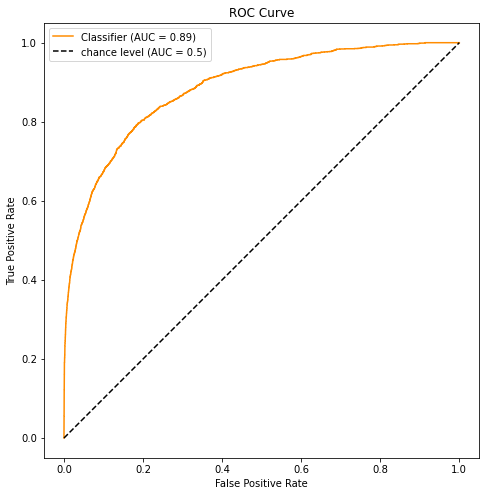

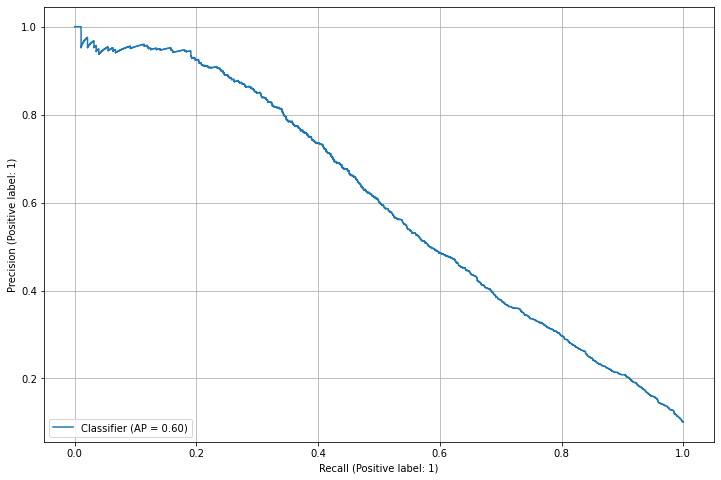

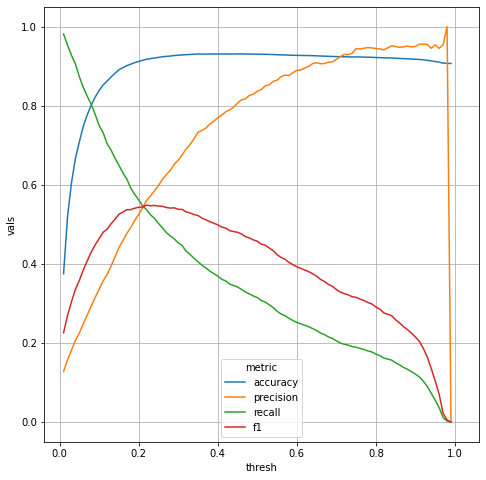

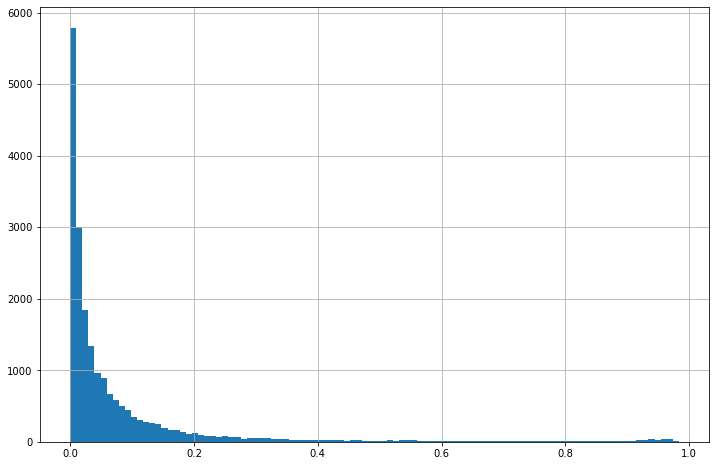

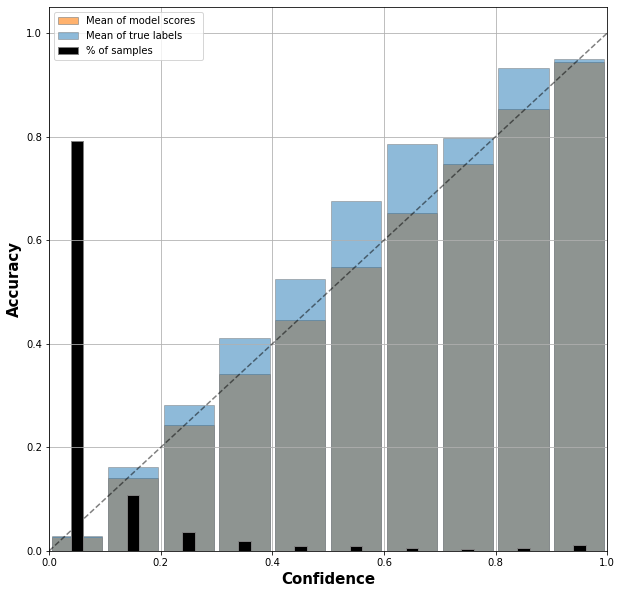

ECE: 1.667%, MCE: 74.202%


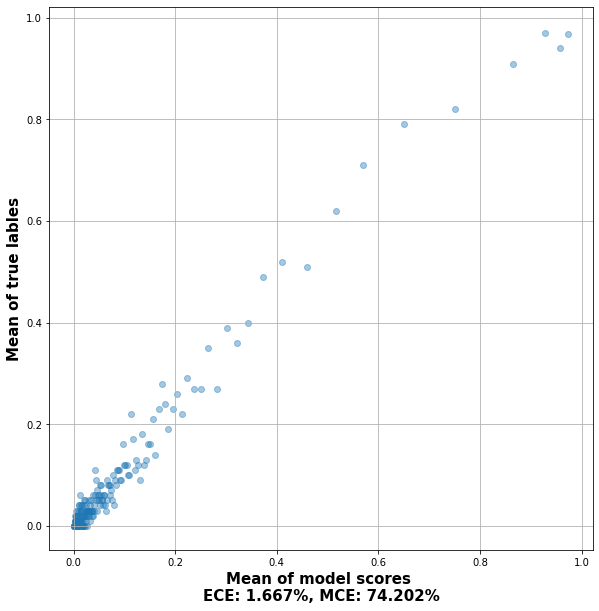

Tsh: 0.10; Acc: 0.839; Prec: 0.336; Recall: 0.750; F1: 0.464


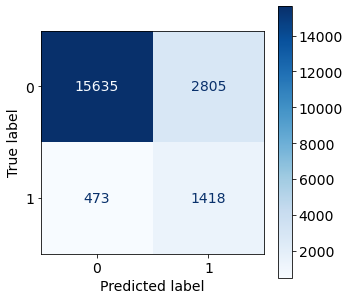

Tsh: 0.20; Acc: 0.912; Prec: 0.525; Recall: 0.562; F1: 0.543


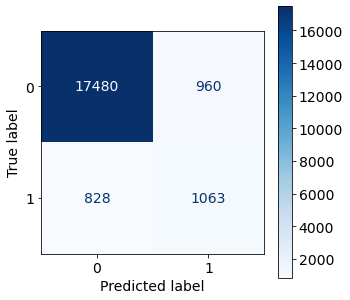

Tsh: 0.30; Acc: 0.928; Prec: 0.662; Recall: 0.453; F1: 0.538


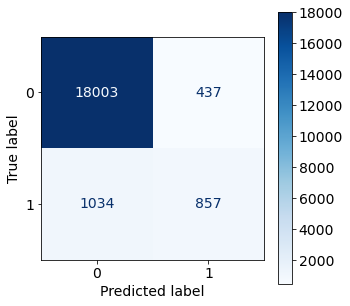

Tsh: 0.40; Acc: 0.931; Prec: 0.770; Recall: 0.369; F1: 0.499


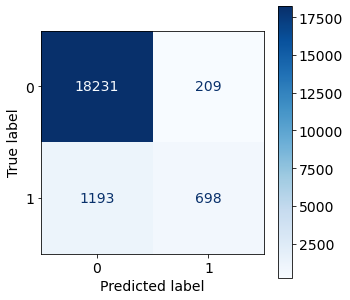

Tsh: 0.50; Acc: 0.931; Prec: 0.837; Recall: 0.315; F1: 0.457


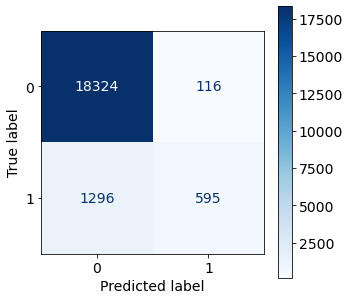

Tsh: 0.60; Acc: 0.927; Prec: 0.890; Recall: 0.252; F1: 0.392


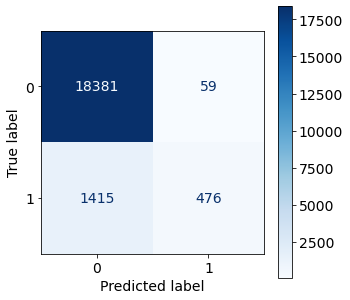

Tsh: 0.70; Acc: 0.924; Prec: 0.917; Recall: 0.205; F1: 0.335


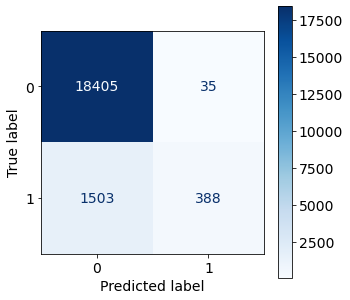

Tsh: 0.80; Acc: 0.922; Prec: 0.945; Recall: 0.172; F1: 0.291


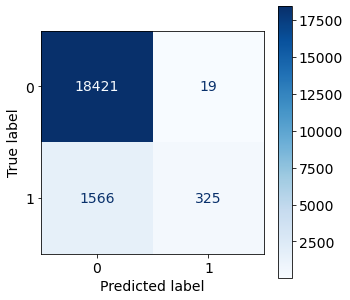

Tsh: 0.90; Acc: 0.918; Prec: 0.950; Recall: 0.121; F1: 0.215


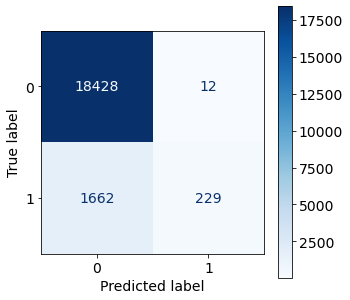

thresh  accuracy  precision    recall        f1
0     0.01  0.375289   0.127806  0.981491  0.226162
4     0.05  0.709163   0.225423  0.873083  0.358329
9     0.10  0.838768   0.335780  0.749868  0.463853
14    0.15  0.890955   0.441409  0.649392  0.525572
19    0.20  0.912055   0.525457  0.562136  0.543178
24    0.25  0.922335   0.598237  0.502380  0.546134
29    0.30  0.927647   0.662287  0.453199  0.538148
34    0.35  0.930992   0.733270  0.405605  0.522302
39    0.40  0.931041   0.769570  0.369117  0.498928
44    0.45  0.931140   0.806492  0.341618  0.479941
49    0.50  0.930549   0.836850  0.314648  0.457341
54    0.55  0.928975   0.864600  0.280275  0.423323
59    0.60  0.927500   0.889720  0.251719  0.392415
64    0.65  0.926369   0.908714  0.231623  0.369153
69    0.70  0.924352   0.917258  0.205182  0.335350
74    0.75  0.923565   0.944591  0.189318  0.315419
79    0.80  0.922040   0.944767  0.171867  0.290828
84    0.85  0.920171   0.949664  0.149656  0.258566
89    0.90  0.917663   0.950207  0.121100  0.214822
94    0.95  0.911859   0.954128  0.054997  0.104000
98    0.99  0.906989   0.000000  0.000000  0.000000

In [30]:
display_results(y, y_prob)

## Rule based on scores (for target_90_days)

In [124]:
text_col = "description"
label_col = "target_90_days"
is_val_col = "is_val"
df_raw_dataset.loc[valid_idx, is_val_col] = True
df_raw_dataset[is_val_col].fillna(False, inplace=True)
assert len(valid_idx) == sum(df_raw_dataset[is_val_col])

In [125]:
df_train = df_raw_dataset.loc[~df_raw_dataset.is_val,feature_columns + [text_col, label_col]].copy()
df_train["target_90_days"] = df_train["target_90_days"].astype(int)
# df_train

In [126]:
df_eval = df_raw_dataset.loc[df_raw_dataset.is_val,feature_columns + [text_col, label_col]].copy()
df_eval["target_90_days"] = df_eval["target_90_days"].astype(int)
# df_eval

In [127]:
df_eval.describe()

V3__exploitabilityScore  V3__impactScore  V3__cvssV3__baseScore  \
count             20331.000000     20331.000000           20331.000000   
mean                  2.692642         4.379135               7.212606   
std                   0.946870         1.508158               1.648660   
min                   0.300000         1.400000               2.000000   
25%                   1.800000         3.600000               6.100000   
50%                   2.800000         3.600000               7.500000   
75%                   3.900000         5.900000               8.800000   
max                   3.900000         6.000000              10.000000   

       target_90_days  
count    20331.000000  
mean         0.092617  
std          0.289902  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000

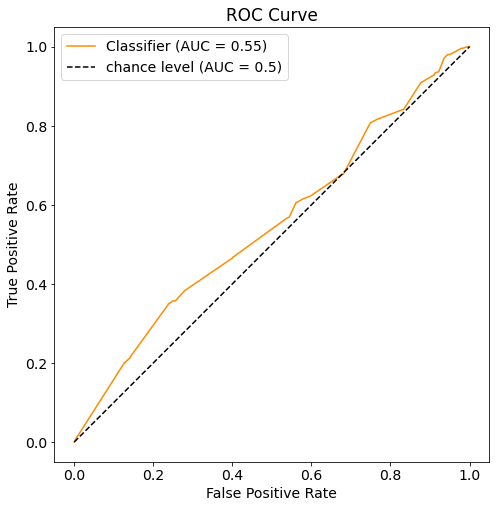

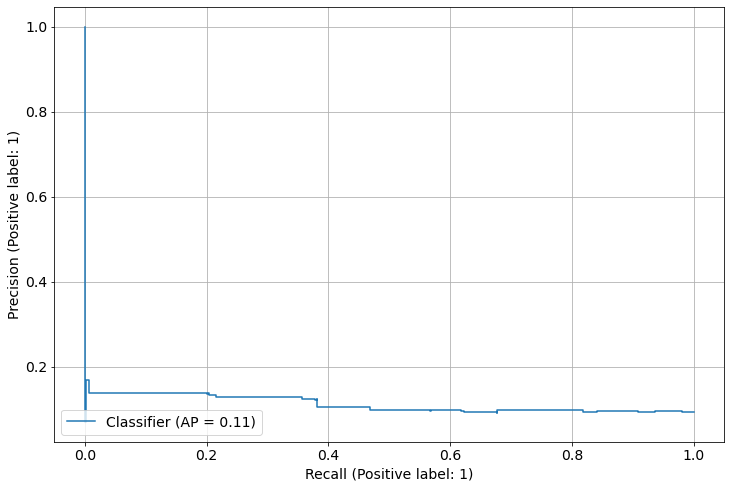

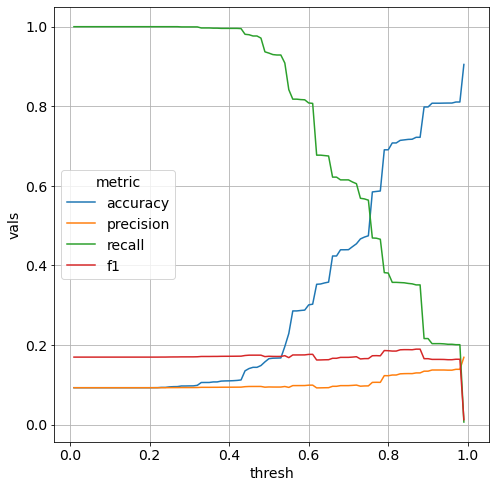

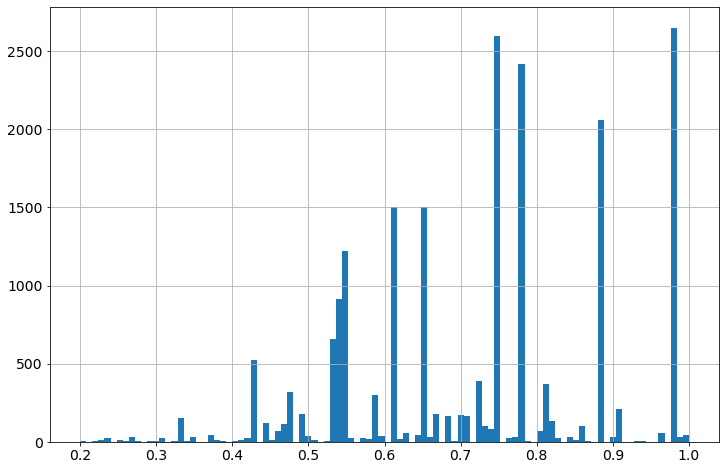

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:98: RuntimeWarning: Mean of empty slice.
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:99: RuntimeWarning: Mean of empty slice.


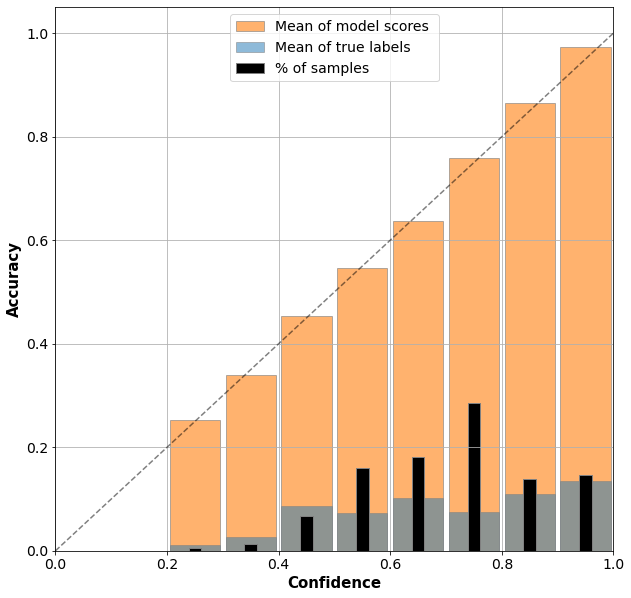

ECE: 62.864%, MCE: 93.023%


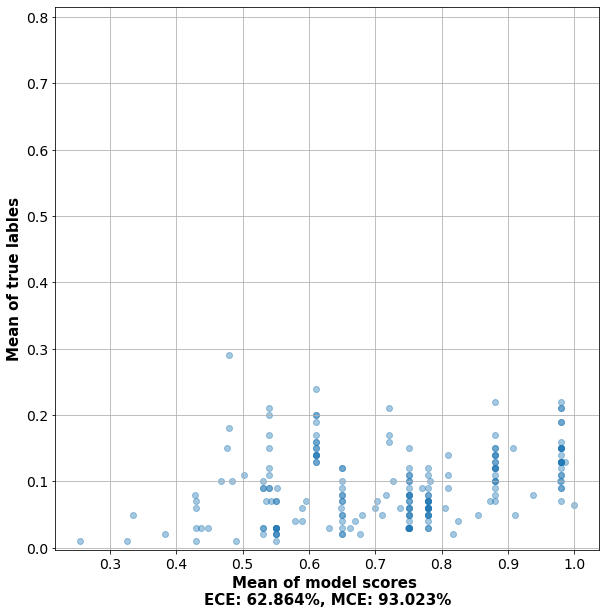

Tsh: 0.10; Acc: 0.093; Prec: 0.093; Recall: 1.000; F1: 0.170


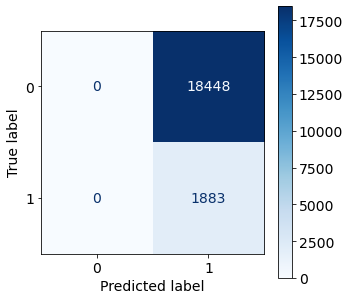

Tsh: 0.20; Acc: 0.093; Prec: 0.093; Recall: 1.000; F1: 0.170


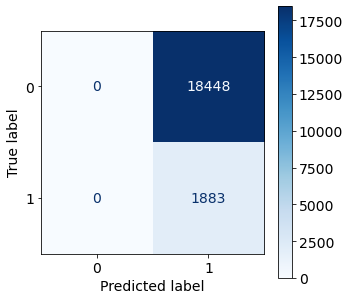

Tsh: 0.30; Acc: 0.097; Prec: 0.093; Recall: 0.999; F1: 0.170


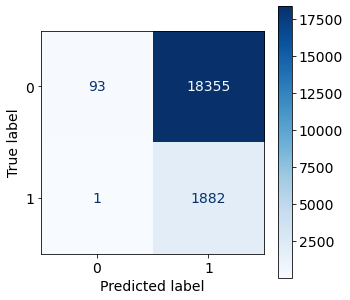

Tsh: 0.40; Acc: 0.110; Prec: 0.094; Recall: 0.996; F1: 0.172


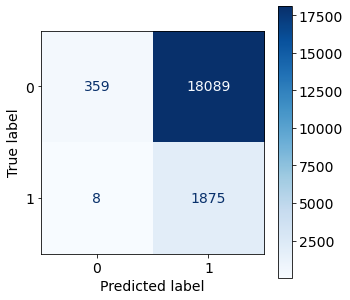

Tsh: 0.50; Acc: 0.166; Prec: 0.095; Recall: 0.934; F1: 0.172


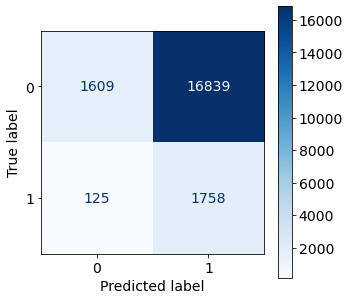

Tsh: 0.60; Acc: 0.301; Prec: 0.099; Recall: 0.808; F1: 0.176


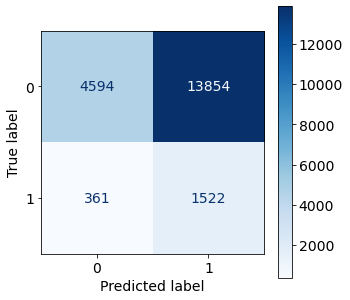

Tsh: 0.70; Acc: 0.440; Prec: 0.098; Recall: 0.615; F1: 0.169


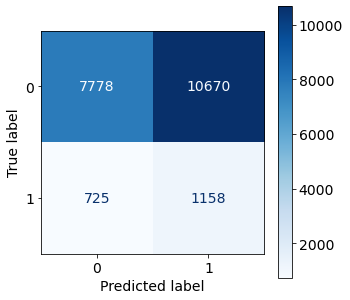

Tsh: 0.80; Acc: 0.691; Prec: 0.123; Recall: 0.381; F1: 0.186


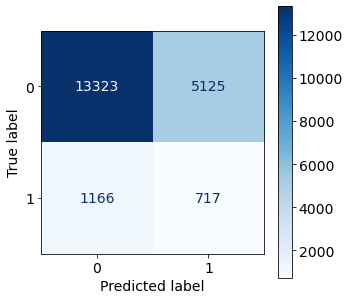

Tsh: 0.90; Acc: 0.798; Prec: 0.134; Recall: 0.216; F1: 0.166


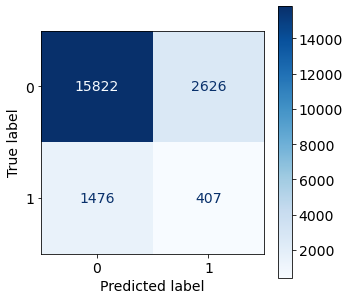

thresh  accuracy  precision    recall        f1
0     0.01  0.092617   0.092617  1.000000  0.169533
4     0.05  0.092617   0.092617  1.000000  0.169533
9     0.10  0.092617   0.092617  1.000000  0.169533
14    0.15  0.092617   0.092617  1.000000  0.169533
19    0.20  0.092617   0.092617  1.000000  0.169533
24    0.25  0.094732   0.092813  1.000000  0.169862
29    0.30  0.097142   0.092998  0.999469  0.170163
34    0.35  0.105799   0.093611  0.996814  0.171150
39    0.40  0.109881   0.093919  0.995751  0.171648
44    0.45  0.140770   0.095715  0.979819  0.174394
49    0.50  0.165609   0.094531  0.933617  0.171680
54    0.55  0.228912   0.093433  0.841742  0.168197
59    0.60  0.300821   0.098985  0.808285  0.176372
64    0.65  0.358025   0.092699  0.674987  0.163011
69    0.70  0.439526   0.097903  0.614976  0.168915
74    0.75  0.474497   0.097208  0.563994  0.165834
79    0.80  0.690571   0.122732  0.380775  0.185631
84    0.85  0.716738   0.128166  0.354753  0.188302
89    0.90  0.798239   0.134191  0.216144  0.165582
94    0.95  0.808076   0.136740  0.201806  0.163020
98    0.99  0.905071   0.169014  0.006373  0.012282

In [128]:
by_score = "V3__cvssV3__baseScore"
# by_score = "V3__exploitabilityScore"
# by_score = "V3__impactScore"

y = np.array(df_eval.target_90_days)
y_prob = np.array(df_eval[by_score] / df_eval[by_score].max())

display_results(y, y_prob)

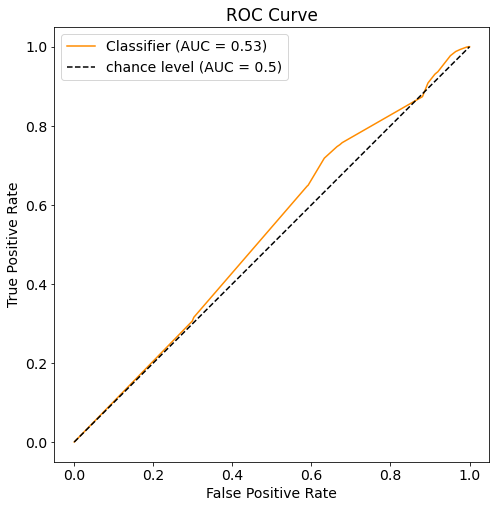

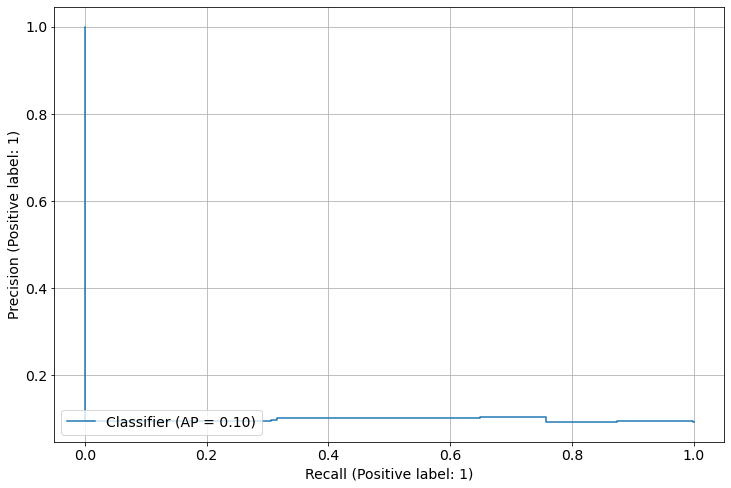

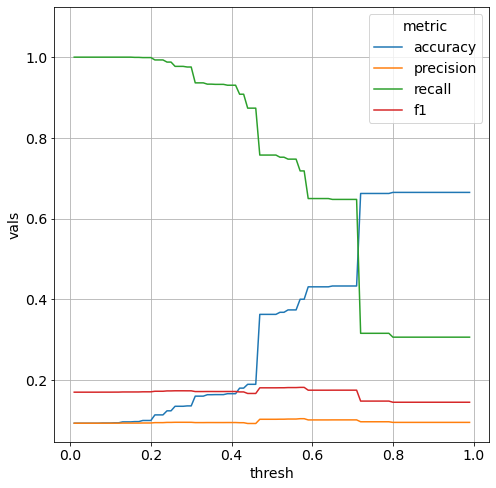

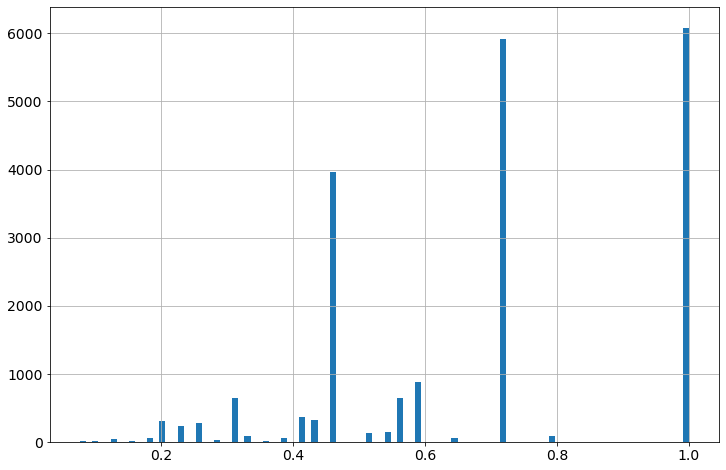

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:98: RuntimeWarning: Mean of empty slice.
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:99: RuntimeWarning: Mean of empty slice.


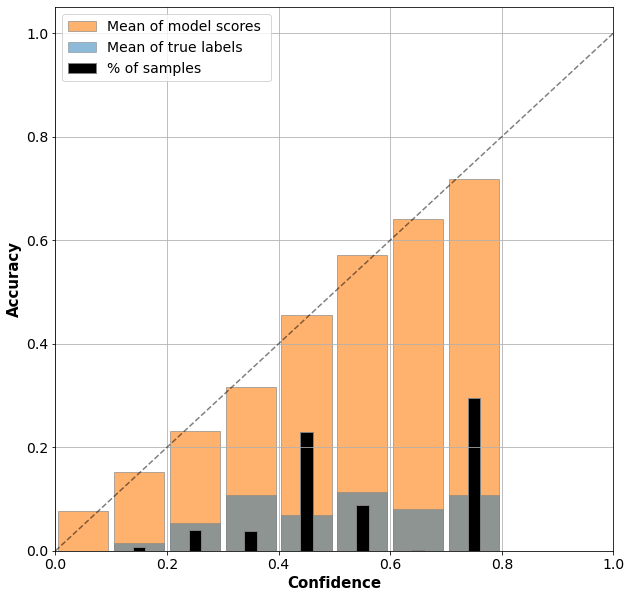

ECE: 59.780%, MCE: 90.534%


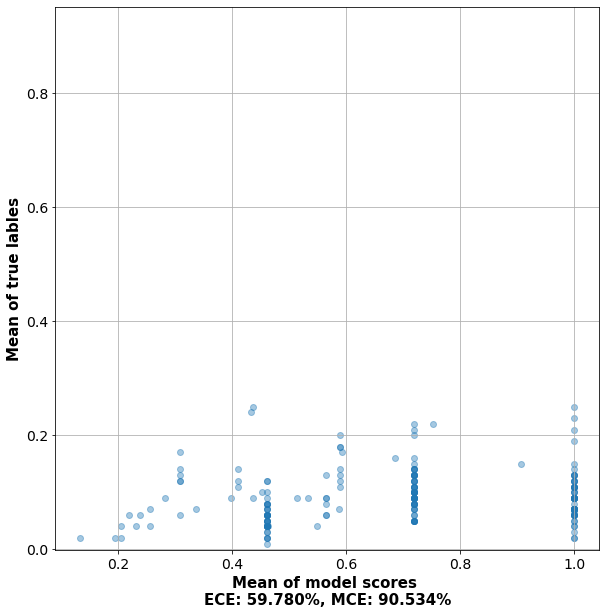

Tsh: 0.10; Acc: 0.093; Prec: 0.093; Recall: 1.000; F1: 0.170


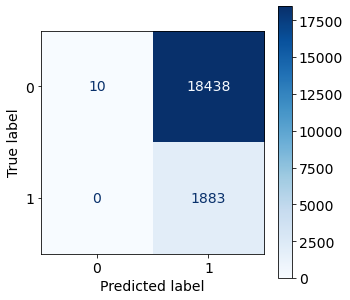

Tsh: 0.20; Acc: 0.099; Prec: 0.093; Recall: 0.999; F1: 0.170


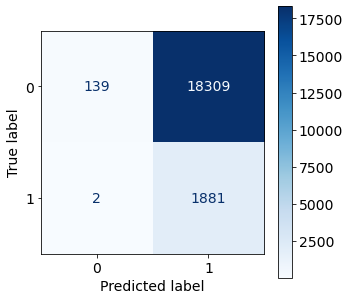

Tsh: 0.30; Acc: 0.136; Prec: 0.095; Recall: 0.976; F1: 0.173


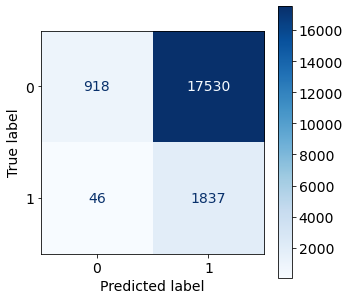

Tsh: 0.40; Acc: 0.166; Prec: 0.094; Recall: 0.930; F1: 0.171


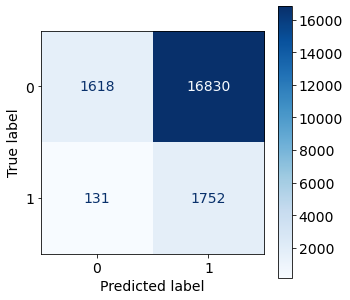

Tsh: 0.50; Acc: 0.362; Prec: 0.102; Recall: 0.757; F1: 0.180


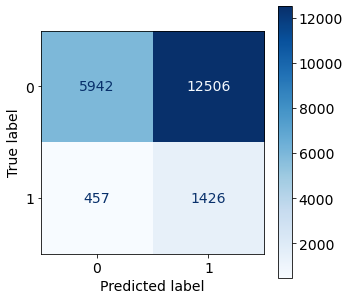

Tsh: 0.60; Acc: 0.431; Prec: 0.101; Recall: 0.649; F1: 0.174


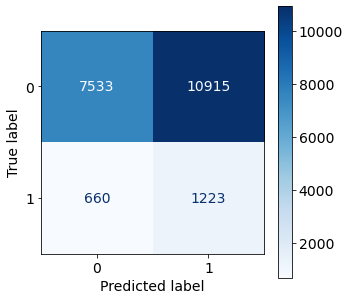

Tsh: 0.70; Acc: 0.433; Prec: 0.101; Recall: 0.647; F1: 0.175


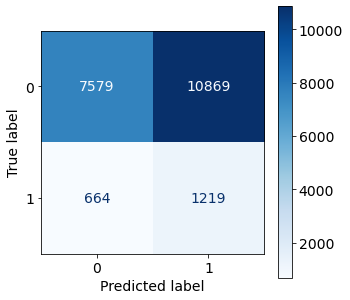

Tsh: 0.80; Acc: 0.665; Prec: 0.095; Recall: 0.306; F1: 0.145


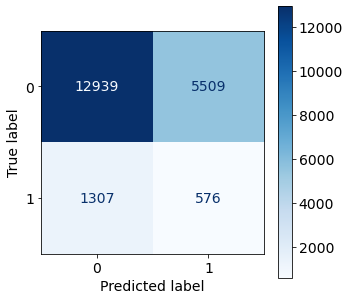

Tsh: 0.90; Acc: 0.665; Prec: 0.095; Recall: 0.306; F1: 0.145


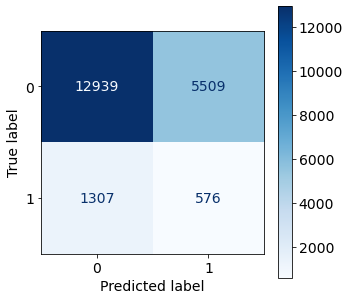

thresh  accuracy  precision    recall        f1
0     0.01  0.092617   0.092617  1.000000  0.169533
4     0.05  0.092617   0.092617  1.000000  0.169533
9     0.10  0.093109   0.092663  1.000000  0.169609
14    0.15  0.095913   0.092923  1.000000  0.170046
19    0.20  0.099356   0.093165  0.998938  0.170434
24    0.25  0.123309   0.094604  0.987785  0.172670
29    0.30  0.135507   0.094852  0.975571  0.172894
34    0.35  0.163248   0.094244  0.933086  0.171198
39    0.40  0.165757   0.094285  0.930430  0.171219
44    0.45  0.189022   0.091925  0.873606  0.166346
49    0.50  0.362402   0.102354  0.757302  0.180335
54    0.55  0.373469   0.102934  0.747212  0.180941
59    0.60  0.430672   0.100758  0.649495  0.174453
64    0.65  0.432738   0.100844  0.647371  0.174504
69    0.70  0.432738   0.100844  0.647371  0.174504
74    0.75  0.662092   0.096194  0.315454  0.147431
79    0.80  0.664748   0.094659  0.305895  0.144578
84    0.85  0.664748   0.094659  0.305895  0.144578
89    0.90  0.664748   0.094659  0.305895  0.144578
94    0.95  0.664748   0.094659  0.305895  0.144578
98    0.99  0.664748   0.094659  0.305895  0.144578

In [129]:
# by_score = "V3__cvssV3__baseScore"
by_score = "V3__exploitabilityScore"
# by_score = "V3__impactScore"

y = np.array(df_eval.target_90_days)
y_prob = np.array(df_eval[by_score] / df_eval[by_score].max())

display_results(y, y_prob)

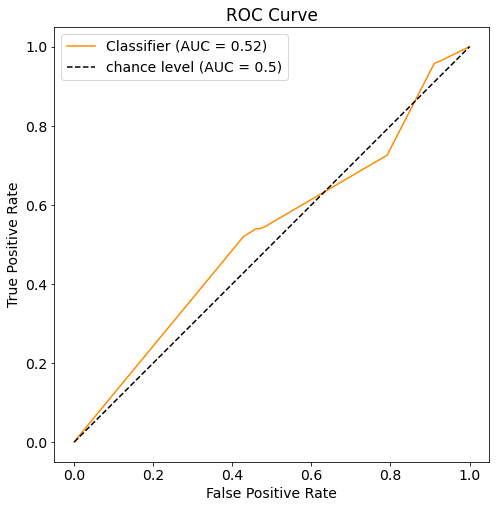

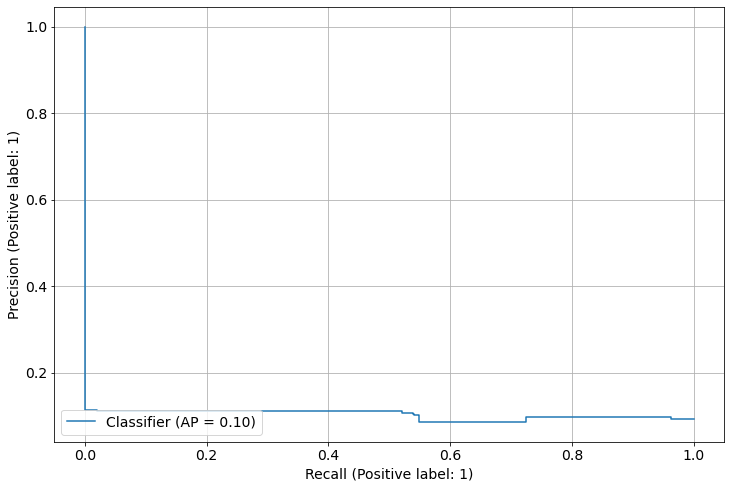

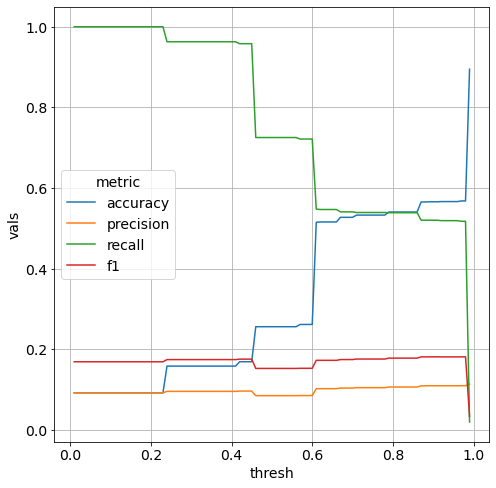

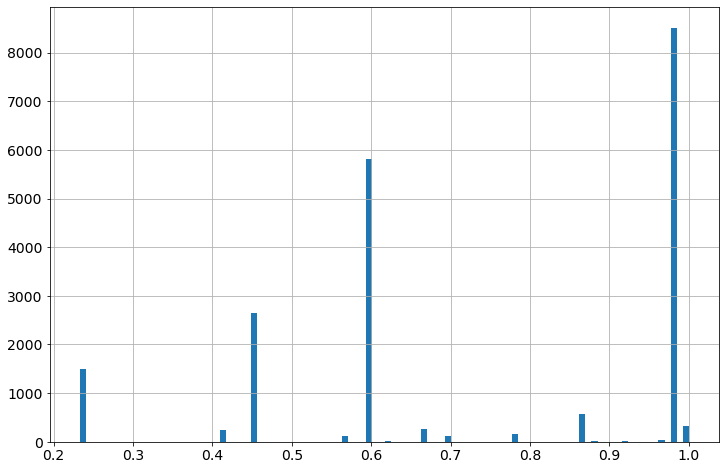

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:98: RuntimeWarning: Mean of empty slice.
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:99: RuntimeWarning: Mean of empty slice.


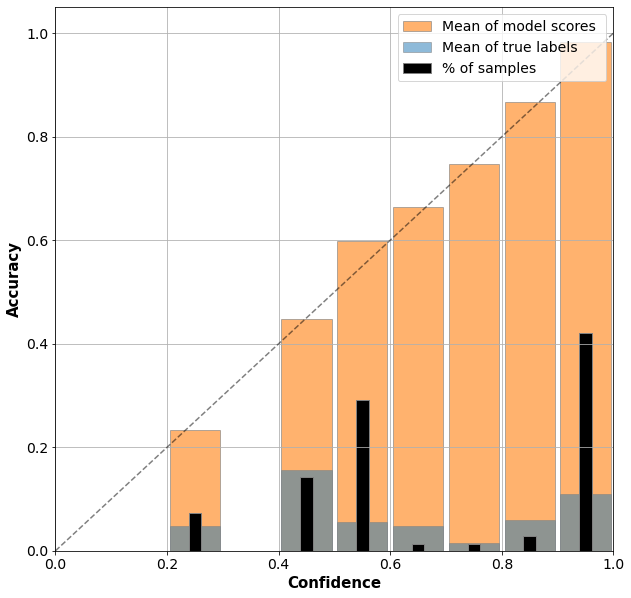

ECE: 63.724%, MCE: 88.772%


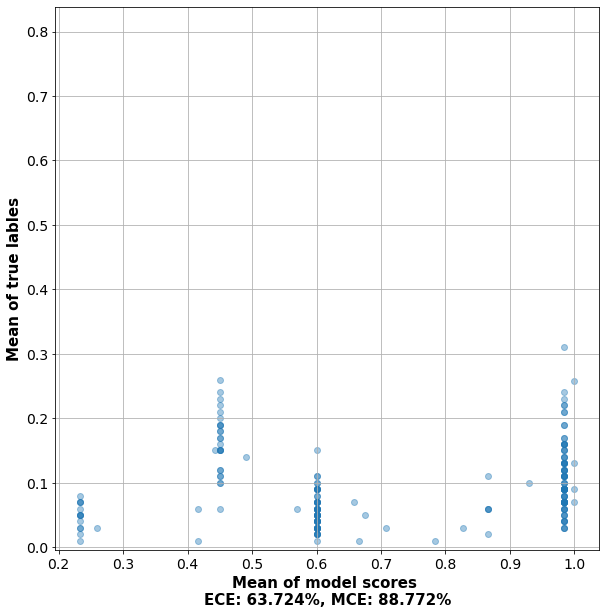

Tsh: 0.10; Acc: 0.093; Prec: 0.093; Recall: 1.000; F1: 0.170


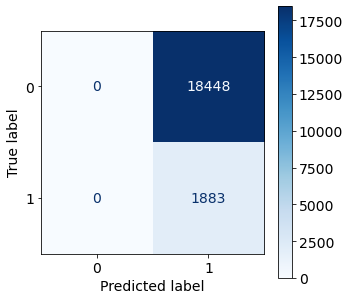

Tsh: 0.20; Acc: 0.093; Prec: 0.093; Recall: 1.000; F1: 0.170


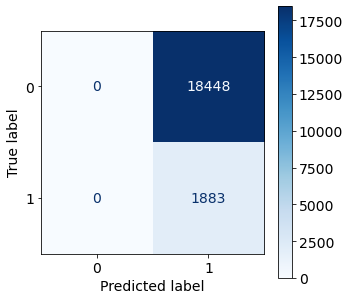

Tsh: 0.30; Acc: 0.159; Prec: 0.096; Recall: 0.963; F1: 0.175


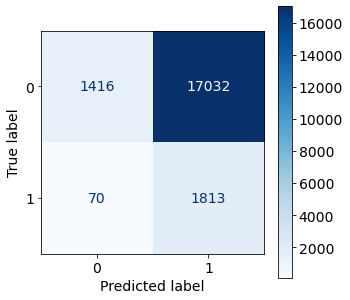

Tsh: 0.40; Acc: 0.159; Prec: 0.096; Recall: 0.963; F1: 0.175


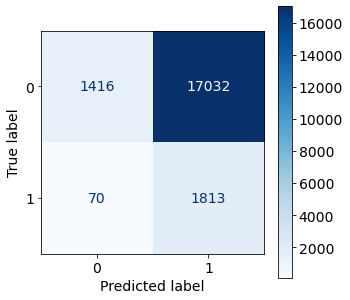

Tsh: 0.50; Acc: 0.256; Prec: 0.086; Recall: 0.725; F1: 0.153


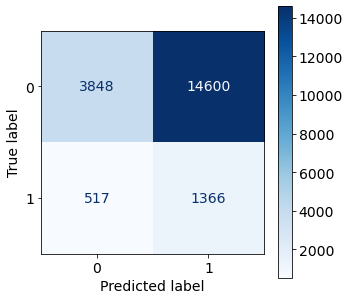

Tsh: 0.60; Acc: 0.262; Prec: 0.086; Recall: 0.722; F1: 0.153


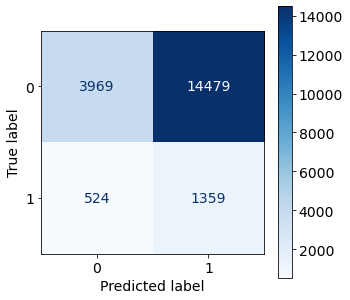

Tsh: 0.70; Acc: 0.528; Prec: 0.104; Recall: 0.541; F1: 0.175


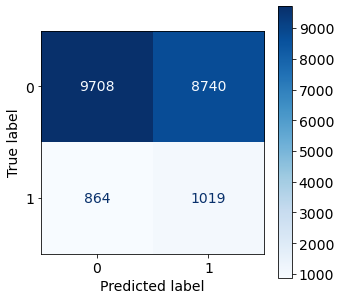

Tsh: 0.80; Acc: 0.541; Prec: 0.107; Recall: 0.539; F1: 0.179


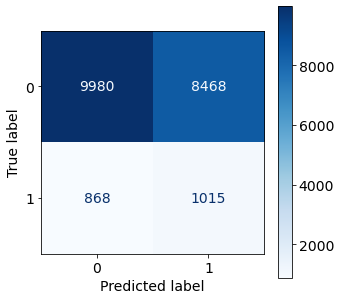

Tsh: 0.90; Acc: 0.566; Prec: 0.110; Recall: 0.520; F1: 0.182


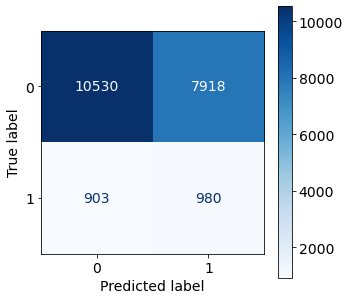

thresh  accuracy  precision    recall        f1
0     0.01  0.092617   0.092617  1.000000  0.169533
4     0.05  0.092617   0.092617  1.000000  0.169533
9     0.10  0.092617   0.092617  1.000000  0.169533
14    0.15  0.092617   0.092617  1.000000  0.169533
19    0.20  0.092617   0.092617  1.000000  0.169533
24    0.25  0.158822   0.096206  0.962825  0.174932
29    0.30  0.158822   0.096206  0.962825  0.174932
34    0.35  0.158822   0.096206  0.962825  0.174932
39    0.40  0.158822   0.096206  0.962825  0.174932
44    0.45  0.169642   0.096953  0.958046  0.176086
49    0.50  0.256456   0.085557  0.725438  0.153062
54    0.55  0.256456   0.085557  0.725438  0.153062
59    0.60  0.262063   0.085806  0.721721  0.153377
64    0.65  0.516108   0.102846  0.546999  0.173138
69    0.70  0.527618   0.104416  0.541158  0.175056
74    0.75  0.533176   0.105394  0.539565  0.176343
79    0.80  0.540800   0.107034  0.539033  0.178603
84    0.85  0.540800   0.107034  0.539033  0.178603
89    0.90  0.566131   0.110137  0.520446  0.181801
94    0.95  0.566672   0.110098  0.519384  0.181683
98    0.99  0.894742   0.114114  0.020181  0.034296

In [130]:
# by_score = "V3__cvssV3__baseScore"
# by_score = "V3__exploitabilityScore"
by_score = "V3__impactScore"

y = np.array(df_eval.target_90_days)
y_prob = np.array(df_eval[by_score] / df_eval[by_score].max())

display_results(y, y_prob)